# Advanced Ensemble Learning & Explainability for Car Price Prediction

**Author:** Paramesh Kumar Bukya  
**Context:** MSc Data Science – Advanced Machine Learning Project (Manchester Metropolitan University)  

This notebook implements an advanced machine learning workflow for used-car price prediction on the (confidential) AutoTrader dataset.

## 🔧 How to run this notebook in Google Colab

1. Upload this notebook (`AML_AutoTrader_Paramesh_Bukya.ipynb`) to Colab.
2. Upload your authorised `adverts.csv` file to the Colab environment (same working directory).
3. (If needed) Install extra packages in the cell below (e.g. `shap`, `category_encoders`).
4. Run all cells from top to bottom (**Runtime → Run all**).  
5. No changes to the existing code cells are required.

⚠️ **Note:** The AutoTrader dataset is confidential and is **not** included in this notebook or any public repository. You must use your own authorised copy of `adverts.csv`.


In [ ]:
# Optional: uncomment and run if required packages are missing in your Colab environment
# !pip install numpy pandas scikit-learn matplotlib seaborn shap category_encoders


In [259]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [260]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid,KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error






In [261]:
#loading the data set and saving DataFrame as df.
df = pd.read_csv('/content/adverts (3).csv')

In [262]:
df.head(3)

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0      NaN            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   

  standard_model vehicle_condition  year_of_registration  price body_type  \
0           XC90               NEW                   NaN  73970       SUV   
1             XF              USED                2011.0   7000    Saloon   
2           Yeti              USED                2017.0  14000       SUV   

   crossover_car_and_van              fuel_type  
0                  False  Petrol Plug-in Hybrid  
1                  False                 Diesel  
2                  False                 Petrol

In [263]:
df.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [264]:
#to know type of feature
df.dtypes

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

In [265]:
#look the columns in data frame
df.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

# data cleaning

In [266]:
df.duplicated().sum()

0

# price column outliers dealing

In [267]:
df['price'].describe()

count    4.020050e+05
mean     1.734197e+04
std      4.643746e+04
min      1.200000e+02
25%      7.495000e+03
50%      1.260000e+04
75%      2.000000e+04
max      9.999999e+06
Name: price, dtype: float64

In [268]:
df['price'].isnull().sum()

0

<Axes: >

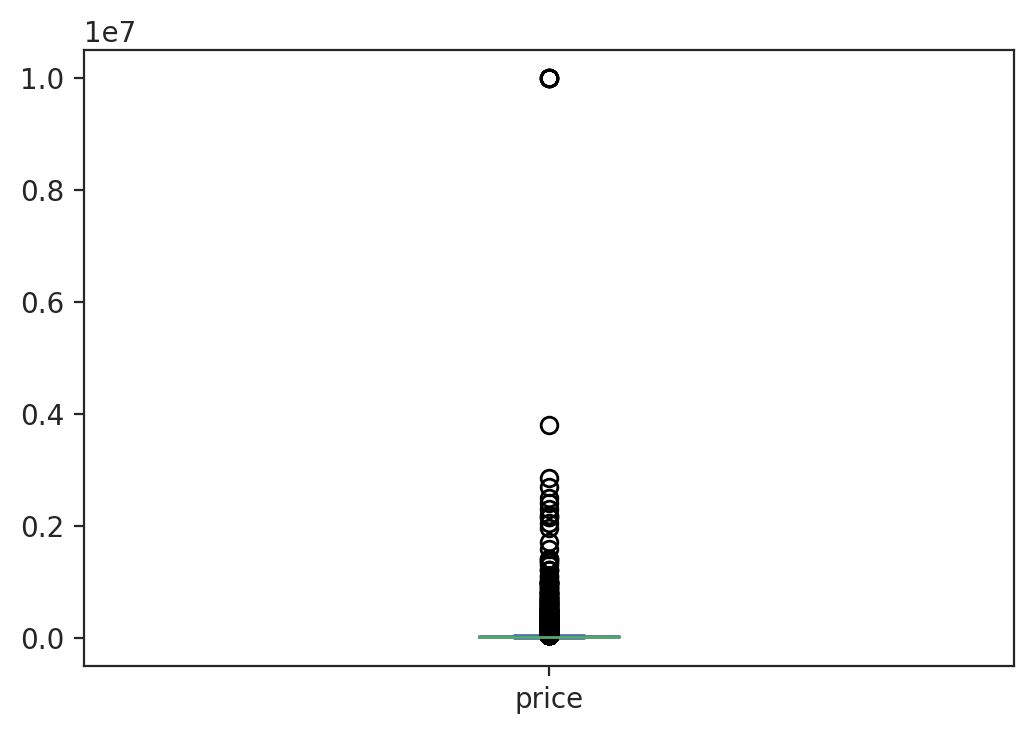

In [269]:
df['price'].plot(kind = 'box')

<Axes: xlabel='price'>

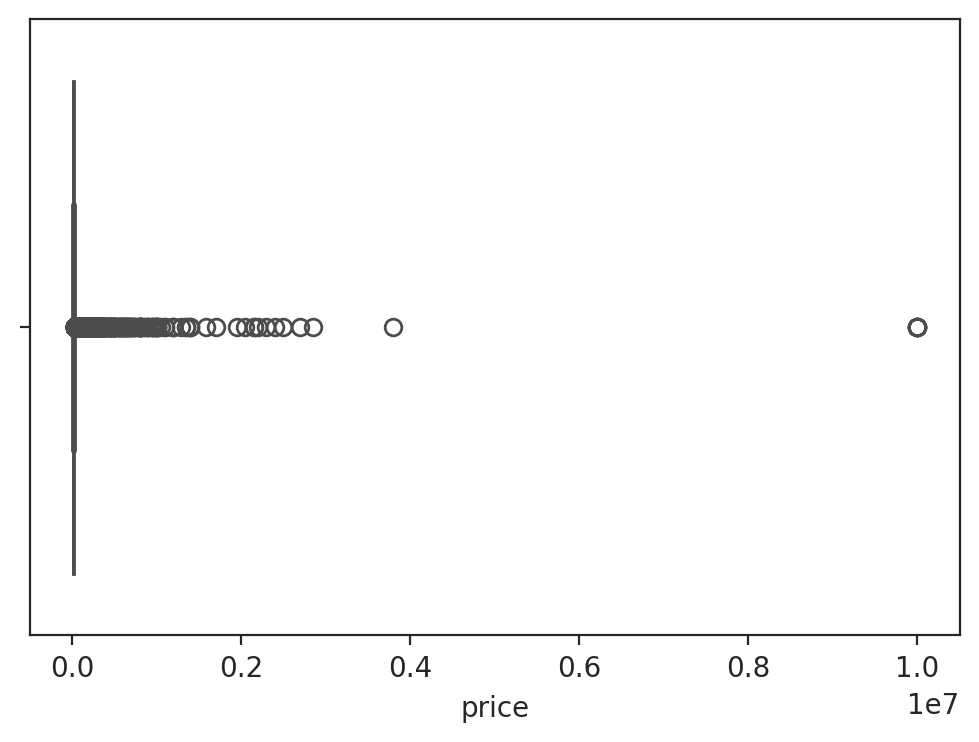

In [270]:
sns.boxplot(data = df , x = 'price')

In [271]:
df.query("price > 4000000")

public_reference  mileage reg_code standard_colour standard_make  \
141833   202007050883898  87450.0      NaN             Red       Ferrari   
147188   202009103539048    100.0      NaN            Grey      Maserati   
252505   202008112331147  46300.0      NaN            Blue       Ferrari   
305436   201812223434109   3600.0      NaN            Grey   Lamborghini   
336202   202001226429470    950.0      NaN           Black       Ferrari   
336536   202006180262926   4400.0      NaN           White       Porsche   

       standard_model vehicle_condition  year_of_registration    price  \
141833            250              USED                   NaN  9999999   
147188           3500              USED                   NaN  9999999   
252505            275              USED                   NaN  9999999   
305436          Miura              USED                   NaN  9999999   
336202      LaFerrari              USED                   NaN  9999999   
336536            959              USED                   NaN  9999999   

          body_type  crossover_car_and_van fuel_type  
141833        Coupe                  False    Petrol  
147188  Convertible                  False    Petrol  
252505        Coupe                  False    Petrol  
305436        Coupe                  False    Petrol  
336202        Coupe                  False    Petrol  
336536        Coupe                  False    Petrol

In [272]:
df.query("price > 200000")

public_reference  mileage reg_code standard_colour standard_make  \
113      202009103575016   1568.0       19           Black       McLaren   
1004     202006110024693   7253.0       66           Black   Lamborghini   
1335     202004018824812  76000.0      NaN           White  Aston Martin   
3343     202010225314982     50.0       68             NaN       Porsche   
3399     201809040153397    461.0        H           Green  Aston Martin   
...                  ...      ...      ...             ...           ...   
398009   201908100998692   3000.0       19            Blue   Lamborghini   
398498   202009304407377   2516.0       69             Red       Ferrari   
399025   202005289599976     17.0       19             NaN       McLaren   
401566   202010134939512    552.0       69             Red       Ferrari   
401716   202003308800352    900.0       16          Yellow   Lamborghini   

       standard_model vehicle_condition  year_of_registration   price  \
113             Senna              USED                2019.0  585000   
1004        Aventador              USED                2016.0  219995   
1335              DB4              USED                2018.0  495000   
3343              911              USED                2018.0  299950   
3399              DB6              USED                1970.0  950000   
...               ...               ...                   ...     ...   
398009      Aventador              USED                2019.0  349990   
398498      488 Pista              USED                2019.0  298950   
399025          Senna              USED                2019.0  799900   
401566      488 Pista              USED                2019.0  310830   
401716      Aventador              USED                2016.0  279990   

          body_type  crossover_car_and_van fuel_type  
113           Coupe                  False    Petrol  
1004          Coupe                  False    Petrol  
1335         Saloon                  False    Petrol  
3343          Coupe                  False    Petrol  
3399    Convertible                  False    Petrol  
...             ...                    ...       ...  
398009        Coupe                  False    Petrol  
398498        Coupe                  False    Petrol  
399025          NaN                  False       NaN  
401566        Coupe                  False    Petrol  
401716  Convertible                  False    Petrol  

[586 rows x 12 columns]

<Axes: >

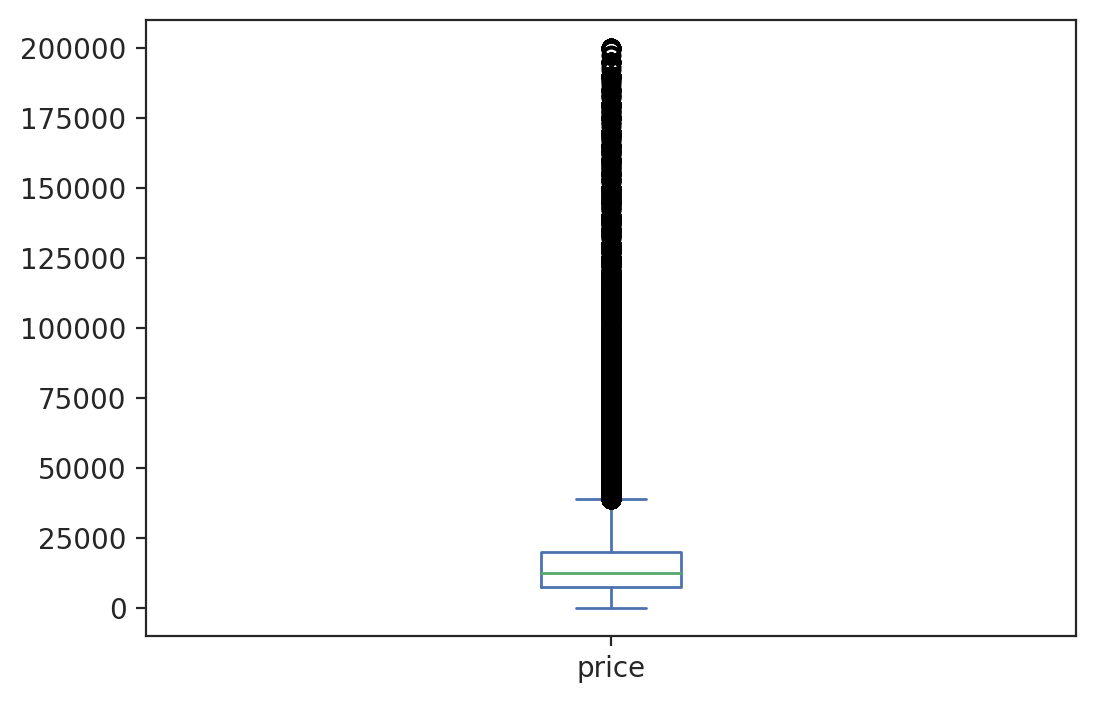

In [273]:
df[df['price'] < 200000]['price'].plot(kind='box')


<Axes: >

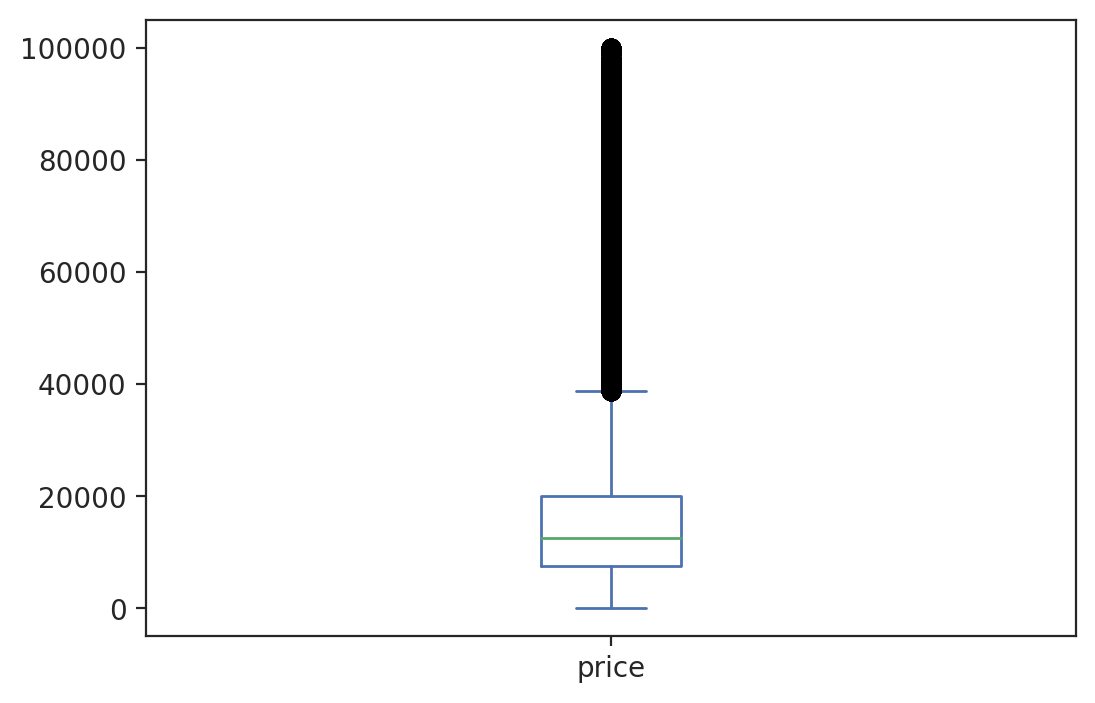

In [274]:
df[df['price'] < 100000]['price'].plot(kind='box')


In [275]:

# removing some outliers in price column manually which are greater than 100000
df = df[df['price'] < 100000]
#Reset the index
df = df.reset_index(drop= True)


In [276]:
df.shape

(399173, 12)

In [277]:
402005 - 399173

2832

<Axes: xlabel='price', ylabel='Count'>

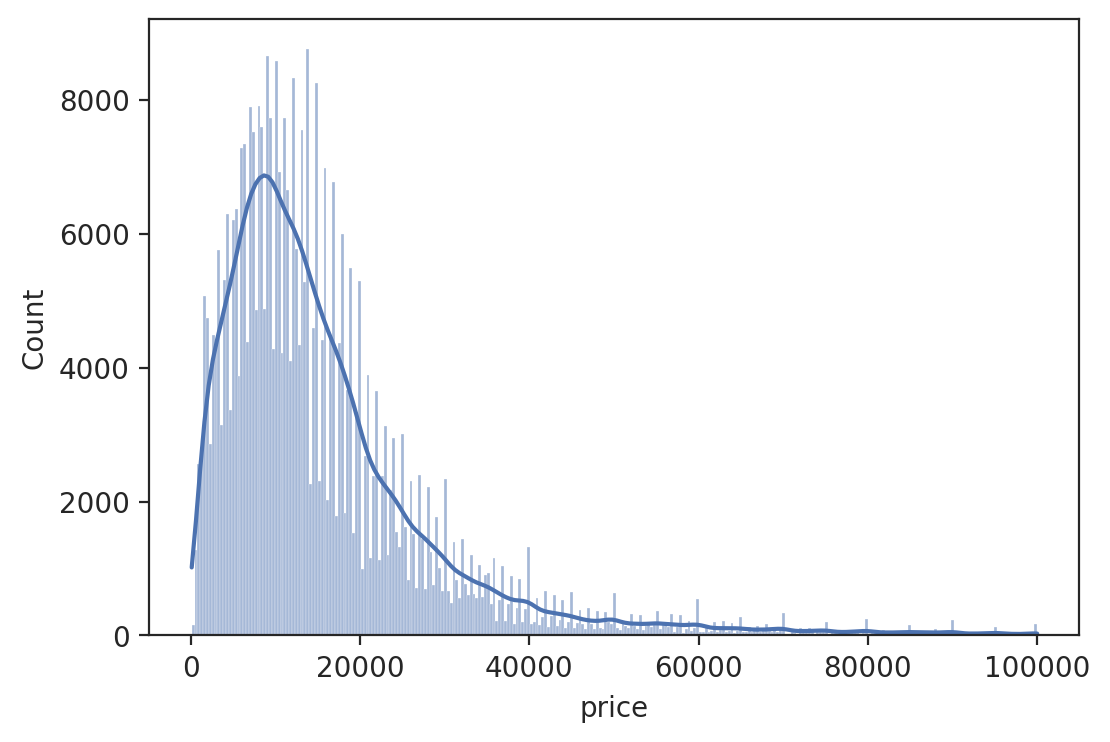

In [278]:
sns.histplot(data = df, x = 'price', kde = True)

In [279]:
#q1 = df['price'].quantile(0.25)
#q3 = df['price'].quantile(0.75)
#IQR =q3 -q1

In [280]:
#outliers in price colum
#outliers = df[(df['price']< (q1 - 1.5*IQR)) | (df['price']> (q3+1.5*IQR))]
#print("outliers in price column are :",outliers.shape[0])

In [281]:
#outliers.shape # there are total of 26269 outliers in a price column.

In [282]:
# removing outliers in price column
#df = df[(df['price'] >=(q1 - 1.5*IQR) ) & (df['price'] <=(q3+1.5*IQR) )]
# Reset the index
#df = df.reset_index(drop=True)

In [283]:
#sns.boxplot(data = df, x = 'price' ) # with removed outlers using Inter Quartile range and the remaining outliers are considerable .

In [284]:
#sns.histplot(data = df, x = 'price' , bins = 25 , kde = True)

In [285]:
#Finding null values or missing values
#df['price'].isnull().sum()

# mileage outliers dealing

In [286]:
#dealing with missing values and outliers in mileage column

In [287]:
#checking missing values
df['mileage'].isna().sum()

124

In [288]:
df['mileage'].median()

28972.0

In [289]:
# filling missing values of mileage column.
df['mileage'] = df['mileage'].fillna(df['mileage'].median())

In [290]:
df['mileage'].isnull().sum()# no missing values in mileage column

0

<Axes: xlabel='mileage'>

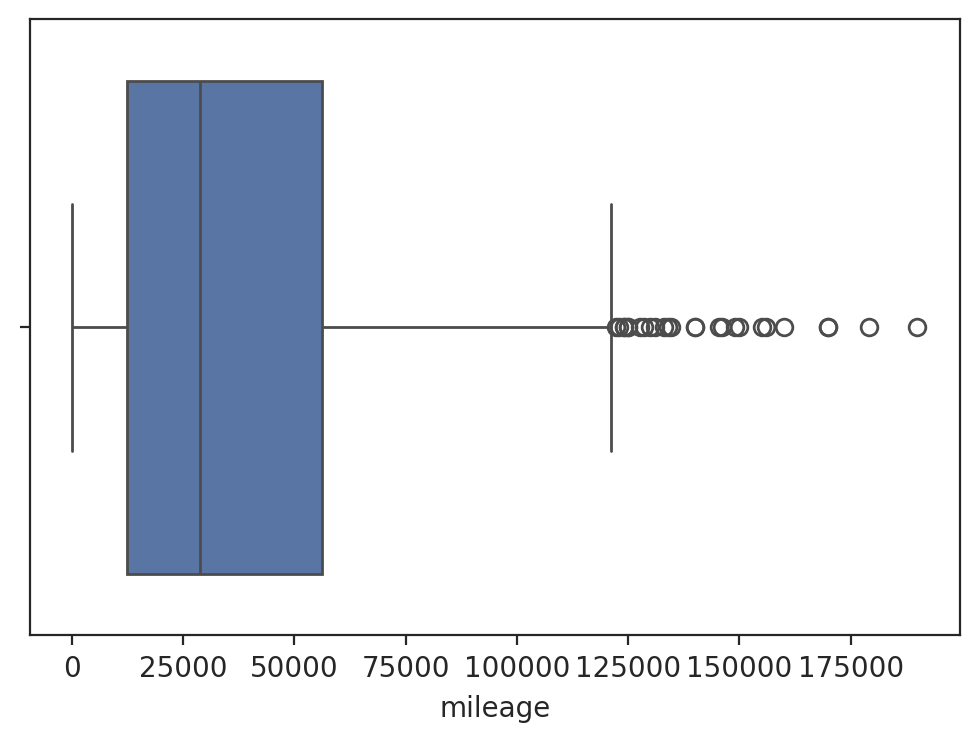

In [291]:
sns.boxplot(data = df.sample(1000) , x = 'mileage')

In [292]:
df['mileage'].describe()

count    399173.000000
mean      37952.220456
std       34843.793137
min           0.000000
25%       10758.000000
50%       28972.000000
75%       57000.000000
max      999999.000000
Name: mileage, dtype: float64

In [293]:
q1 = df['mileage'].quantile(0.25)

In [294]:
q3 = df['mileage'].quantile(0.75)

In [295]:
iqr = q3 - q1



In [296]:
#outliers in mileage column
outliers = df[(df['mileage']< q1 - (1.5* iqr)) | (df['mileage']> q3 + (1.5* iqr))]
print('outliers in mileage column are:',outliers.shape[0])

outliers in mileage column are: 8189


In [297]:
outliers

public_reference   mileage reg_code standard_colour standard_make  \
32       201905097776109  180000.0       64           White         SKODA   
86       202008262951083  158900.0       03            Grey         Honda   
164      202009244172272  143000.0       58             Red    Land Rover   
186      202009304395201  151580.0       08           Black          Audi   
213      202010064650799  135000.0       11           Black    Volkswagen   
...                  ...       ...      ...             ...           ...   
398913   202008142487322  130000.0       16           White         SKODA   
399035   202010054615465  139567.0       64           Beige         SKODA   
399102   202010205229756  128787.0       02          Silver       Peugeot   
399119   202010235326414  285038.0        P            Blue        Toyota   
399126   202010245397920  131980.0       08           Black           BMW   

             standard_model vehicle_condition  year_of_registration  price  \
32                  Octavia              USED                2014.0   3989   
86                   Accord              USED                2003.0   1395   
164            Freelander 2              USED                2008.0   3390   
186                      TT              USED                2008.0   3490   
213                    Golf              USED                2011.0   3599   
...                     ...               ...                   ...    ...   
398913               Superb              USED                2016.0   8991   
399035              Octavia              USED                2014.0   3995   
399102                  206              USED                2002.0    989   
399119  Land Cruiser Amazon              USED                1997.0   9990   
399126             1 Series              USED                2008.0   3400   

        body_type  crossover_car_and_van fuel_type  
32      Hatchback                  False    Diesel  
86         Estate                  False    Petrol  
164           SUV                  False    Diesel  
186         Coupe                  False    Petrol  
213        Estate                  False    Diesel  
...           ...                    ...       ...  
398913     Estate                  False    Diesel  
399035  Hatchback                  False    Diesel  
399102  Hatchback                  False    Petrol  
399119        SUV                  False    Diesel  
399126  Hatchback                  False    Diesel  

[8189 rows x 12 columns]

In [298]:
#removing the outliers
df = df[(df['mileage'] >= q1 - (1.5* iqr)) & (df['mileage'] <= q3 + (1.5* iqr))]
# Reset the index
df = df.reset_index(drop=True)

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390984 entries, 0 to 390983
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       390984 non-null  int64  
 1   mileage                390984 non-null  float64
 2   reg_code               359467 non-null  object 
 3   standard_colour        385972 non-null  object 
 4   standard_make          390984 non-null  object 
 5   standard_model         390984 non-null  object 
 6   vehicle_condition      390984 non-null  object 
 7   year_of_registration   358046 non-null  float64
 8   price                  390984 non-null  int64  
 9   body_type              390208 non-null  object 
 10  crossover_car_and_van  390984 non-null  bool   
 11  fuel_type              390424 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 33.2+ MB


<Axes: xlabel='mileage'>

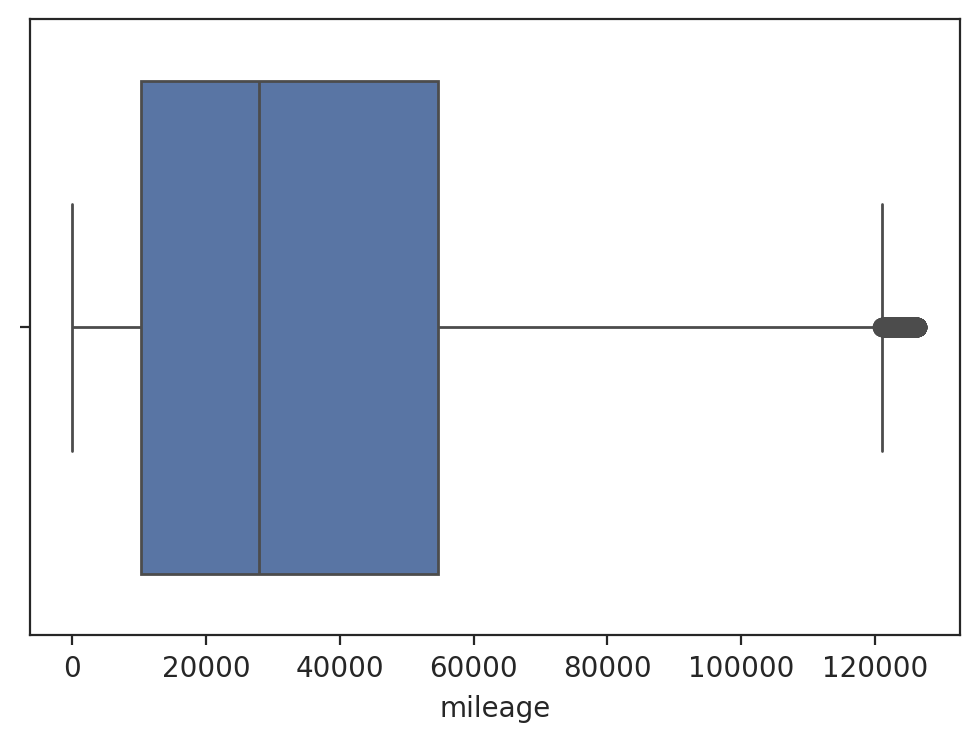

In [300]:
sns.boxplot(data =df , x = 'mileage')

# year of registration outliers and missing values

In [301]:
df['year_of_registration'].describe()

count    358046.000000
mean       2015.165621
std           7.937321
min         999.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year_of_registration, dtype: float64

<Axes: xlabel='year_of_registration'>

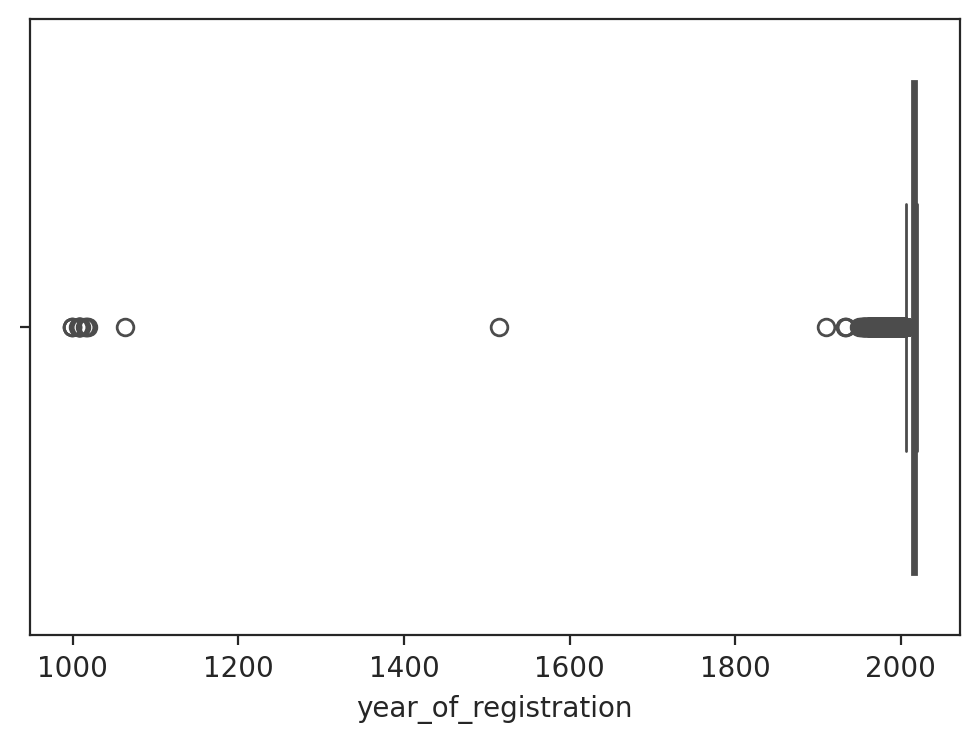

In [302]:
sns.boxplot( data = df , x = 'year_of_registration')

In [303]:
df[(df['year_of_registration'] <=1600)]

public_reference   mileage reg_code standard_colour  standard_make  \
57443    202006270588110   14000.0       07            Blue         Toyota   
67644    202010155035879   96659.0       65           Black           Audi   
82233    202009163810376   37771.0       63           Black          Smart   
111636   202008102305925   30000.0       59             Red         Toyota   
117579   202010064654489   27200.0       66           Black           MINI   
185425   202010205206488   58470.0       10           Black           Fiat   
194427   202009013167637   23000.0       59          Silver           MINI   
194581   202010225311657  104000.0       08          Silver            BMW   
196160   202010134937656    8600.0       68          Silver            BMW   
196170   202010155037484   69346.0       64             Red          Mazda   
196310   202008042076716   19000.0       57          Silver  Mercedes-Benz   
207257   202009304380359   54569.0       08          Silver            BMW   
267155   202010024511934    6353.0       17            Blue            BMW   
325510   202010094789497  107934.0       13            Blue           Audi   
329875   202006270588115   38000.0       57           White           MINI   
364560   202008042076722   58000.0       55          Silver         Toyota   
377025   202010195174849   39624.0       65             Red           MINI   

       standard_model vehicle_condition  year_of_registration  price  \
57443           Prius              USED                1007.0   7000   
67644        A4 Avant              USED                1515.0  10385   
82233          fortwo              USED                1063.0   4785   
111636           AYGO              USED                1009.0   4695   
117579        Clubman              USED                1016.0  18990   
185425      Punto Evo              USED                1010.0   3785   
194427          Hatch              USED                1009.0   5995   
194581       1 Series              USED                1008.0   4395   
196160             M2              USED                1018.0  41990   
196170         Mazda3              USED                 999.0   8795   
196310        C Class              USED                1007.0   7295   
207257             Z4              USED                 999.0   7999   
267155       2 Series              USED                1017.0  18990   
325510             A3              USED                 999.0   8895   
329875          Hatch              USED                1007.0   4795   
364560           RAV4              USED                1006.0   5994   
377025        Clubman              USED                1015.0  15290   

          body_type  crossover_car_and_van      fuel_type  
57443     Hatchback                  False  Petrol Hybrid  
67644        Estate                  False         Diesel  
82233         Coupe                  False         Petrol  
111636    Hatchback                  False         Petrol  
117579       Estate                  False         Diesel  
185425    Hatchback                  False         Petrol  
194427    Hatchback                  False         Petrol  
194581  Convertible                  False         Petrol  
196160        Coupe                  False         Petrol  
196170       Saloon                  False         Petrol  
196310       Saloon                  False         Petrol  
207257  Convertible                  False         Petrol  
267155  Convertible                  False         Petrol  
325510    Hatchback                  False         Diesel  
329875    Hatchback                  False         Petrol  
364560          SUV                  False         Petrol  
377025       Estate                  False         Petrol

In [304]:
#In the year column based on the reg_code , I added 1000 to the values which are less than 1600 .
df.loc[df['year_of_registration'] <= 1600, 'year_of_registration'] += 1000

In [305]:
df[df['year_of_registration'] <= 1600]

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

<Axes: xlabel='year_of_registration'>

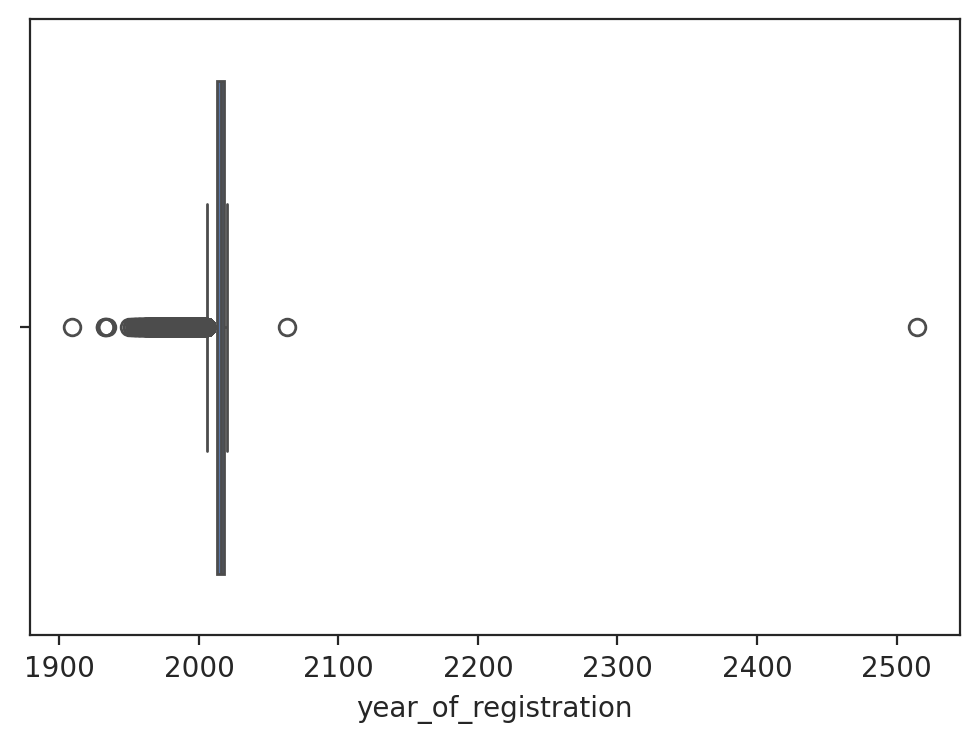

In [306]:
sns.boxplot( data = df , x = 'year_of_registration')

In [307]:
df[df['year_of_registration'] > 2020]

public_reference  mileage reg_code standard_colour standard_make  \
67644   202010155035879  96659.0       65           Black          Audi   
82233   202009163810376  37771.0       63           Black         Smart   

      standard_model vehicle_condition  year_of_registration  price body_type  \
67644       A4 Avant              USED                2515.0  10385    Estate   
82233         fortwo              USED                2063.0   4785     Coupe   

       crossover_car_and_van fuel_type  
67644                  False    Diesel  
82233                  False    Petrol

In [308]:
#based on the reg_code column , just remove 500 from year of registration where year of registration = 2515. it should be 2015 .
df.loc[df['year_of_registration'] == 2515, 'year_of_registration'] -= 500

In [309]:

df[df['year_of_registration'] > 2020]

public_reference  mileage reg_code standard_colour standard_make  \
82233   202009163810376  37771.0       63           Black         Smart   

      standard_model vehicle_condition  year_of_registration  price body_type  \
82233         fortwo              USED                2063.0   4785     Coupe   

       crossover_car_and_van fuel_type  
82233                  False    Petrol

In [310]:
#based on the reg_code column , just remove 50 from year of registration where year of registration = 2063. it should be 2013 .
df.loc[df['year_of_registration'] == 2063, 'year_of_registration'] -= 50

In [311]:
df[df['year_of_registration'] > 2020]

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

<Axes: xlabel='year_of_registration'>

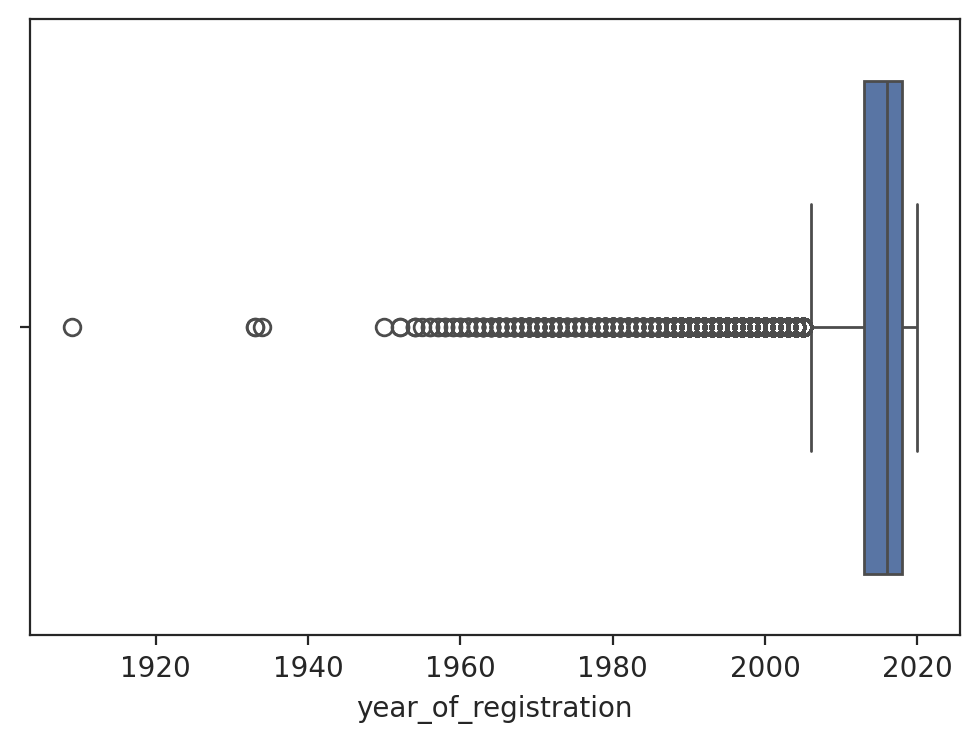

In [312]:
sns.boxplot( data = df , x = 'year_of_registration')

In [313]:
df[df['year_of_registration'] <1920]

public_reference  mileage reg_code standard_colour standard_make  \
144004   202010104836987  31172.0       09           Black       Hyundai   

       standard_model vehicle_condition  year_of_registration  price  \
144004            i10              USED                1909.0   3950   

        body_type  crossover_car_and_van fuel_type  
144004  Hatchback                  False    Petrol

In [314]:
#based on the reg_code column , just add 100 to the year of registration where year of registration = 1909. it should be 2009 .
df.loc[df['year_of_registration'] == 1909, 'year_of_registration'] += 100

<Axes: xlabel='year_of_registration'>

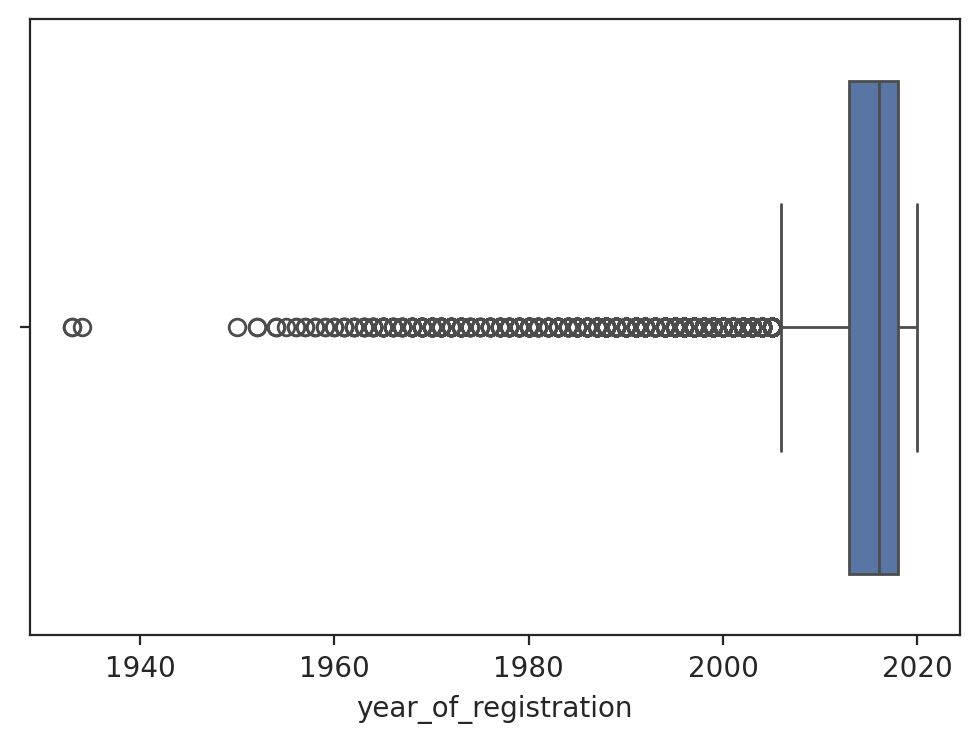

In [315]:
sns.boxplot( data = df , x = 'year_of_registration')

In [316]:
df = df.drop(df[df['year_of_registration'] <= 1940].index)


In [317]:
df[df['year_of_registration'] < 2000]

public_reference   mileage reg_code standard_colour  standard_make  \
25       202008042070611   49585.0        B             NaN        Ferrari   
891      202010205220204   58980.0        D        Burgundy        Panther   
927      202010275488566   82000.0        S            Grey        Renault   
1360     202009023221992   95000.0        K             NaN  Mercedes-Benz   
2299     202005249521769   20000.0        V           Green            TVR   
...                  ...       ...      ...             ...            ...   
388707   202006200351687  121788.0        E           White          Volvo   
389125   202009063375684   18700.0        T            Blue            TVR   
389413   202008062165360   32000.0        M             NaN        Triumph   
389678   202006109989307    5800.0        A            Blue           Fiat   
390131   202009203972304   36000.0        M           White    Rolls-Royce   

       standard_model vehicle_condition  year_of_registration  price  \
25                308              USED                1984.0  54475   
891          Kallista              USED                1986.0  12950   
927              Clio              USED                1998.0    350   
1360         SL Class              USED                1993.0  26995   
2299         Griffith              USED                1999.0  27500   
...               ...               ...                   ...    ...   
388707            480              USED                1988.0   1990   
389125       Chimaera              USED                1999.0  21000   
389413           Stag              USED                1974.0  12000   
389678            500              USED                1963.0   9500   
390131  Silver Shadow              USED                1973.0   7495   

          body_type  crossover_car_and_van fuel_type  
25      Convertible                  False    Petrol  
891     Convertible                  False    Petrol  
927       Hatchback                  False    Petrol  
1360    Convertible                  False    Petrol  
2299    Convertible                  False    Petrol  
...             ...                    ...       ...  
388707        Coupe                  False    Petrol  
389125  Convertible                  False    Petrol  
389413  Convertible                  False    Petrol  
389678       Saloon                  False    Petrol  
390131       Saloon                  False    Petrol  

[1633 rows x 12 columns]

In [318]:
df['year_of_registration'].describe()

count    358043.000000
mean       2015.212530
std           4.149657
min        1950.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year_of_registration, dtype: float64

In [319]:
df['year_of_registration'].info()

<class 'pandas.core.series.Series'>
Index: 390981 entries, 0 to 390983
Series name: year_of_registration
Non-Null Count   Dtype  
--------------   -----  
358043 non-null  float64
dtypes: float64(1)
memory usage: 6.0 MB


In [320]:
df[df['year_of_registration'].isna() & df['reg_code'].notna()]

public_reference  mileage reg_code standard_colour standard_make  \
53       202007030806426  30000.0       18             Red      Vauxhall   
82       202008222801747  42847.0       61             Red         Honda   
842      202010084741550  43130.0       66           White    Land Rover   
943      202010305607535  63369.0       17            Blue         SKODA   
1223     202010225294466  18715.0       68           White         Volvo   
...                  ...      ...      ...             ...           ...   
389358   202010315635977  66287.0       63            Blue      Vauxhall   
389737   202008252905656     45.0       20          Silver    Land Rover   
390313   202010315635541  12522.0       67             Red         Dacia   
390321   201909222504136  46000.0       13            Grey    Volkswagen   
390353   202007111114611     10.0       20            Blue      Vauxhall   

            standard_model vehicle_condition  year_of_registration  price  \
53                Insignia              USED                   NaN  11990   
82                    Jazz              USED                   NaN   5695   
842      Range Rover Sport              USED                   NaN  35990   
943        Rapid Spaceback              USED                   NaN   7490   
1223                   V40              USED                   NaN  16950   
...                    ...               ...                   ...    ...   
389358           Astra GTC              USED                   NaN   8400   
389737  Range Rover Evoque              USED                   NaN  46945   
390313             Sandero              USED                   NaN   6300   
390321           Caravelle              USED                   NaN  22995   
390353               Corsa              USED                   NaN  16000   

        body_type  crossover_car_and_van fuel_type  
53      Hatchback                  False    Petrol  
82      Hatchback                  False    Petrol  
842           SUV                  False    Diesel  
943     Hatchback                  False    Diesel  
1223          NaN                  False    Petrol  
...           ...                    ...       ...  
389358      Coupe                  False    Petrol  
389737        SUV                  False    Diesel  
390313  Hatchback                  False    Petrol  
390321        MPV                  False    Diesel  
390353  Hatchback                  False    Petrol  

[1657 rows x 12 columns]

the type of reg_code is object in pandas . with out disturbing the alphabet values of reg code , please use the condition if reg_code is less 50 then assign the corresponding value of reg_code by adding 2000 it and if the value of reg_code is greater than 50 , then just subtract the reg_code value from 50 and and then add the subtracted value with 2000 then assign the result to the corresponding value of reg_code in year of registration. Just fill the null values of year_of_registration column . Don't disturb the non null values of year of registration

In [321]:
def fill_year_of_registration(row):
    if pd.isna(row['year_of_registration']):
        try:
            reg_code = pd.to_numeric(row['reg_code'])
            if reg_code < 50:
                return reg_code + 2000
            elif reg_code > 50:
                return 2000 + (reg_code - 50)
        except ValueError:
            pass  # Handle non-numeric values in reg_code
    return row['year_of_registration']

# Apply the custom function to fill null values in "year_of_registration"
df['year_of_registration'] = df.apply(fill_year_of_registration, axis=1)



In [322]:
df[df['year_of_registration'].isna() & df['reg_code'].notna()]

public_reference   mileage reg_code standard_colour  standard_make  \
9736     202003098187902   73330.0        B            Gold         Jaguar   
16152    202010165086036   34000.0        P          Orange     Volkswagen   
27524    202003218665171   55400.0        E           White        Renault   
48837    202009304378374   24500.0        R            Blue          Mazda   
49584    202010215260465   49000.0        L            Blue      Chevrolet   
78723    202010014455127    2000.0       CA           Green       Caterham   
82913    202009234126186   99123.0        B           Green     Land Rover   
93061    202010215267071   55389.0        E            Grey  Mercedes-Benz   
118057   201906199165858   40000.0        Y           Black        Porsche   
118368   202010315654601   76066.0        L             Red            BMW   
143780   202011015662169   49500.0        J          Silver  Mercedes-Benz   
145516   202008283044857   58000.0        H           Brown         Jaguar   
146332   202010235347957   75370.0        S           White           Audi   
161553   202010195172029    4050.0   723xuu       Turquoise      Chevrolet   
167889   202007121159263   13101.0        F            Grey           Fiat   
175659   202007211525053  102000.0        N          Silver        Porsche   
178208   202003238705200  112000.0        N           Black  Mercedes-Benz   
183423   202010255403231   35000.0        E           Black        Porsche   
193618   202010285544711  106178.0        S            Blue         Nissan   
195274   202010275476622   99000.0        V            Blue     Volkswagen   
252087   202010235355514  106000.0        M             NaN        Bentley   
253959   202010235359252   33000.0        R            Grey        Porsche   
254299   202010235370841   44000.0        R          Yellow             MG   
259786   202006220384634   30915.0        G            Blue     Land Rover   
269277   202006300690337   90000.0        F             Red             MG   
270240   202006160168644    2650.0        H           White           Fiat   
290587   201907150103328   28972.0        G          Purple       Vauxhall   
293141   202010245384152   79000.0        M             Red         Jaguar   
309724   202008192660449   90000.0        A           Green  Mercedes-Benz   
317591   202008011974003   48156.0        V           Black        Bentley   
322358   202010235339385   31500.0        M           Green         Morgan   
329762   202010175118726   70986.0        D             Red         Jaguar   
342044   202008293091830   28972.0        Y             Red     Land Rover   

       standard_model vehicle_condition  year_of_registration  price  \
9736          Mark II              USED                   NaN  24990   
16152       Campervan              USED                   NaN  12500   
27524             GTA              USED                   NaN  12495   
48837          Mazda3              USED                   NaN  13495   
49584             SSR              USED                   NaN  21500   
78723           Seven              USED                   NaN  21995   
82913      Series III              USED                   NaN  12000   
93061         E Class              USED                   NaN  25990   
118057            911              USED                   NaN  39990   
118368       3 Series              USED                   NaN   8990   
143780             CL              USED                   NaN  11995   
145516             XJ              USED                   NaN   9995   
146332             80              USED                   NaN   3699   
161553       Corvette              USED                   NaN  89990   
167889            500              USED                   NaN  12995   
175659            911              USED                   NaN  42995   
178208        E Class              USED                   NaN   8145   
183423          Macan              USED                   N

<Axes: xlabel='year_of_registration'>

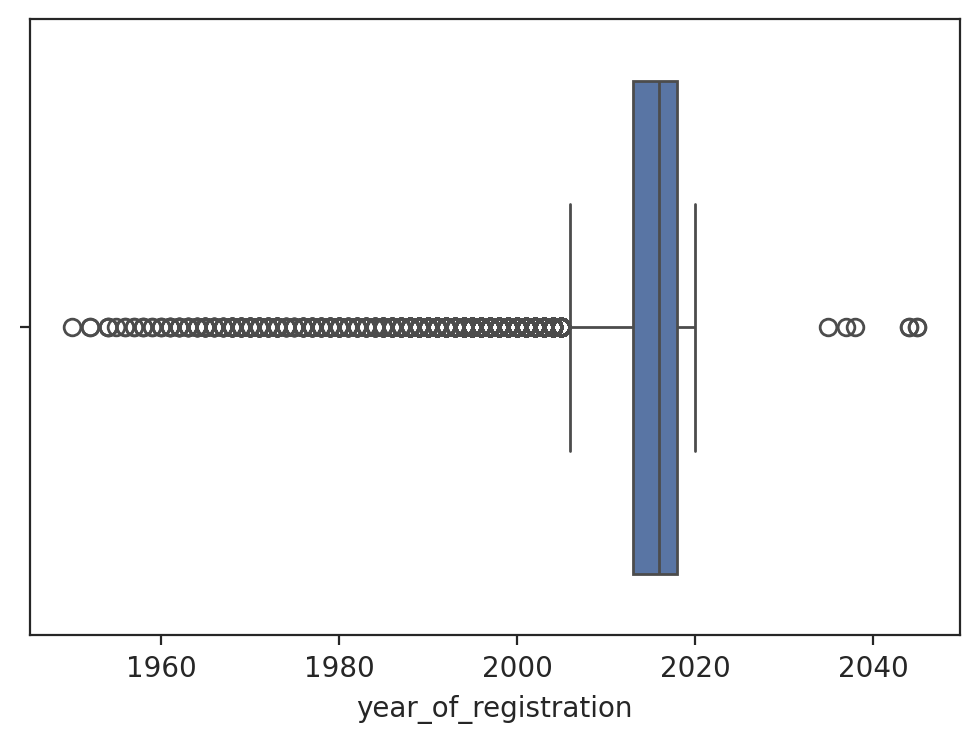

In [323]:
sns.boxplot(data = df , x = 'year_of_registration')

In [324]:
df = df.drop(df[df['year_of_registration'] > 2020].index)

In [325]:
df[df['year_of_registration'].isna()]

public_reference  mileage reg_code standard_colour standard_make  \
0        202006039777689      0.0      NaN            Grey         Volvo   
17       201911043995897      5.0      NaN             NaN        Nissan   
19       202008272998331      0.0      NaN           White    Volkswagen   
36       202001306737473      0.0      NaN           White          Fiat   
43       202003178531910      0.0      NaN             NaN         Honda   
...                  ...      ...      ...             ...           ...   
390844   202010024501227     10.0      NaN          Silver    Mitsubishi   
390873   202010104843364      5.0      NaN             Red           BMW   
390885   202010134960554     10.0      NaN           White           BMW   
390888   202010144983518      0.0      NaN             Red    Land Rover   
390950   202010285515882     10.0      NaN            Grey        Nissan   

            standard_model vehicle_condition  year_of_registration  price  \
0                     XC90               NEW                   NaN  73970   
17                 X-Trail               NEW                   NaN  27595   
19                 T-Cross               NEW                   NaN  25000   
36                   Panda               NEW                   NaN  13999   
43                   Civic               NEW                   NaN  19495   
...                    ...               ...                   ...    ...   
390844        Shogun Sport               NEW                   NaN  31999   
390873                  Z4               NEW                   NaN  47910   
390885            3 Series               NEW                   NaN  35023   
390888  Range Rover Evoque               NEW                   NaN  44995   
390950                Leaf               NEW                   NaN  28820   

          body_type  crossover_car_and_van              fuel_type  
0               SUV                  False  Petrol Plug-in Hybrid  
17              SUV                  False                 Diesel  
19              SUV                  False                 Petrol  
36        Hatchback                  False                 Petrol  
43        Hatchback                  False                 Petrol  
...             ...                    ...                    ...  
390844          SUV                  False                 Diesel  
390873  Convertible                  False                 Petrol  
390885       Saloon                  False                 Petrol  
390888          SUV                  False                 Petrol  
390950    Hatchback                  False               Electric  

[31314 rows x 12 columns]

<Axes: xlabel='year_of_registration'>

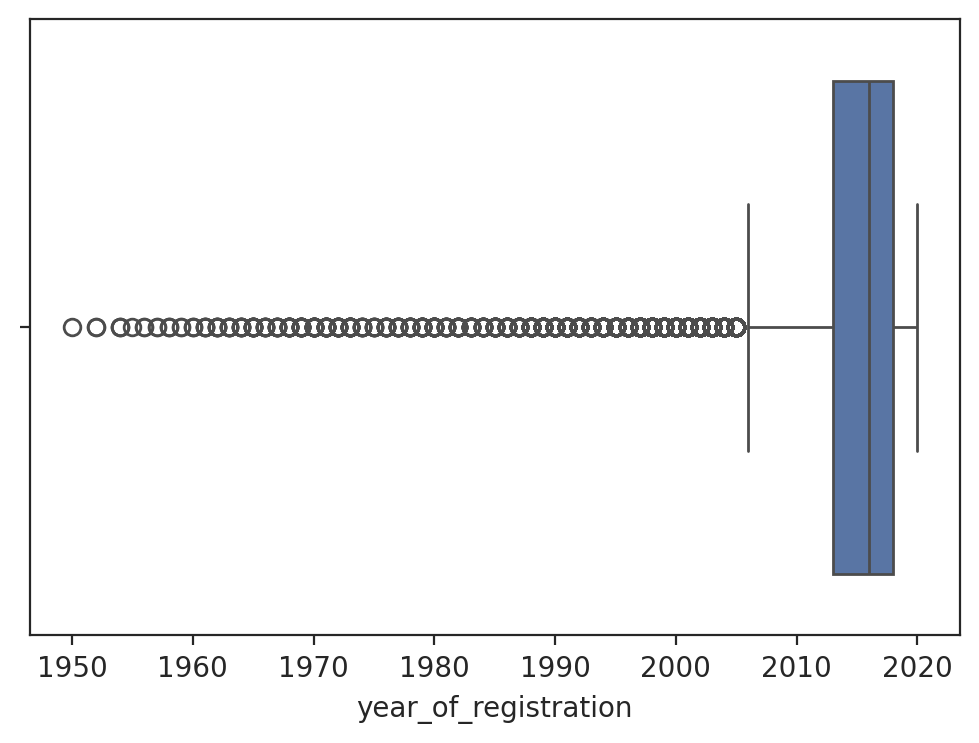

In [326]:
sns.boxplot(data = df , x = 'year_of_registration')

In [327]:
df[df['year_of_registration'].isna() & df['reg_code'].notna()]

public_reference   mileage reg_code standard_colour  standard_make  \
9736     202003098187902   73330.0        B            Gold         Jaguar   
16152    202010165086036   34000.0        P          Orange     Volkswagen   
27524    202003218665171   55400.0        E           White        Renault   
48837    202009304378374   24500.0        R            Blue          Mazda   
49584    202010215260465   49000.0        L            Blue      Chevrolet   
78723    202010014455127    2000.0       CA           Green       Caterham   
82913    202009234126186   99123.0        B           Green     Land Rover   
93061    202010215267071   55389.0        E            Grey  Mercedes-Benz   
118057   201906199165858   40000.0        Y           Black        Porsche   
118368   202010315654601   76066.0        L             Red            BMW   
143780   202011015662169   49500.0        J          Silver  Mercedes-Benz   
145516   202008283044857   58000.0        H           Brown         Jaguar   
146332   202010235347957   75370.0        S           White           Audi   
161553   202010195172029    4050.0   723xuu       Turquoise      Chevrolet   
167889   202007121159263   13101.0        F            Grey           Fiat   
175659   202007211525053  102000.0        N          Silver        Porsche   
178208   202003238705200  112000.0        N           Black  Mercedes-Benz   
183423   202010255403231   35000.0        E           Black        Porsche   
193618   202010285544711  106178.0        S            Blue         Nissan   
195274   202010275476622   99000.0        V            Blue     Volkswagen   
252087   202010235355514  106000.0        M             NaN        Bentley   
253959   202010235359252   33000.0        R            Grey        Porsche   
254299   202010235370841   44000.0        R          Yellow             MG   
259786   202006220384634   30915.0        G            Blue     Land Rover   
269277   202006300690337   90000.0        F             Red             MG   
270240   202006160168644    2650.0        H           White           Fiat   
290587   201907150103328   28972.0        G          Purple       Vauxhall   
293141   202010245384152   79000.0        M             Red         Jaguar   
309724   202008192660449   90000.0        A           Green  Mercedes-Benz   
317591   202008011974003   48156.0        V           Black        Bentley   
322358   202010235339385   31500.0        M           Green         Morgan   
329762   202010175118726   70986.0        D             Red         Jaguar   
342044   202008293091830   28972.0        Y             Red     Land Rover   

       standard_model vehicle_condition  year_of_registration  price  \
9736          Mark II              USED                   NaN  24990   
16152       Campervan              USED                   NaN  12500   
27524             GTA              USED                   NaN  12495   
48837          Mazda3              USED                   NaN  13495   
49584             SSR              USED                   NaN  21500   
78723           Seven              USED                   NaN  21995   
82913      Series III              USED                   NaN  12000   
93061         E Class              USED                   NaN  25990   
118057            911              USED                   NaN  39990   
118368       3 Series              USED                   NaN   8990   
143780             CL              USED                   NaN  11995   
145516             XJ              USED                   NaN   9995   
146332             80              USED                   NaN   3699   
161553       Corvette              USED                   NaN  89990   
167889            500              USED                   NaN  12995   
175659            911              USED                   NaN  42995   
178208        E Class              USED                   NaN   8145   
183423          Macan              USED                   N

In [328]:
df[(df['reg_code'].notna()) & (df['reg_code'].str.isalpha()) & (df['year_of_registration' ] < 1983 )].sample(10)


public_reference   mileage reg_code standard_colour  standard_make  \
223877   202010165064113   80087.0        N            Blue     Land Rover   
360768   202009274273681   39000.0        M            Blue     Land Rover   
34998    202006160172780   37000.0        K             Red         Jaguar   
131378   202006230435492  124000.0        G           Beige    Rolls-Royce   
320843   202006220385910   56753.0        X           Green  Mercedes-Benz   
205856   202008052115994  104000.0        V           White    Rolls-Royce   
254668   202007221556497     210.0        D            Blue     Land Rover   
373999   202009224044303   92000.0        R           Brown          Rover   
117209   202009234105102   24653.0        Y            Blue          Lotus   
107265   202009033270756    1000.0        G           Black          Dodge   

       standard_model vehicle_condition  year_of_registration  price  \
223877     Series III              USED                1975.0  26995   
360768     Series III              USED                1974.0  14995   
34998          E-Type              USED                1972.0  22000   
131378  Silver Shadow              USED                1969.0  19950   
320843            380              USED                1981.0  17995   
205856  Silver Wraith              USED                1980.0  19995   
254668      Series II              USED                1966.0  28750   
373999             P6              USED                1976.0   9995   
117209         Esprit              USED                1982.0  35000   
107265        Charger              USED                1980.0  79995   

          body_type  crossover_car_and_van fuel_type  
223877          SUV                   True    Petrol  
360768          SUV                   True    Petrol  
34998   Convertible                  False    Petrol  
131378       Saloon                  False    Petrol  
320843       Saloon                  False    Petrol  
205856       Saloon                  False    Petrol  
254668          SUV                  False    Petrol  
373999       Saloon                  False    Petrol  
117209        Coupe                  False    Petrol  
107265       Saloon                  False    Petrol

In [329]:
df[df['year_of_registration'] < 1963]

public_reference   mileage reg_code standard_colour  standard_make  \
15141    202010034549723   45162.0      NaN          Silver        Daimler   
48223    202010145006063    9000.0      NaN             NaN     Land Rover   
63559    202008062171865   90000.0      NaN     Multicolour  International   
85563    202009284324932   10000.0      NaN           Green         Morgan   
105916   202002137272949  103808.0      NaN           Green     Land Rover   
114148   202007171355312   53399.0      NaN            Grey          Rover   
140915   201910253690150   76000.0      NaN           White       Cadillac   
176807   202010195193032   95000.0      NaN           Green     Land Rover   
178722   202010024506446   32000.0      NaN             Red         Austin   
188787   202008172570873     367.0      NaN             Red         Morgan   
196706   202009294370290   13800.0      NaN           White         Jaguar   
200176   202009274272833   30465.0       62            Blue         Austin   
212062   202008082253653   14000.0      NaN            Pink         Morris   
213130   202009063384050    2000.0        E           White     Volkswagen   
230706   202008112370177     350.0      NaN          Yellow        Triumph   
257186   201904096788334     100.0      NaN           White        Triumph   
265093   202009133674279   50100.0      NaN           Green     Land Rover   
277935   202008293087710   13883.0      NaN           Green     Land Rover   
295055   202010225316355   80000.0      NaN             Red         Austin   
310669   202009043316525   47000.0      NaN           White         Morris   
330619   202009013192347   28000.0      NaN            Blue           Fiat   
331365   202010124891983    2275.0      NaN          Yellow             MG   
333428   202010165068876   37769.0      NaN          Silver        Porsche   
344632   202007131200286   10000.0       51           Green        Triumph   
351379   202010074695867      28.0      NaN          Silver         Austin   
354530   202009244157755   52158.0      NaN           Green          Volvo   
355960   202010175115413   50000.0      NaN             NaN         Austin   
370950   202007171361599    1000.0      NaN             NaN      Chevrolet   
381529   201802223956035   72000.0        p           Green     Land Rover   
387063   202010285543023   86813.0        A            Blue           Fiat   

        standard_model vehicle_condition  year_of_registration  price  \
15141               SP              USED                1962.0  49995   
48223        Series II              USED                1961.0  39995   
63559   Harvester A100              USED                1957.0  24995   
85563        Plus Four              USED                1954.0  39950   
105916        Series I              USED                1955.0  25000   
114148             110              USED                1962.0   7295   
140915        De Ville              USED                1959.0  39990   
176807       Series II              USED                1958.0   5995   
178722          Healey              USED                1961.0  15000   
188787             4/4              USED                1950.0  34950   
196706          Mark I              USED                1956.0  40000   
200176            Mini              USED                1962.0  20995   
212062            Mini              USED                1961.0   9950   
213130         Karmann              USED                1961.0  20000   
230706             TR2              USED                1956.0  29950   
257186             TR2              USED                1954.0  30000   
265093       Series II              USED                1960.0  12500   
277935       Series II              USED                1962.0  14990   
295055          Healey              USED                1958.0  47995   
310669          Oxford              USED                1952.0   8000   
330619             500              USED                

In [330]:
df.shape

(390974, 12)

In [331]:
#dropping missing values of year of registration after fixing possible outliers and  filling possible missing values .
df = df.dropna(subset=['year_of_registration']).reset_index(drop = True)


In [332]:
df.query("year_of_registration.isna()")

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

In [333]:
df.shape

(359660, 12)

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359660 entries, 0 to 359659
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       359660 non-null  int64  
 1   mileage                359660 non-null  float64
 2   reg_code               359426 non-null  object 
 3   standard_colour        355691 non-null  object 
 4   standard_make          359660 non-null  object 
 5   standard_model         359660 non-null  object 
 6   vehicle_condition      359660 non-null  object 
 7   year_of_registration   359660 non-null  float64
 8   price                  359660 non-null  int64  
 9   body_type              359004 non-null  object 
 10  crossover_car_and_van  359660 non-null  bool   
 11  fuel_type              359266 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 30.5+ MB


# fuel type missing values fixing

In [335]:
df['fuel_type'].isna().sum()

394

In [336]:
df['fuel_type'].mode().iloc[0]

'Petrol'

In [337]:
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode().iloc[0])

In [338]:
df['fuel_type'].isna().sum()

0

# standard_colour missing values fixing


In [339]:
df['standard_colour'].isna().sum()

3969

In [340]:
df['standard_colour'] = df['standard_colour'].fillna(df['standard_colour'].mode().iloc[0])


In [341]:
df['standard_colour'].isna().sum()

0

# body_type missing values fixing


In [342]:

df['body_type'].isna().sum()

656

In [343]:
df['body_type'] = df['body_type'].fillna(df['body_type'].mode().iloc[0])


In [344]:
df['body_type'].isna().sum()

0

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359660 entries, 0 to 359659
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       359660 non-null  int64  
 1   mileage                359660 non-null  float64
 2   reg_code               359426 non-null  object 
 3   standard_colour        359660 non-null  object 
 4   standard_make          359660 non-null  object 
 5   standard_model         359660 non-null  object 
 6   vehicle_condition      359660 non-null  object 
 7   year_of_registration   359660 non-null  float64
 8   price                  359660 non-null  int64  
 9   body_type              359660 non-null  object 
 10  crossover_car_and_van  359660 non-null  bool   
 11  fuel_type              359660 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 30.5+ MB


I am not dealing with the outliers of reg_code as that column is unwanted for me . I will be deleting that column when subsetting the data or feature engineering because reg_code column and year_of_registration column deliver the same answer.

In [346]:
df.head()

df['vehicle_condition'].value_counts()#all the new vehicles are removed while cleaning year column

#creating new column which tells about age of a car by subtracting year_of_registration from current year.


from datetime import datetime

#creating age_of_car column
current_year = datetime.now().year
df['age_of_car'] = current_year - df['year_of_registration']

#creating is_luxury column
luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Rolls-Royce', 'Land Rover']
df['is_luxury'] = df['standard_make'].isin(luxury_brands).astype(int)

#I have added age_of_car and is_luxury column in a data frame


df['is_luxury'].value_counts()



#df= df[['mileage' , 'colour' , 'maker' , 'year_of_registration' , 'body_type', 'fuel_type', 'age_of_car', 'price_category', 'price']]


df.info()

df['mileage'] = df['mileage'].astype(int)
df['age_of_car'] = df['age_of_car'].astype(int)
df['year_of_registration'] = df['year_of_registration'].astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359660 entries, 0 to 359659
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       359660 non-null  int64  
 1   mileage                359660 non-null  float64
 2   reg_code               359426 non-null  object 
 3   standard_colour        359660 non-null  object 
 4   standard_make          359660 non-null  object 
 5   standard_model         359660 non-null  object 
 6   vehicle_condition      359660 non-null  object 
 7   year_of_registration   359660 non-null  float64
 8   price                  359660 non-null  int64  
 9   body_type              359660 non-null  object 
 10  crossover_car_and_van  359660 non-null  bool   
 11  fuel_type              359660 non-null  object 
 12  age_of_car             359660 non-null  float64
 13  is_luxury              359660 non-null  int64  
dtypes: bool(1), float64(3), int64(3), ob

# target encoding


In [347]:
pip install category_encoders;

In [348]:
from category_encoders import TargetEncoder

cols = ['standard_colour', 'standard_make','standard_model', 'body_type','crossover_car_and_van', 'fuel_type']
target = 'price'
te = TargetEncoder()
for col in cols:
    transformed_col = te.fit_transform(df[col].astype(str), df[target])
    df[col + '_encoded'] = transformed_col  # Creating new columns with encoded values

# Dropping original categorical columns
df.drop(columns=cols, inplace=True)

print(df.head())

   public_reference  mileage reg_code vehicle_condition  year_of_registration  \
0   202007020778260   108230       61              USED                  2011   
1   202007020778474     7800       17              USED                  2017   
2   202007080986776    45000       16              USED                  2016   
3   202007161321269    64000       64              USED                  2015   
4   202009304412074    16000       17              USED                  2017   

   price  age_of_car  is_luxury  standard_colour_encoded  \
0   7000          13          0             14639.180409   
1  14000           7          0             17008.843329   
2   7995           8          0             12595.682799   
3  26995           9          1             17008.843329   
4  29000           7          1             14639.180409   

   standard_make_encoded  standard_model_encoded  body_type_encoded  \
0           22703.781590            14969.810028       17805.474438   
1         

In [349]:
df.head()

public_reference  mileage reg_code vehicle_condition  year_of_registration  \
0   202007020778260   108230       61              USED                  2011   
1   202007020778474     7800       17              USED                  2017   
2   202007080986776    45000       16              USED                  2016   
3   202007161321269    64000       64              USED                  2015   
4   202009304412074    16000       17              USED                  2017   

   price  age_of_car  is_luxury  standard_colour_encoded  \
0   7000          13          0             14639.180409   
1  14000           7          0             17008.843329   
2   7995           8          0             12595.682799   
3  26995           9          1             17008.843329   
4  29000           7          1             14639.180409   

   standard_make_encoded  standard_model_encoded  body_type_encoded  \
0           22703.781590            14969.810028       17805.474438   
1           12519.724688            10640.011057       19855.550659   
2            7851.974067             7845.507213        9840.043912   
3           31402.883333            37681.483564       19855.550659   
4           18264.181047            24056.155502       18797.515553   

   crossover_car_and_van_encoded  fuel_type_encoded  
0                   14784.031465       15706.832650  
1                   14784.031465       13301.285549  
2                   14784.031465       15706.832650  
3                   14784.031465       15706.832650  
4                   14784.031465       13301.285549

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359660 entries, 0 to 359659
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   public_reference               359660 non-null  int64  
 1   mileage                        359660 non-null  int64  
 2   reg_code                       359426 non-null  object 
 3   vehicle_condition              359660 non-null  object 
 4   year_of_registration           359660 non-null  int64  
 5   price                          359660 non-null  int64  
 6   age_of_car                     359660 non-null  int64  
 7   is_luxury                      359660 non-null  int64  
 8   standard_colour_encoded        359660 non-null  float64
 9   standard_make_encoded          359660 non-null  float64
 10  standard_model_encoded         359660 non-null  float64
 11  body_type_encoded              359660 non-null  float64
 12  crossover_car_and_van_encoded 

In [351]:
# Dictionary mapping original names to encoded names
name_mapping = {
    'standard_colour_encoded': 'standard_colour',
    'standard_make_encoded': 'standard_make',
    'standard_model_encoded': 'standard_model',
    'body_type_encoded' : 'body_type',
    'fuel_type_encoded': 'fuel_type',
    'crossover_car_and_van_encoded':'crossover_car_and_van'
}

# Rename encoded columns to original names
df.rename(columns=name_mapping, inplace=True)

# Convert float columns to integers
encoded_cols = ['standard_colour', 'standard_make','standard_model', 'body_type', 'fuel_type','crossover_car_and_van' ]
df[encoded_cols] = df[encoded_cols].astype(int)



In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359660 entries, 0 to 359659
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   public_reference       359660 non-null  int64 
 1   mileage                359660 non-null  int64 
 2   reg_code               359426 non-null  object
 3   vehicle_condition      359660 non-null  object
 4   year_of_registration   359660 non-null  int64 
 5   price                  359660 non-null  int64 
 6   age_of_car             359660 non-null  int64 
 7   is_luxury              359660 non-null  int64 
 8   standard_colour        359660 non-null  int64 
 9   standard_make          359660 non-null  int64 
 10  standard_model         359660 non-null  int64 
 11  body_type              359660 non-null  int64 
 12  crossover_car_and_van  359660 non-null  int64 
 13  fuel_type              359660 non-null  int64 
dtypes: int64(12), object(2)
memory usage: 38.4+ MB


In [353]:
df.columns

Index(['public_reference', 'mileage', 'reg_code', 'vehicle_condition',
       'year_of_registration', 'price', 'age_of_car', 'is_luxury',
       'standard_colour', 'standard_make', 'standard_model', 'body_type',
       'crossover_car_and_van', 'fuel_type'],
      dtype='object')

In [354]:
#selecting customer based on domain knowledge
df=df[['mileage','year_of_registration', 'price', 'age_of_car', 'is_luxury',
       'standard_colour', 'standard_make', 'standard_model', 'body_type',
       'crossover_car_and_van', 'fuel_type']]

In [355]:
df

mileage  year_of_registration  price  age_of_car  is_luxury  \
0        108230                  2011   7000          13          0   
1          7800                  2017  14000           7          0   
2         45000                  2016   7995           8          0   
3         64000                  2015  26995           9          1   
4         16000                  2017  29000           7          1   
...         ...                   ...    ...         ...        ...   
359655     5179                  2019  10595           5          0   
359656   110000                  2009   2000          15          0   
359657    52760                  2012   7250          12          0   
359658    10250                  2015  11490           9          0   
359659    14000                  2014  20520          10          1   

        standard_colour  standard_make  standard_model  body_type  \
0                 14639          22703           14969      17805   
1                 17008          12519           10640      19855   
2                 12595           7851            7845       9840   
3                 17008          31402           37681      19855   
4                 14639          18264           24056      18797   
...                 ...            ...             ...        ...   
359655            17008           9430            8831       9840   
359656            12266           9430            2727       9840   
359657            15015          10906           12556      19855   
359658            12266          12370           12664       9840   
359659            12147          18264           14965      15310   

        crossover_car_and_van  fuel_type  
0                       14784      15706  
1                       14784      13301  
2                       14784      15706  
3                       14784      15706  
4                       14784      13301  
...                       ...        ...  
359655                  14784      13301  
359656                  14784      13301  
359657                  14784      13301  
359658                  14784      13301  
359659                  14784      15706  

[359660 rows x 11 columns]

In [356]:
#splitting into predictors and target
X =df.drop(columns = ['price'])
y = df['price']

In [357]:
#train test split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)


In [358]:
X_train.head()

mileage  year_of_registration  age_of_car  is_luxury  standard_colour  \
14368     52000                  2015           9          0            12266   
330018    66078                  2011          13          0            12266   
32781     22025                  2018           6          1            16291   
312450     6912                  2019           5          0            14639   
171670    15000                  2016           8          0            16291   

        standard_make  standard_model  body_type  crossover_car_and_van  \
14368           13333           13725      18797                  14784   
330018          10906            6698       9840                  14784   
32781           18264           14026      17805                  14784   
312450          13333            9424       9840                  14784   
171670          10906           15676      19855                  14784   

        fuel_type  
14368       15706  
330018      13301  
32781       13301  
312450      13301  
171670      15706

In [359]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)



In [360]:
X_train_scaled_df= pd.DataFrame(X_train_scaled,columns = X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X.columns)

In [361]:
X_train_scaled.shape

(287728, 10)

In [362]:
'''from sklearn.preprocessing import StandardScaler
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))'''

'from sklearn.preprocessing import StandardScaler\n# Standardize numerical features\nscaler = StandardScaler()\nX_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))\nX_test_scaled = pd.DataFrame(scaler.transform(X_test))'

In [363]:
X_test_scaled_df

mileage  year_of_registration  age_of_car  is_luxury  standard_colour  \
0      0.467221              0.957143    0.042857        0.0         0.760586   
1      0.387234              0.928571    0.071429        0.0         0.798585   
2      0.043156              0.985714    0.014286        0.0         0.520768   
3      0.273636              0.928571    0.071429        0.0         0.520768   
4      0.467696              0.900000    0.100000        0.0         0.927539   
...         ...                   ...         ...        ...              ...   
71927  0.030768              0.985714    0.014286        1.0         0.927539   
71928  0.183881              0.957143    0.042857        1.0         1.000000   
71929  0.131400              0.957143    0.042857        1.0         0.760586   
71930  0.350798              0.942857    0.057143        0.0         0.927539   
71931  0.382658              0.957143    0.042857        1.0         1.000000   

       standard_make  standard_model  body_type  crossover_car_and_van  \
0           0.113529        0.123377   0.215575                    0.0   
1           0.233714        0.174483   0.313904                    0.0   
2           0.093998        0.095125   0.000000                    0.0   
3           0.058440        0.058061   0.000000                    0.0   
4           0.224509        0.331297   0.394695                    0.0   
...              ...             ...        ...                    ...   
71927       0.187181        0.194078   0.215575                    0.0   
71928       0.187181        0.130443   0.000000                    0.0   
71929       0.204093        0.533843   0.394695                    0.0   
71930       0.113529        0.105162   0.394695                    0.0   
71931       0.181328        0.137664   0.313904                    0.0   

       fuel_type  
0       0.114089  
1       0.114089  
2       0.000000  
3       0.000000  
4       0.233159  
...          ...  
71927   0.000000  
71928   0.114089  
71929   0.114089  
71930   0.000000  
71931   0.114089  

[71932 rows x 10 columns]

In [364]:
X_train_scaled_df

mileage  year_of_registration  age_of_car  is_luxury  \
0       0.411614              0.928571    0.071429        0.0   
1       0.523050              0.871429    0.128571        0.0   
2       0.174342              0.971429    0.028571        1.0   
3       0.054713              0.985714    0.014286        0.0   
4       0.118735              0.942857    0.057143        0.0   
...          ...                   ...         ...        ...   
287723  0.000040              1.000000    0.000000        0.0   
287724  0.089645              0.957143    0.042857        0.0   
287725  0.237470              0.942857    0.057143        1.0   
287726  0.241301              0.942857    0.057143        0.0   
287727  0.264224              0.957143    0.042857        0.0   

        standard_colour  standard_make  standard_model  body_type  \
0              0.520768       0.123135        0.139489   0.352999   
1              0.520768       0.094493        0.061299   0.000000   
2              0.927539       0.181328        0.142838   0.313904   
3              0.760586       0.123135        0.091631   0.000000   
4              0.927539       0.094493        0.161198   0.394695   
...                 ...            ...             ...        ...   
287723         0.798585       0.123135        0.067608   0.000000   
287724         0.798585       0.094128        0.059129   0.000000   
287725         0.760586       0.187181        0.214296   0.313904   
287726         0.798585       0.058440        0.058061   0.000000   
287727         0.760586       0.094128        0.099253   0.215575   

        crossover_car_and_van  fuel_type  
0                         0.0   0.114089  
1                         0.0   0.000000  
2                         0.0   0.000000  
3                         0.0   0.000000  
4                         0.0   0.114089  
...                       ...        ...  
287723                    0.0   0.000000  
287724                    0.0   0.000000  
287725                    0.0   0.000000  
287726                    0.0   0.000000  
287727                    0.0   0.000000  

[287728 rows x 10 columns]

# feature engineering

In [365]:
from sklearn.preprocessing import PolynomialFeatures

# Generated polynomial features
poly = PolynomialFeatures(degree=2,interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled_df)
X_test_poly =poly.transform(X_test_scaled_df)

#get the feature names from the transformer
feature_names = poly.get_feature_names_out(X_train_scaled_df.columns)
features = poly.get_feature_names_out(X_test_scaled_df.columns)

#convert the transformed data to a DataFrame
X_train_poly_df = pd.DataFrame(X_train_poly,columns = feature_names)
X_test_poly_df= pd.DataFrame(X_test_poly,columns = features)

In [366]:
X_train_poly_df.head()

mileage  year_of_registration  age_of_car  is_luxury  standard_colour  \
0  0.411614              0.928571    0.071429        0.0         0.520768   
1  0.523050              0.871429    0.128571        0.0         0.520768   
2  0.174342              0.971429    0.028571        1.0         0.927539   
3  0.054713              0.985714    0.014286        0.0         0.760586   
4  0.118735              0.942857    0.057143        0.0         0.927539   

   standard_make  standard_model  body_type  crossover_car_and_van  fuel_type  \
0       0.123135        0.139489   0.352999                    0.0   0.114089   
1       0.094493        0.061299   0.000000                    0.0   0.000000   
2       0.181328        0.142838   0.313904                    0.0   0.000000   
3       0.123135        0.091631   0.000000                    0.0   0.000000   
4       0.094493        0.161198   0.394695                    0.0   0.114089   

   ...  standard_model^2  standard_model body_type  \
0  ...          0.019457                  0.049239   
1  ...          0.003758                  0.000000   
2  ...          0.020403                  0.044837   
3  ...          0.008396                  0.000000   
4  ...          0.025985                  0.063624   

   standard_model crossover_car_and_van  standard_model fuel_type  \
0                                   0.0                  0.015914   
1                                   0.0                  0.000000   
2                                   0.0                  0.000000   
3                                   0.0                  0.000000   
4                                   0.0                  0.018391   

   body_type^2  body_type crossover_car_and_van  body_type fuel_type  \
0     0.124608                              0.0             0.040273   
1     0.000000                              0.0             0.000000   
2     0.098536                              0.0             0.000000   
3     0.000000                              0.0             0.000000   
4     0.155784                              0.0             0.045030   

   crossover_car_and_van^2  crossover_car_and_van fuel_type  fuel_type^2  
0                      0.0                              0.0     0.013016  
1                      0.0                              0.0     0.000000  
2                      0.0                              0.0     0.000000  
3                      0.0                              0.0     0.000000  
4                      0.0                              0.0     0.013016  

[5 rows x 65 columns]

In [367]:
X_test_poly_df.head()

mileage  year_of_registration  age_of_car  is_luxury  standard_colour  \
0  0.467221              0.957143    0.042857        0.0         0.760586   
1  0.387234              0.928571    0.071429        0.0         0.798585   
2  0.043156              0.985714    0.014286        0.0         0.520768   
3  0.273636              0.928571    0.071429        0.0         0.520768   
4  0.467696              0.900000    0.100000        0.0         0.927539   

   standard_make  standard_model  body_type  crossover_car_and_van  fuel_type  \
0       0.113529        0.123377   0.215575                    0.0   0.114089   
1       0.233714        0.174483   0.313904                    0.0   0.114089   
2       0.093998        0.095125   0.000000                    0.0   0.000000   
3       0.058440        0.058061   0.000000                    0.0   0.000000   
4       0.224509        0.331297   0.394695                    0.0   0.233159   

   ...  standard_model^2  standard_model body_type  \
0  ...          0.015222                  0.026597   
1  ...          0.030444                  0.054771   
2  ...          0.009049                  0.000000   
3  ...          0.003371                  0.000000   
4  ...          0.109758                  0.130761   

   standard_model crossover_car_and_van  standard_model fuel_type  \
0                                   0.0                  0.014076   
1                                   0.0                  0.019907   
2                                   0.0                  0.000000   
3                                   0.0                  0.000000   
4                                   0.0                  0.077245   

   body_type^2  body_type crossover_car_and_van  body_type fuel_type  \
0     0.046473                              0.0             0.024595   
1     0.098536                              0.0             0.035813   
2     0.000000                              0.0             0.000000   
3     0.000000                              0.0             0.000000   
4     0.155784                              0.0             0.092027   

   crossover_car_and_van^2  crossover_car_and_van fuel_type  fuel_type^2  
0                      0.0                              0.0     0.013016  
1                      0.0                              0.0     0.013016  
2                      0.0                              0.0     0.000000  
3                      0.0                              0.0     0.000000  
4                      0.0                              0.0     0.054363  

[5 rows x 65 columns]

In [368]:
y_train

14368     11600
330018     4195
32781     19000
312450    11999
171670    15975
          ...  
84434     15780
95816      7778
203245    18500
100879     7400
351400     8500
Name: price, Length: 287728, dtype: int64

Why feature selection?
Simplicity (fewer features, higher comprehensibility?)
Prevent overfitting
Prevent multicollinearity
Uninformative features might hurt some models
Train/predict performance

# feature selection and dimensional reduction

### Automated Feature Selection (AFS): Univariate

* Supervised, univariate, **relationship with target**
    - We've done it before manually and with the support of EDA
    - Bear in mind that it is univariate... if a feature is useful only for interactions, it won't be picked up
    - Most common case is `SelectKBest` with `f_regression` or `f_classif`

In [369]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top k features
selector = SelectKBest(f_regression, k=6)
X_train_selected = selector.fit_transform(X_train_poly_df,y_train)
X_test_selected = selector.transform(X_test_poly_df)



selected_train_features = X_train_poly_df.columns[selector.get_support()]
selected_test_features = X_test_poly_df.columns[selector.get_support()]

X_train_selected_df = pd.DataFrame(X_train_selected, columns = selected_train_features)
X_test_selected_df = pd.DataFrame(X_test_selected,columns = selected_test_features)


# Recursive Feature Elimination (RFE)

In [370]:
from sklearn.feature_selection import RFECV

In [371]:
model = LinearRegression()
ref_selector = RFECV(model, step=1, cv=5)
ref_selector.fit(X_train_poly_df, y_train)

RFECV(cv=5, estimator=LinearRegression())

In [372]:
X_sel = ref_selector.transform(X_train_poly_df)


In [373]:
ref_selector.get_feature_names_out()

array(['mileage', 'year_of_registration', 'age_of_car', 'is_luxury',
       'standard_colour', 'standard_make', 'standard_model', 'body_type',
       'crossover_car_and_van', 'fuel_type', 'mileage^2',
       'mileage year_of_registration', 'mileage age_of_car',
       'mileage is_luxury', 'mileage standard_make',
       'mileage standard_model', 'mileage body_type',
       'mileage crossover_car_and_van', 'mileage fuel_type',
       'year_of_registration^2', 'year_of_registration age_of_car',
       'year_of_registration is_luxury',
       'year_of_registration standard_colour',
       'year_of_registration standard_make',
       'year_of_registration standard_model',
       'year_of_registration body_type',
       'year_of_registration crossover_car_and_van',
       'year_of_registration fuel_type', 'age_of_car^2',
       'age_of_car is_luxury', 'age_of_car standard_colour',
       'age_of_car standard_make', 'age_of_car standard_model',
       'age_of_car body_type', 'age_of_car cros

In [374]:
len(ref_selector.get_feature_names_out())

63

In [375]:
n_scores = len(ref_selector.cv_results_["mean_test_score"])
n_scores

65

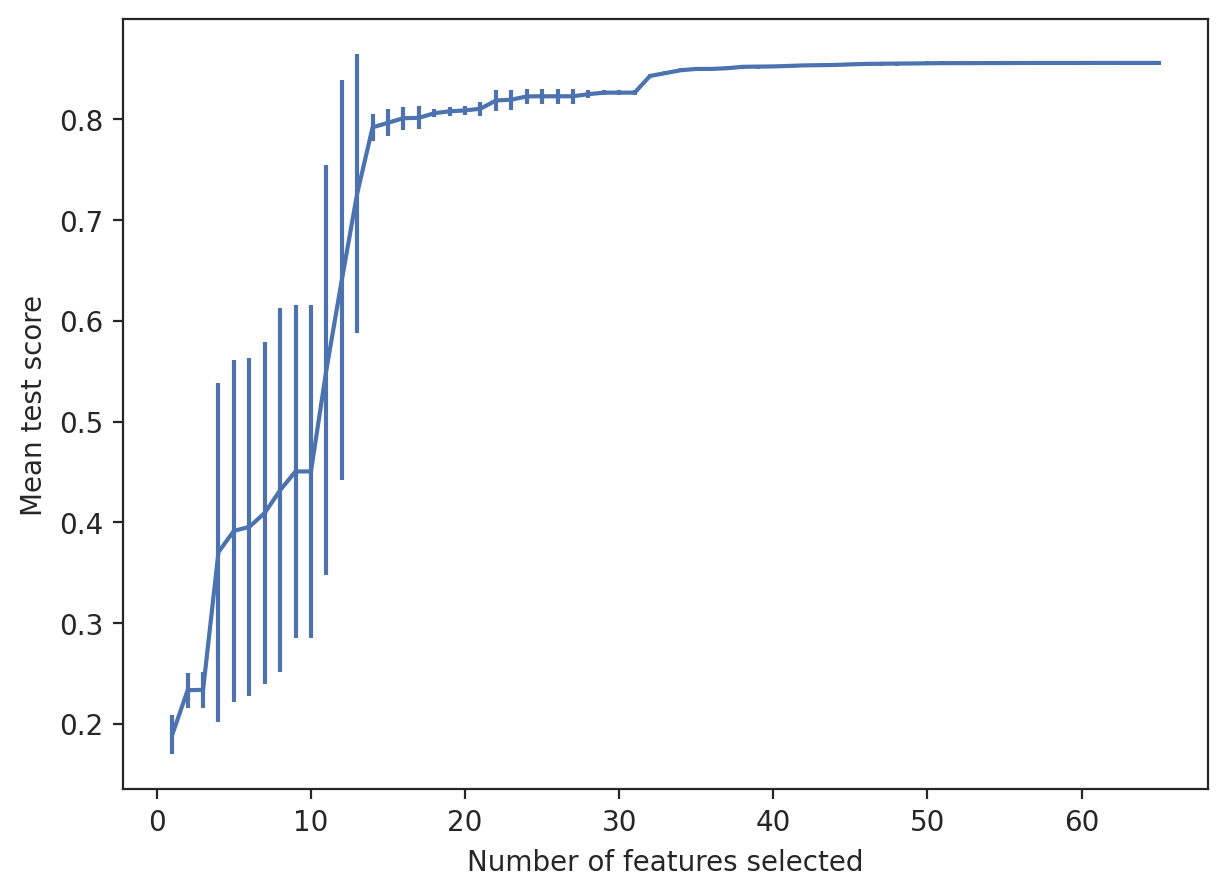

In [376]:
fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    ref_selector.cv_results_["mean_test_score"],
    yerr=ref_selector.cv_results_["std_test_score"],
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");

### Sequential Feature Selection (SFS) (Forward/Backward)

- Greedy search
- Forward-SFS: "start with zero features and find the one feature that maximizes a cross-validated score when an estimator is trained on this single feature. Once that first feature is selected, we repeat the procedure by adding a new feature to the set of selected features. The procedure stops when the desired number of selected features is reached"
- difference from RFE: **model performance**

In [377]:
#from sklearn.feature_selection import SequentialFeatureSelector

In [378]:
'''sfs_forward = SequentialFeatureSelector(
    LinearRegression(), n_features_to_select='auto', direction="forward"
).fit(X_train_poly_df, y_train)'''

'sfs_forward = SequentialFeatureSelector(\n    LinearRegression(), n_features_to_select=\'auto\', direction="forward"\n).fit(X_train_poly_df, y_train)'

In [379]:
'''sfs_forward.get_feature_names_out()'''

'sfs_forward.get_feature_names_out()'

In [380]:
#len(sfs_forward.get_feature_names_out())

In [381]:
#X_sel = selector.transform(X_train_poly_df)

In [382]:
#model = LinearRegression().fit(X_sel, y_train)
#scores = cross_val_score(model, X_sel, y_train)
#scores.mean(), scores.std()

In [383]:
#X_train_selected_df

In [384]:
from sklearn.decomposition import PCA

# Initialize PCA with desired number of components
pca = PCA(n_components=5)
# Fit PCA on selected features
X_train_selected_pca = pca.fit_transform(X_train_selected_df)
# Transform test data
X_test_selected_pca = pca.transform(X_test_selected_df)

# model building

# Random Forest

In [385]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error

In [386]:
# Random Forest Regressor
rft = RandomForestRegressor(n_estimators=5,max_depth=6,random_state = 2)
rft.fit(X_train_selected_df,y_train)

RandomForestRegressor(max_depth=6, n_estimators=5, random_state=2)

In [387]:
mean_absolute_error(y_test, rft.predict(X_test_selected_df))

3702.52623477333

In [388]:
rft.score(X_test_selected, y_test)

0.7782524599822112

In [389]:
y_pred_dummy = y_train.mean()

In [390]:
y_pred_dummy

14819.797364177279

In [391]:


# Create a pipeline with Random Forest Regressor
pipeline = Pipeline(steps=[
    ('regressor', RandomForestRegressor(random_state = 2))
])

# Define parameters for GridSearchCV
param_grid = {
    'regressor__n_estimators': [3,5,7],
    'regressor__max_depth': [2,6,7],}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=KFold(n_splits=5,random_state=2,shuffle = True), scoring='neg_mean_absolute_error')

# Fit the GridSearchCV to find the best model
grid_search.fit(X_train_selected_df, y_train)

# Get the best model
best_model_rf = grid_search.best_estimator_

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Predict on the whole dataset using the best model
y_pred_train = best_model_rf.predict(X_train_selected_df)
y_pred_test = best_model_rf.predict(X_test_selected_df)

# Evaluate the model performance
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")

# Cross-validated score
cv_scores = cross_val_score(best_model_rf, X_test_selected_df, y_test, scoring='neg_mean_absolute_error')
cv_mean_mae = -1 * cv_scores.mean()
cv_std_mae = cv_scores.std()

print(f"Cross-Validated MAE: {cv_mean_mae} +/- {cv_std_mae}")


Best Parameters: {'regressor__max_depth': 7, 'regressor__n_estimators': 7}
Train MAE: 3334.550765508386
Test MAE: 3358.8343624670592
Cross-Validated MAE: 3301.0696855184387 +/- 37.34384904683838


Best Parameters: {'regressor__max_depth': 7, 'regressor__n_estimators': 7}
Train MAE: 3339.826091396058
Test MAE: 3362.1683101805725
Cross-Validated MAE: 3299.4232768963034 +/- 26.778475539629596

In [392]:
# Random Forest Regressor
rft = RandomForestRegressor(n_estimators=7,max_depth=7,random_state=2)
rft.fit(X_train_selected_df,y_train)

RandomForestRegressor(max_depth=7, n_estimators=7, random_state=2)

In [393]:
mean_absolute_error(y_test, rft.predict(X_test_selected_df))

3358.8343624670592

In [394]:
rft.score(X_test_selected, y_test)

0.8157178015949649

In [395]:
y_pred_dummy = y_train.mean()

In [396]:
y_pred_dummy

14819.797364177279

In [397]:
grid_search.cv_results_

{'mean_fit_time': array([0.39873528, 0.60752249, 1.29056525, 1.41491699, 1.5142354 ,
        2.55821362, 1.49566226, 1.74474573, 2.85125127]),
 'std_fit_time': array([0.02168359, 0.02505181, 0.33974858, 0.42799698, 0.05012588,
        0.53655426, 0.37084896, 0.0540598 , 0.52907392]),
 'mean_score_time': array([0.00828443, 0.01041269, 0.01675153, 0.01502371, 0.01835885,
        0.02576928, 0.01705189, 0.0204288 , 0.03103509]),
 'std_score_time': array([0.00091697, 0.00116137, 0.00379332, 0.00275838, 0.00067613,
        0.00320082, 0.003289  , 0.00061223, 0.00374943]),
 'param_regressor__max_depth': masked_array(data=[2, 2, 2, 6, 6, 6, 7, 7, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_regressor__n_estimators': masked_array(data=[3, 5, 7, 3, 5, 7, 3, 5, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False],
       

In [398]:
df1= pd.DataFrame(grid_search.cv_results_)
df1

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.398735      0.021684         0.008284        0.000917   
1       0.607522      0.025052         0.010413        0.001161   
2       1.290565      0.339749         0.016752        0.003793   
3       1.414917      0.427997         0.015024        0.002758   
4       1.514235      0.050126         0.018359        0.000676   
5       2.558214      0.536554         0.025769        0.003201   
6       1.495662      0.370849         0.017052        0.003289   
7       1.744746      0.054060         0.020429        0.000612   
8       2.851251      0.529074         0.031035        0.003749   

  param_regressor__max_depth param_regressor__n_estimators  \
0                          2                             3   
1                          2                             5   
2                          2                             7   
3                          6                             3   
4                          6                             5   
5                          6                             7   
6                          7                             3   
7                          7                             5   
8                          7                             7   

                                              params  split0_test_score  \
0  {'regressor__max_depth': 2, 'regressor__n_esti...       -5081.008669   
1  {'regressor__max_depth': 2, 'regressor__n_esti...       -5082.339953   
2  {'regressor__max_depth': 2, 'regressor__n_esti...       -5086.209414   
3  {'regressor__max_depth': 6, 'regressor__n_esti...       -3718.222847   
4  {'regressor__max_depth': 6, 'regressor__n_esti...       -3709.565532   
5  {'regressor__max_depth': 6, 'regressor__n_esti...       -3714.853420   
6  {'regressor__max_depth': 7, 'regressor__n_esti...       -3366.370648   
7  {'regressor__max_depth': 7, 'regressor__n_esti...       -3362.592305   
8  {'regressor__max_depth': 7, 'regressor__n_esti...       -3368.704458   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0       -5123.013106       -5132.793938       -5124.569330       -5103.352445   
1       -5119.267929       -5131.872114       -5124.789846       -5100.893767   
2       -5110.867282       -5121.360035       -5124.762273       -5098.004707   
3       -3696.247046       -3733.249409       -3726.605123       -3712.092632   
4       -3691.225885       -3732.578181       -3717.139651       -3722.134560   
5       -3683.247254       -3706.028682       -3724.137833       -3722.044887   
6       -3356.519036       -3389.742866       -3395.158087       -3388.513238   
7       -3348.172668       -3394.513597       -3378.624612       -3381.730718   
8       -3334.567059       -3371.265837       -3381.848832       -3381.387086   

   mean_test_score  std_test_score  rank_test_score  
0     -5112.947498       18.667718                9  
1     -5111.832722       17.967920                8  
2     -5108.240742       14.436976                7  
3     -3717.283411       12.744903                6  
4     -3714.528762       13.842718                5  
5     -3710.062415       14.832226                4  
6     -3379.260775       15.043596                3  
7     -3373.126780       16.095544                2  
8     -3367.554654       17.314364                1

In [399]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df[['param_regressor__max_depth', 'mean_test_score', 'rank_test_score']]


param_regressor__max_depth  mean_test_score  rank_test_score
0                          2     -5112.947498                9
1                          2     -5111.832722                8
2                          2     -5108.240742                7
3                          6     -3717.283411                6
4                          6     -3714.528762                5
5                          6     -3710.062415                4
6                          7     -3379.260775                3
7                          7     -3373.126780                2
8                          7     -3367.554654                1

In [400]:
grid_search.best_score_

-3367.554654256322

In [401]:
# Get feature importances
feature_importances = best_model_rf.named_steps['regressor'].feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': pd.DataFrame(X_train_selected_df).columns, 'Importance': feature_importances})

# Sort feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(importance_df)


                               Feature  Importance
1  year_of_registration standard_model    0.904191
4                     standard_model^2    0.037627
0                       standard_model    0.035018
3         standard_make standard_model    0.020528
5             standard_model body_type    0.002216
2       standard_colour standard_model    0.000420


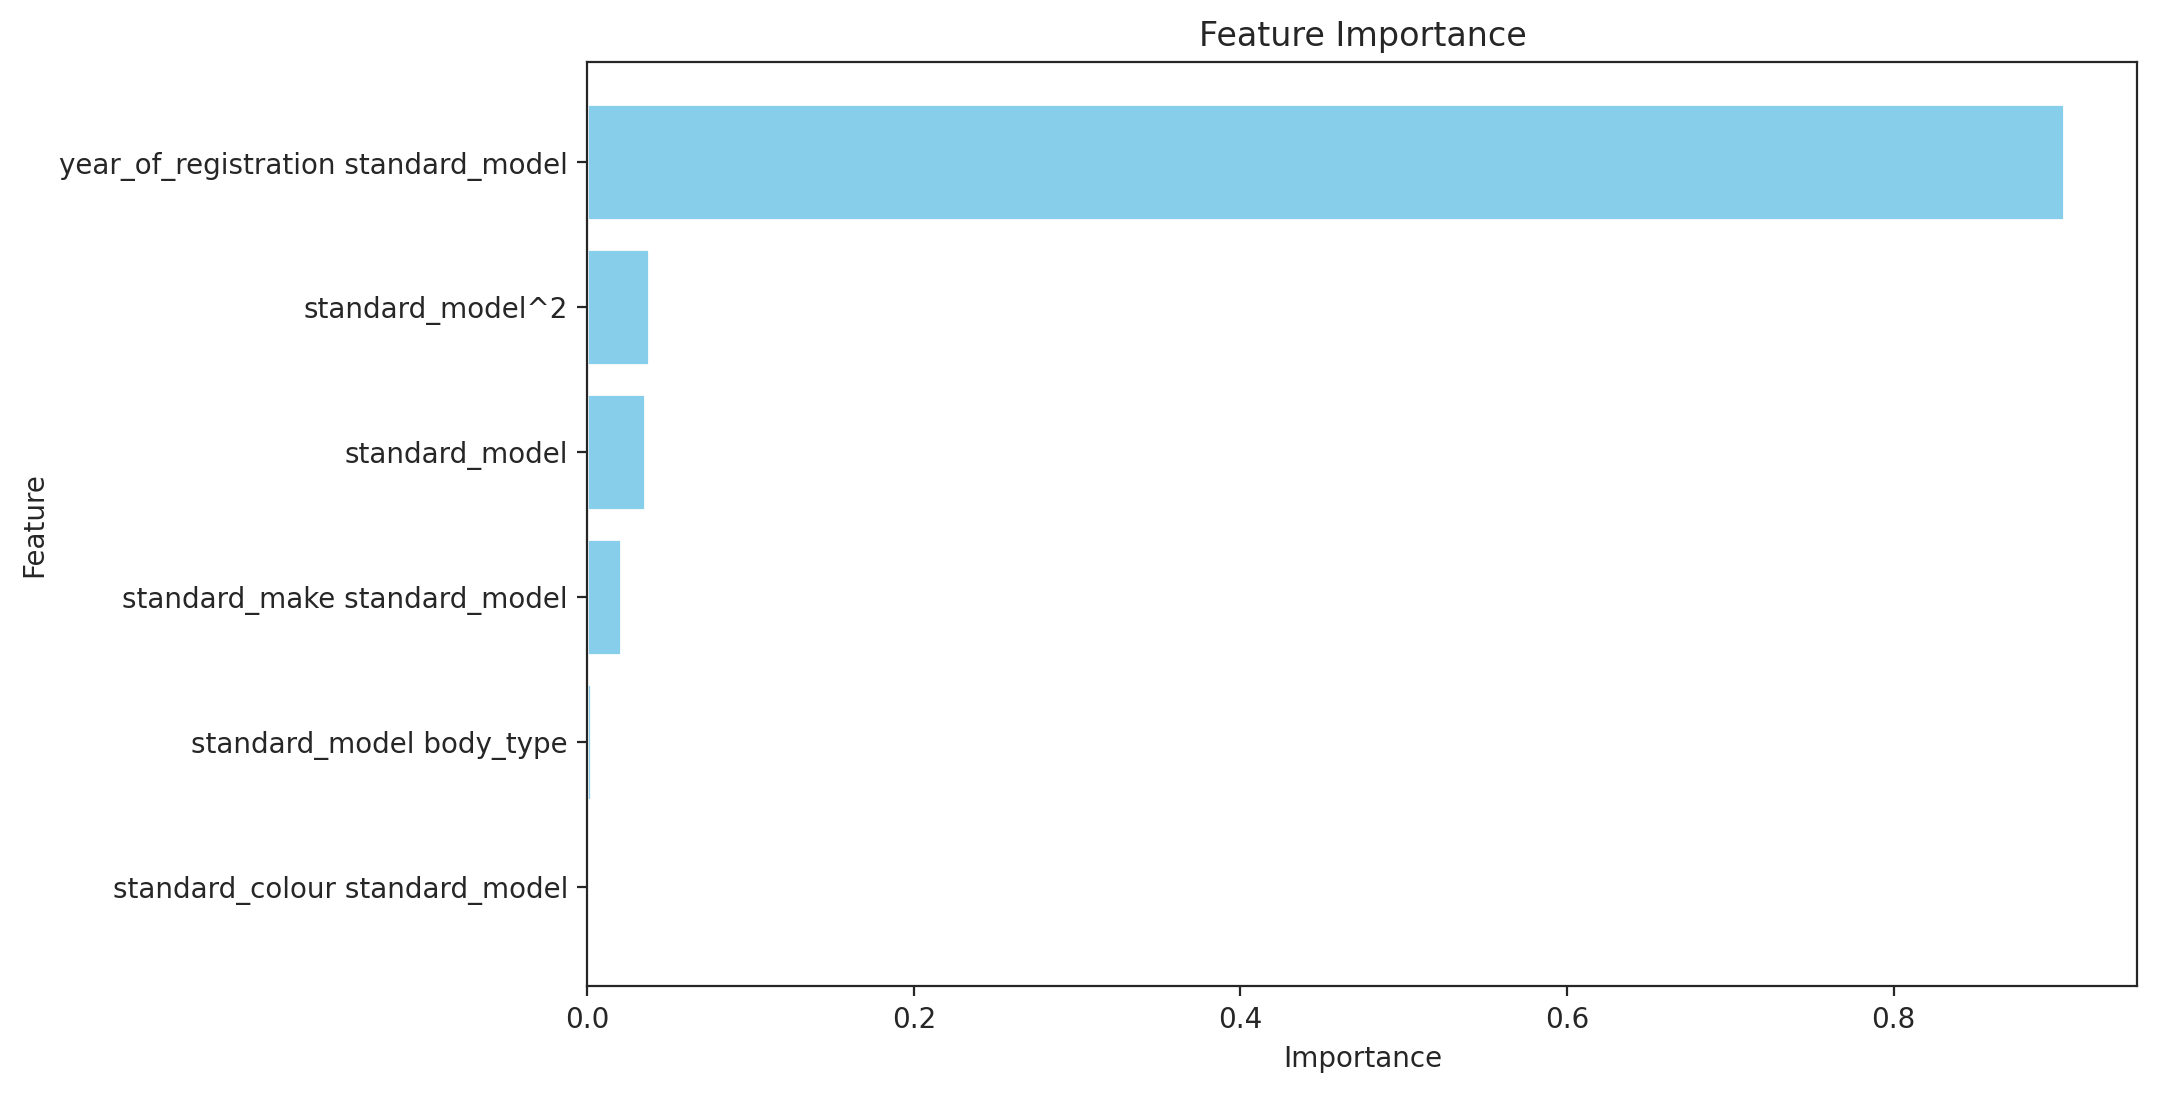

In [402]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()


In [403]:
feature_names = pd.DataFrame(X_train_selected_df).columns


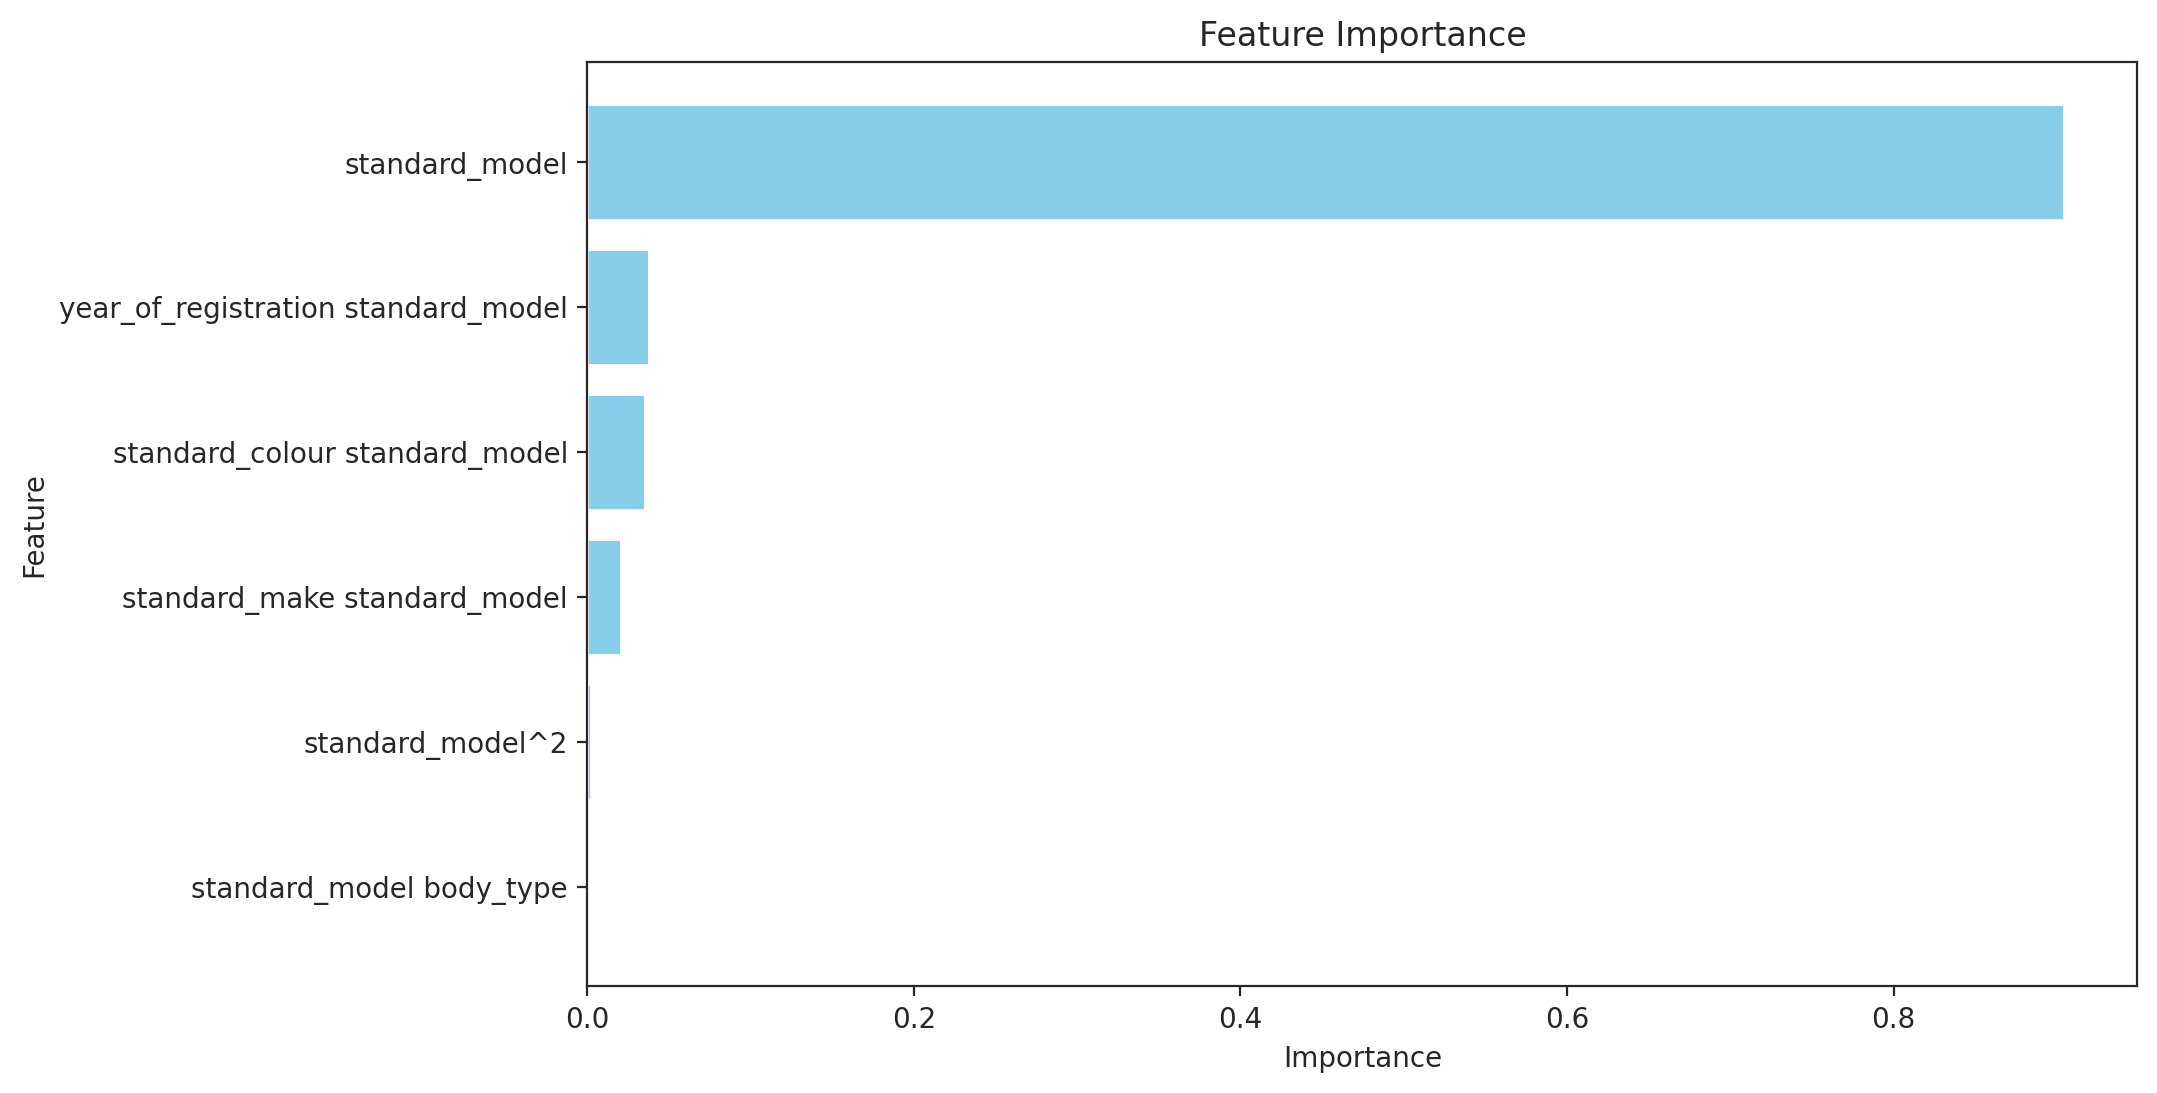

In [404]:
import matplotlib.pyplot as plt

# Get feature names


# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()


In [405]:
best_model_rf.score(X_test_selected_df,y_test)

0.8157178015949649

In [406]:
#residuals:

In [407]:
actual_value = y_test.iloc[6]
actual_value

5600

In [408]:
predicted_value = best_model_rf.predict(pd.DataFrame(X_test_selected_df).iloc[[6]])
predicted_value

array([4868.78708148])

In [409]:
predicted_value - actual_value

array([-731.21291852])

In [410]:
df['price'].describe()

count    359660.000000
mean      14824.774690
std       11980.515782
min         120.000000
25%        7299.000000
50%       11995.000000
75%       18500.000000
max       99999.000000
Name: price, dtype: float64

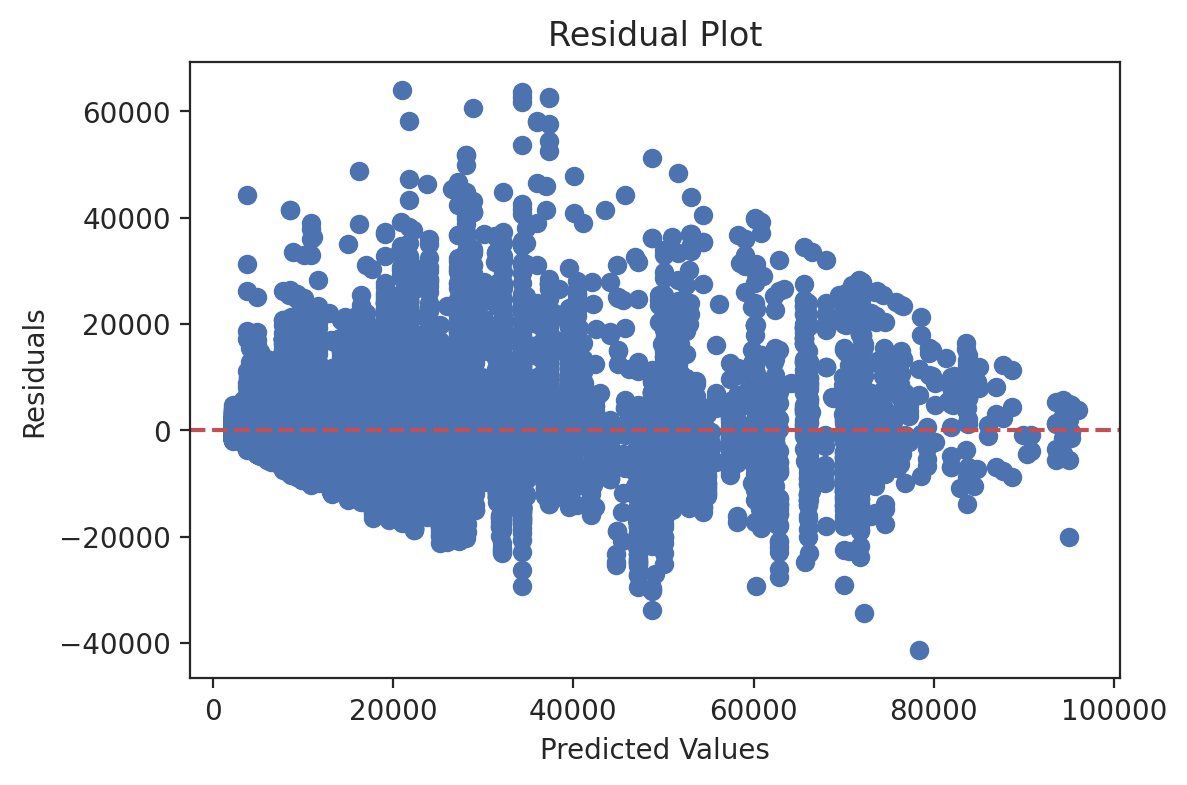

In [411]:
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [412]:
#Actual vs Predicted
from sklearn.metrics import PredictionErrorDisplay

Text(0.5, 1.0, 'True vs Predicted plot')

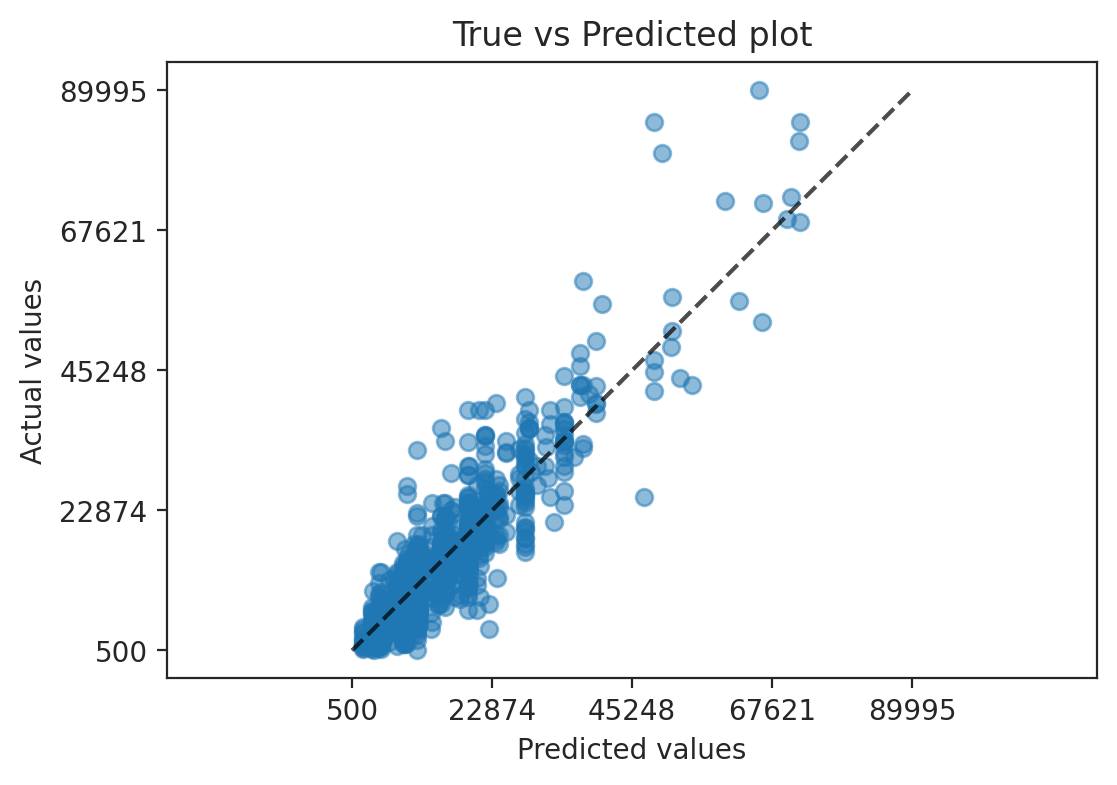

In [488]:
PredictionErrorDisplay.from_estimator(
    best_model_rf, X_test_selected_df, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5));

plt.title("True vs Predicted plot")
#plt.savefig("True vs predicted _ rf1")

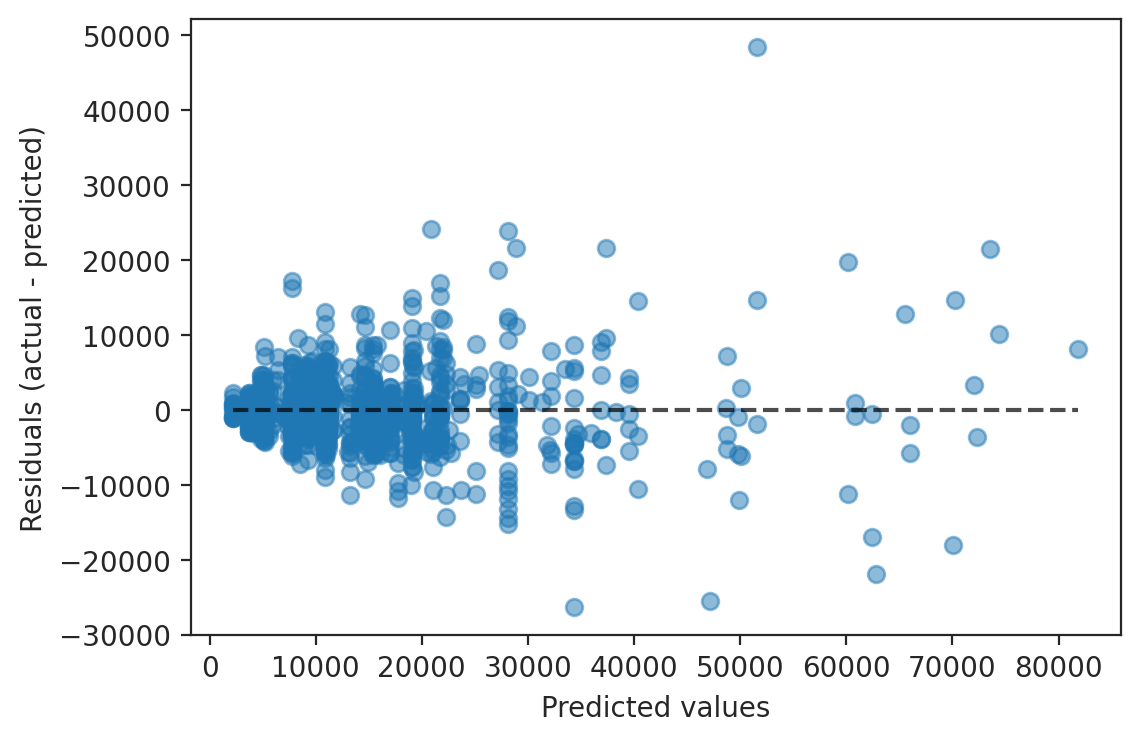

In [489]:
PredictionErrorDisplay.from_estimator(
    best_model_rf, X_test_selected_df, y_test, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

In [415]:
residuals = best_model_rf.predict(X_test_selected_df) - y_test


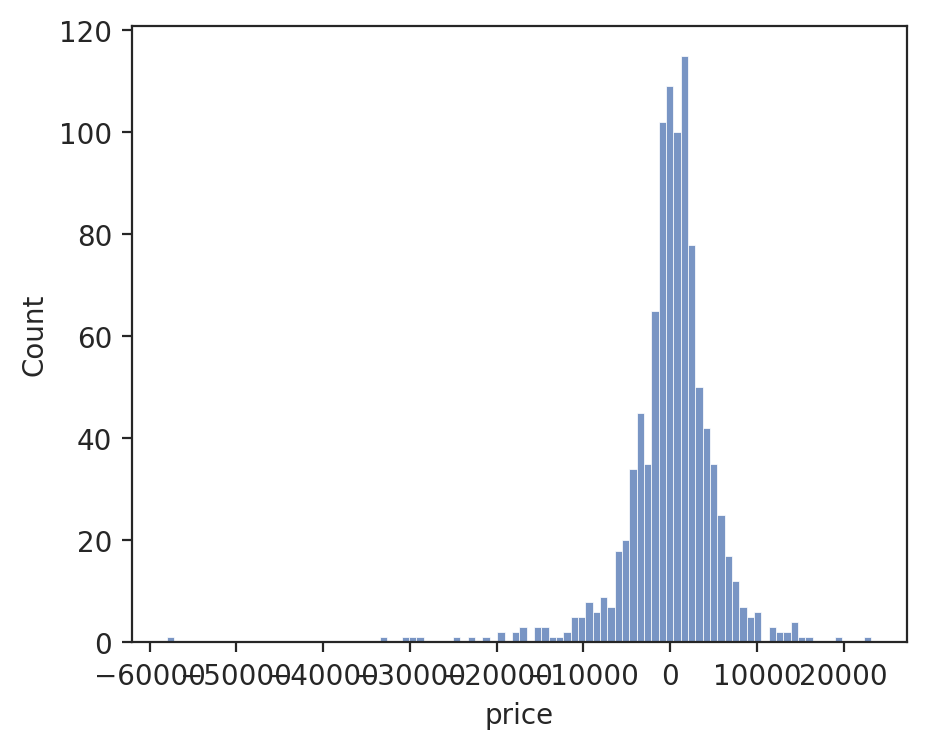

In [416]:
plt.figure(figsize= (5,4))

#residual plot for sample of 1000 points
sns.histplot(residuals.sample(1000));

**SHAP for Random Forest**

In [418]:
# SHAP is not normally part of a standard Python distribution
# I am installing it here by asking the underlying operating system to
# `pip install` the package (`-q` for a quiet output)
!pip install --upgrade -q shap
import shap
shap.initjs()

In [419]:
# Extract the RandomForestRegressor from the pipeline
best_rf_regressor = best_model_rf.named_steps['regressor']

best_rf_regressor


RandomForestRegressor(max_depth=7, n_estimators=7, random_state=2)

In [420]:
explainer = shap.TreeExplainer(best_rf_regressor, X_train_selected_df)

explainer

In [421]:
shap_values = explainer(X_test_selected_df)

 97%|=================== | 70004/71932 [00:40<00:01]       

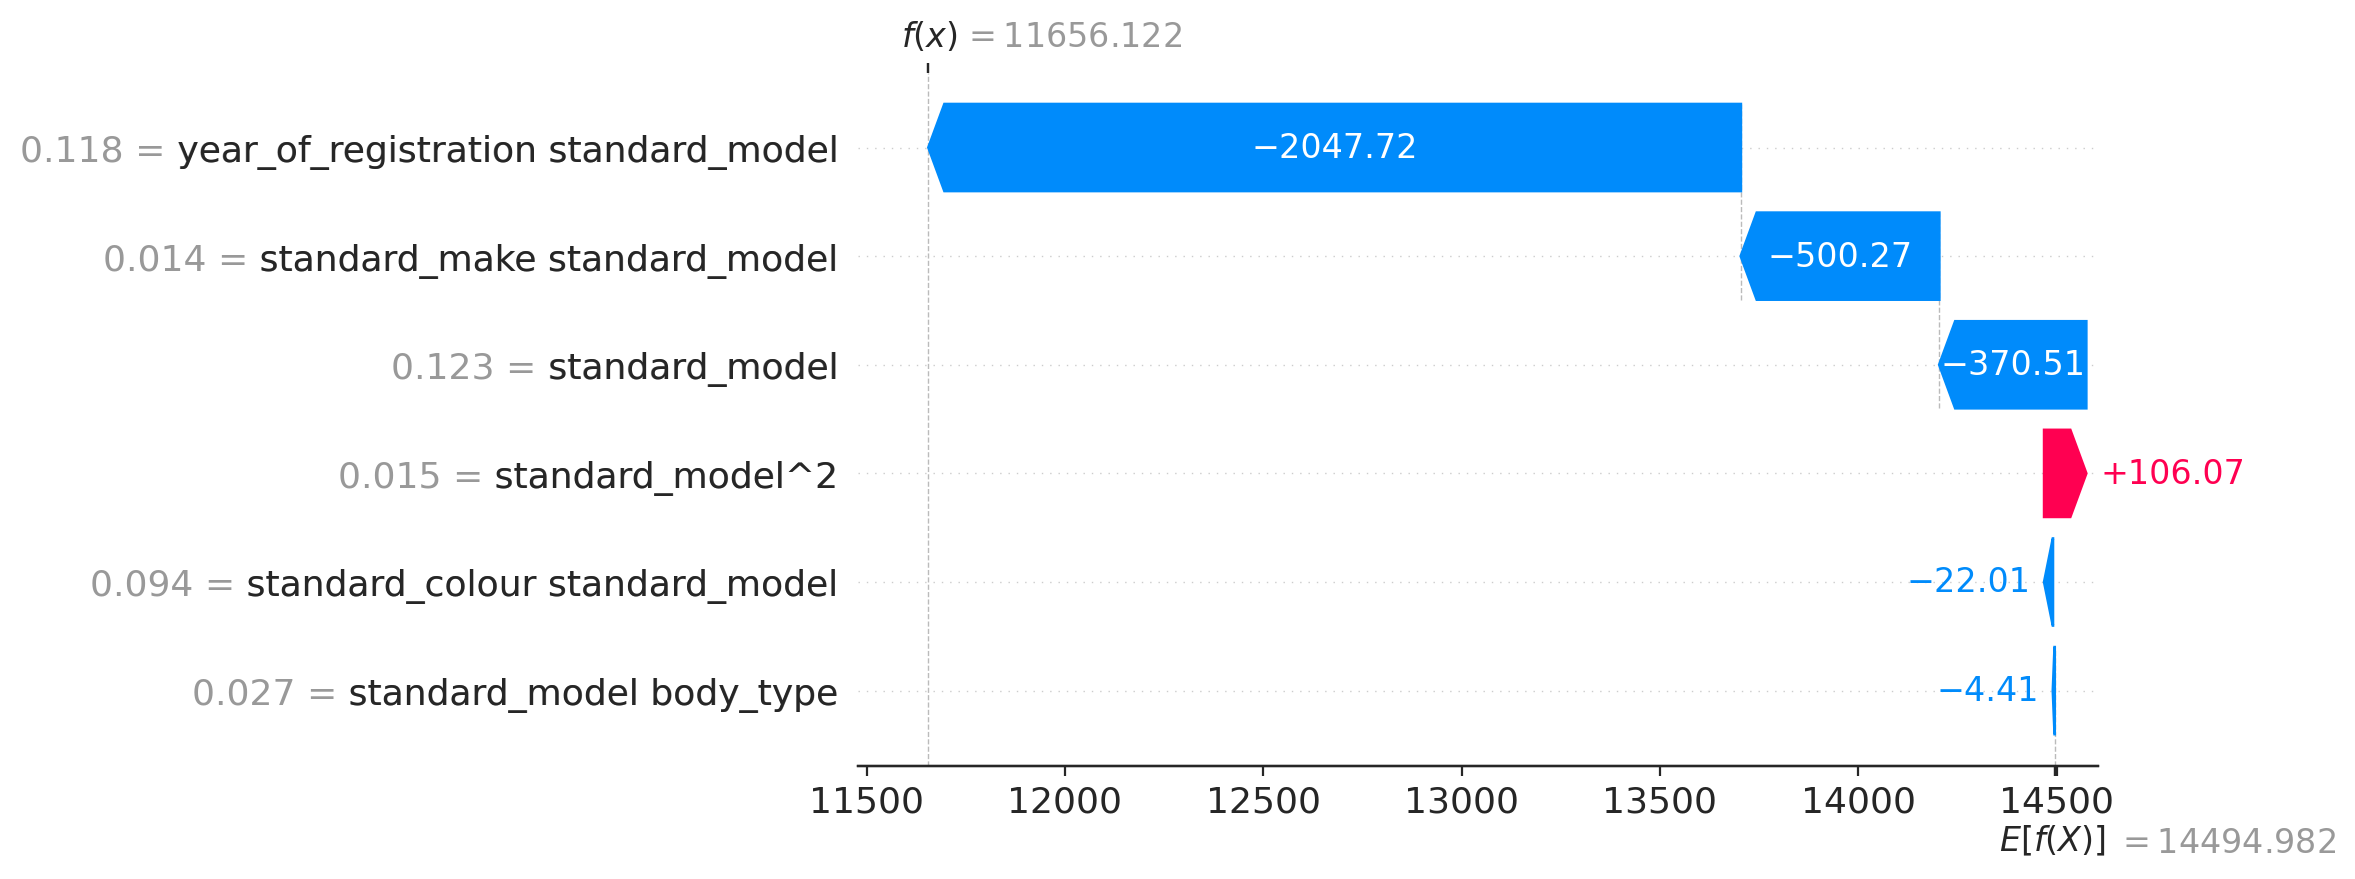

<Figure size 600x400 with 0 Axes>

In [422]:
# for a random instance
shap.plots.waterfall(shap_values[0])
plt.savefig("local shap rf"

)


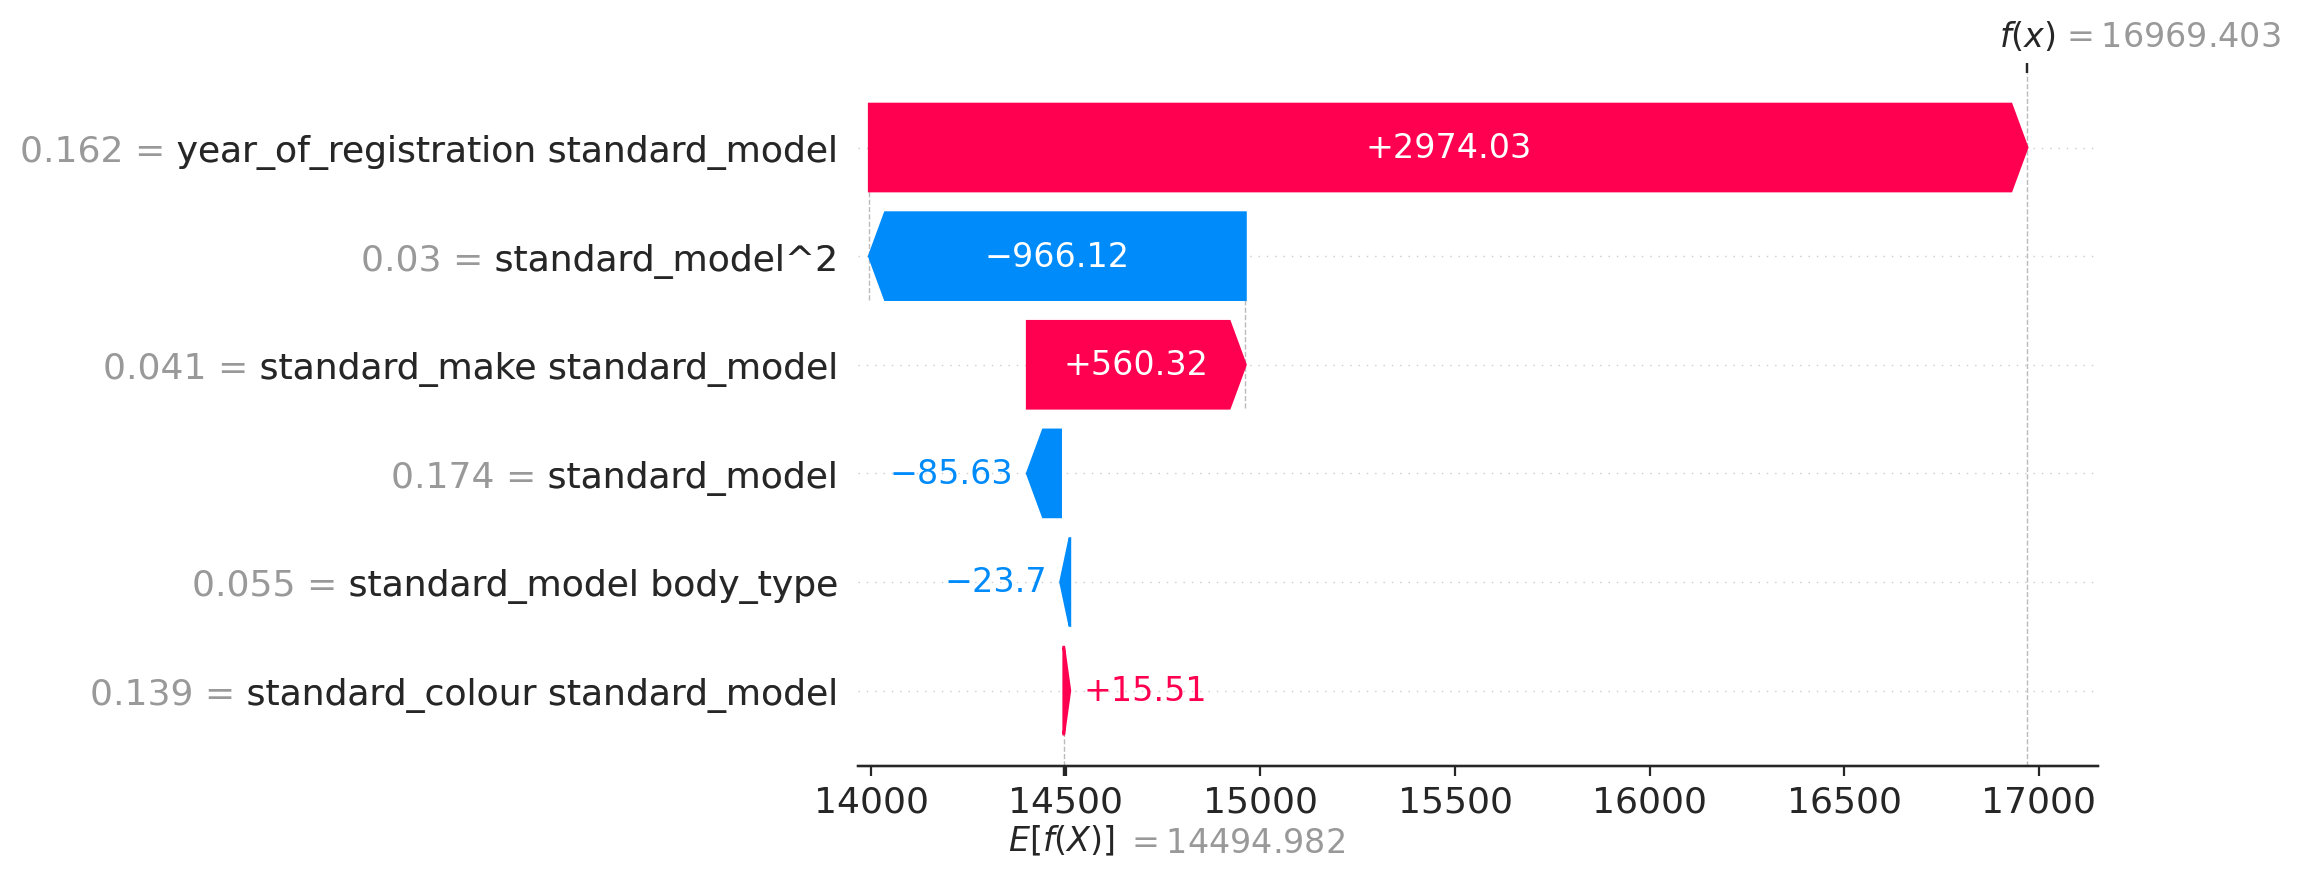

<Figure size 600x400 with 0 Axes>

In [423]:

shap.waterfall_plot(shap_values[1])
plt.savefig("local")

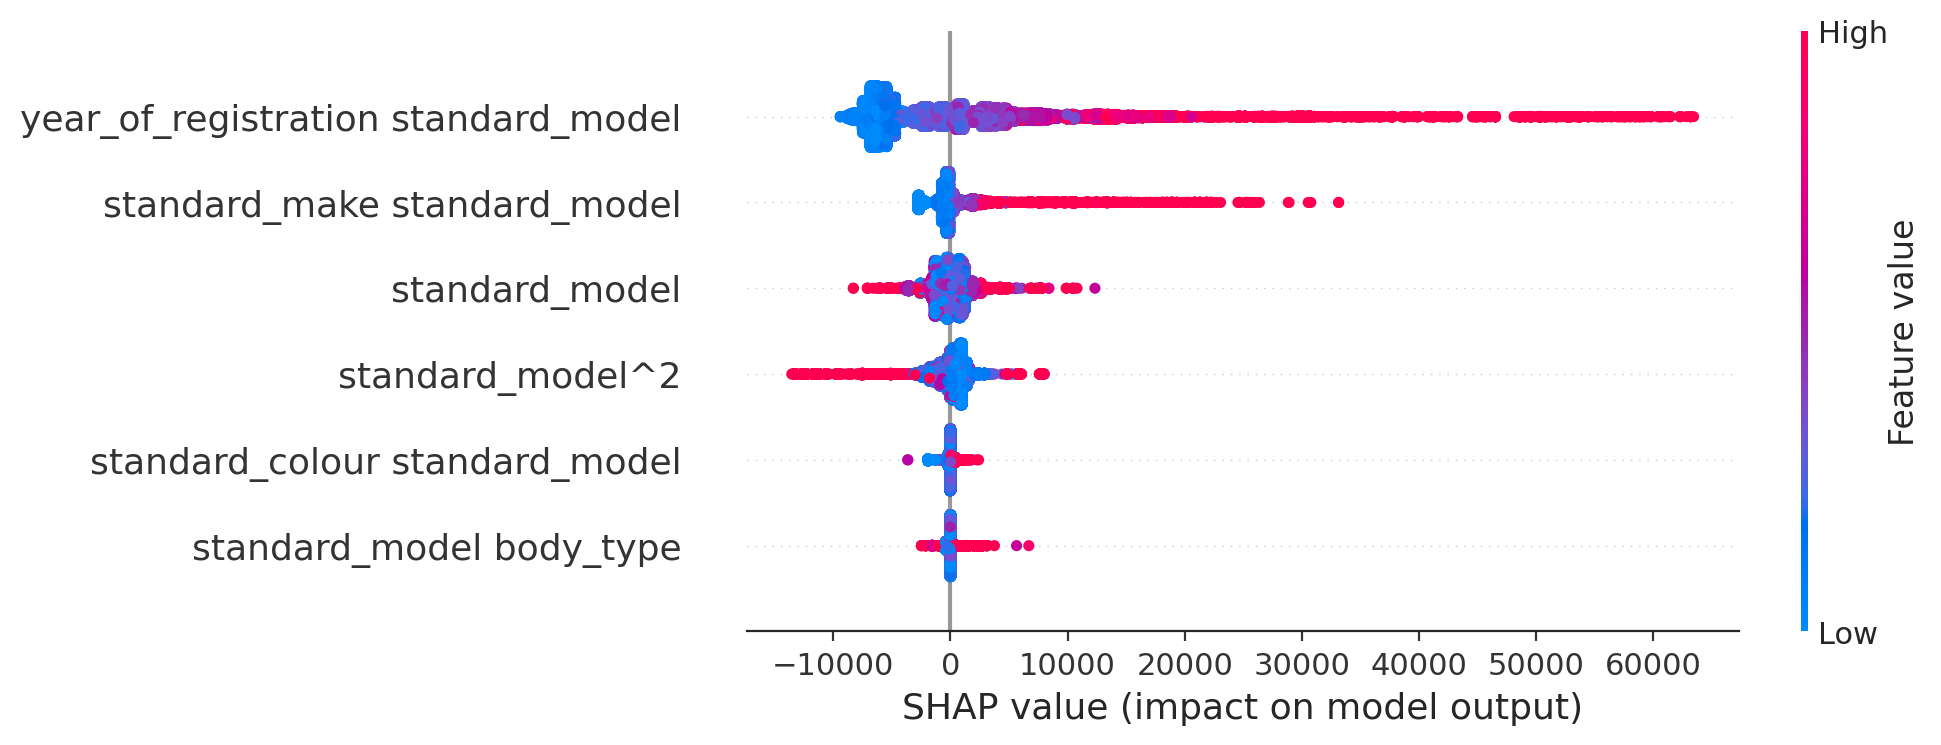

<Figure size 600x400 with 0 Axes>

In [424]:
# global model
shap.plots.beeswarm(shap_values)
plt.savefig("global_shap_rf")

# Linear Regression

In [425]:
#linear regressor
lr = LinearRegression(fit_intercept = True)
lr.fit(X_train_selected_df,y_train)

LinearRegression()

In [426]:
mean_absolute_error(y_test, lr.predict(X_test_selected_df))

3651.3456076431335

In [427]:
lr.score(X_test_selected_df, y_test)

0.7573938100861729

In [428]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error

# Create a pipeline with Linear Regression
pipeline_lr = Pipeline(steps=[
    ('regressor', LinearRegression())
])

# Define parameters for GridSearchCV
param_grid_lr = {
    'regressor__fit_intercept': [True, False]
}
# Perform GridSearchCV with cross-validation
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=KFold(n_splits=5), scoring='neg_mean_absolute_error')

# Fit the GridSearchCV to find the best model
grid_search_lr.fit(X_train_selected_df, y_train)

# Get the best model
best_model_lr = grid_search_lr.best_estimator_

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search_lr.best_params_)

# Predict on the whole dataset using the best model
y_pred_train_lr = best_model_lr.predict(X_train_selected_df)
y_pred_test_lr = best_model_lr.predict(X_test_selected_df)

# Evaluate the model performance
train_mae_lr = mean_absolute_error(y_train, y_pred_train_lr)
test_mae_lr = mean_absolute_error(y_test, y_pred_test_lr)

print(f"Train MAE: {train_mae_lr}")
print(f"Test MAE: {test_mae_lr}")

# Cross-validated score
cv_scores_lr = cross_val_score(best_model_lr, X_test_selected_df, y_test, scoring='neg_mean_absolute_error')
cv_mean_mae_lr = -1 * cv_scores_lr.mean()
cv_std_mae_lr = cv_scores_lr.std()

print(f"Cross-Validated MAE: {cv_mean_mae_lr} +/- {cv_std_mae_lr}")


Best Parameters: {'regressor__fit_intercept': True}
Train MAE: 3671.856799841772
Test MAE: 3651.3456076431335
Cross-Validated MAE: 3576.954432174824 +/- 25.13210714048551


Best Parameters: {'regressor__fit_intercept': True}
Train MAE: 3671.856799841772
Test MAE: 3651.3456076431335
Cross-Validated MAE: 3576.954432174824 +/- 25.13210714048551

In [429]:
#Feature Importance
#Linear Regression doesn't inherently provide feature importance. It weighs coefficients against features. we can analyze coefficients directly.
#python


coefficients = best_model_lr.named_steps['regressor'].coef_

print(coefficients)
# Visualize coefficients or discuss their significance


[-278540.37248577  362032.34046309    5310.12183553   82788.83870714
  -16533.01140513   12147.29630197]


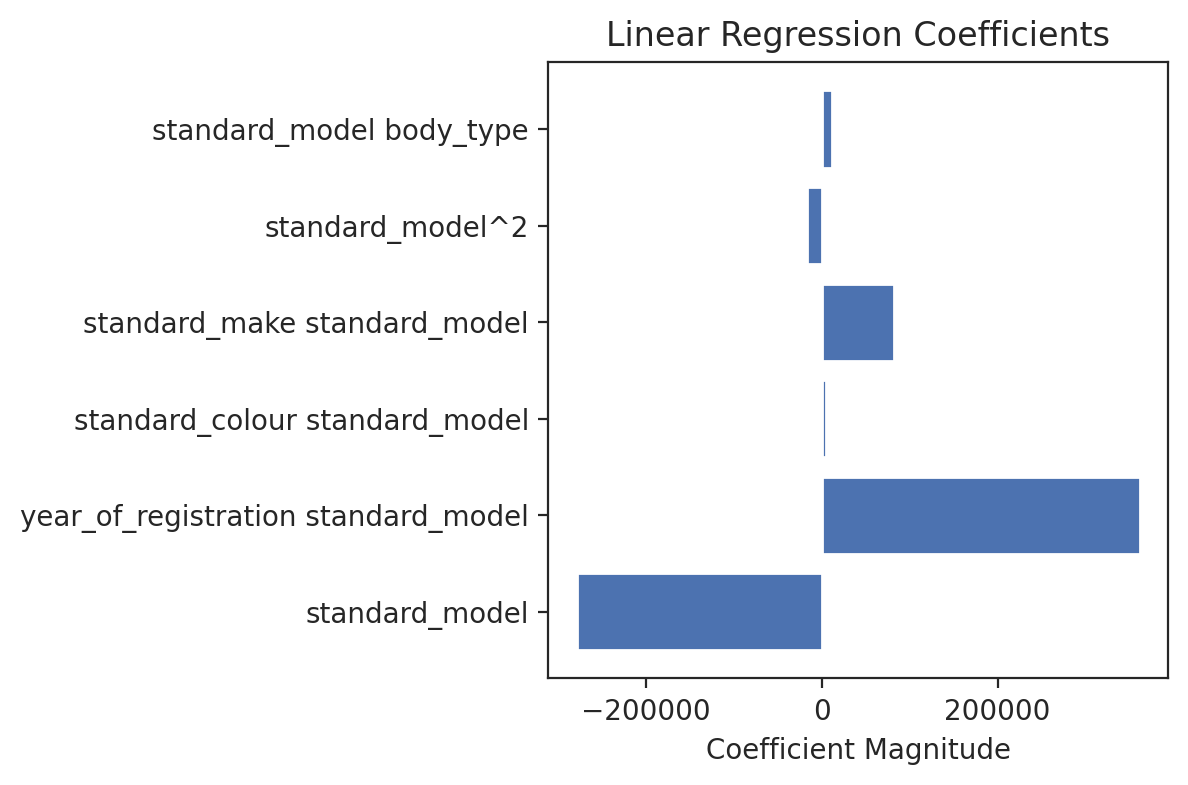

In [430]:

# Get feature names
feature_names = X_train_selected_df.columns

# Plotting
plt.figure(figsize=(4, 4))

plt.barh(feature_names, coefficients)

plt.xlabel('Coefficient Magnitude')
plt.title('Linear Regression Coefficients')
plt.show()


In [431]:
best_model_lr.score(X_test_selected_df, y_test)

0.7573938100861729

In [432]:
#Instance-Level Errors Analysis
#residuals:

y_test.iloc[5]

24000

In [433]:
best_model_lr.predict(pd.DataFrame(X_test_selected_df).iloc[[5]])

array([19762.80863252])

In [434]:
#Actual vs predicted

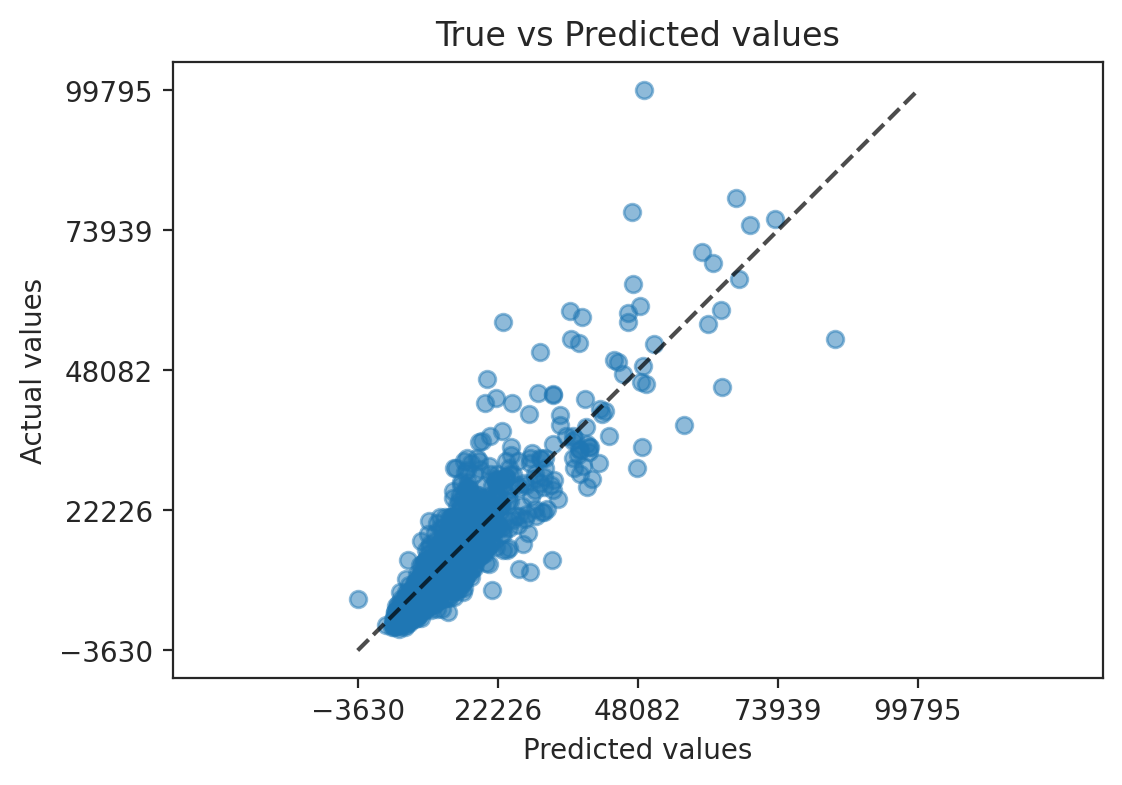

In [435]:
PredictionErrorDisplay.from_estimator(
    best_model_lr, X_test_selected_df, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5));

plt.title("True vs Predicted values")
plt.savefig('true_vs_predicted_lr.png')

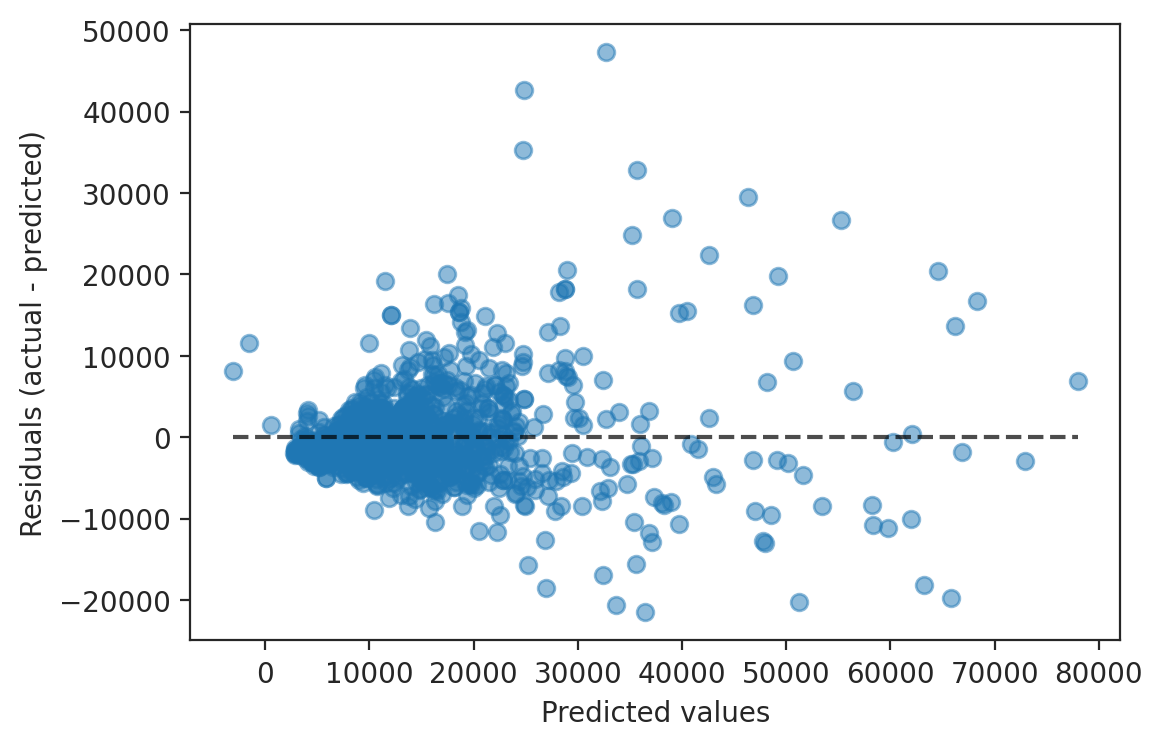

In [436]:
PredictionErrorDisplay.from_estimator(
    best_model_lr, X_test_selected_df, y_test, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

In [437]:
residuals = best_model_rf.predict(X_test_selected_df) - y_test

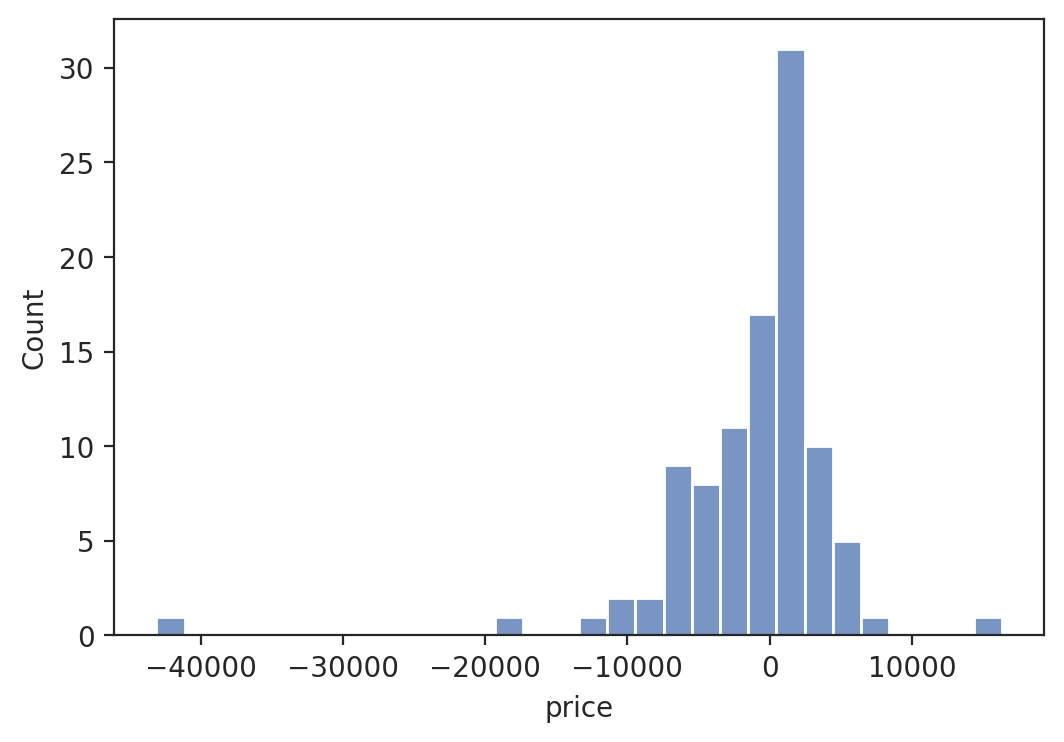

In [438]:
sns.histplot(residuals.sample(100));

**SHAP for Linear Regression model**

In [439]:
#inspecting with shap

In [440]:
# Extract the linearRegressor from the pipeline
best_lr_regressor = best_model_lr.named_steps['regressor']

In [441]:
explainer = shap.LinearExplainer(best_lr_regressor, X_train_selected_df)

In [442]:
shap_values = explainer(X_test_selected_df)

In [443]:
# these are the SHAP values themselves that we can always use as a dataset
shap_values.values

array([[ 7.08446088e+03, -7.85291369e+03, -1.23387867e+02,
        -8.31385616e+02,  2.55220316e+02, -1.54407050e+02],
       [-7.15078665e+03,  8.05155190e+03,  1.18228813e+02,
         1.38506881e+03,  3.54454349e+00,  1.87831880e+02],
       [ 1.49536735e+04, -1.66586112e+04, -3.58629089e+02,
        -1.25073538e+03,  3.57279163e+02, -4.77488229e+02],
       ...,
       [-1.07246923e+05,  1.34380436e+05,  1.53440478e+03,
         7.02913287e+03, -4.20483154e+03,  2.08201191e+03],
       [ 1.21580729e+04, -1.47085993e+04, -1.03724426e+02,
        -1.00258729e+03,  3.24044456e+02,  2.67082773e+01],
       [ 3.10491421e+03, -2.90217983e+03,  1.09329649e+02,
         7.56042625e+01,  1.93559985e+02,  4.74362269e+01]])

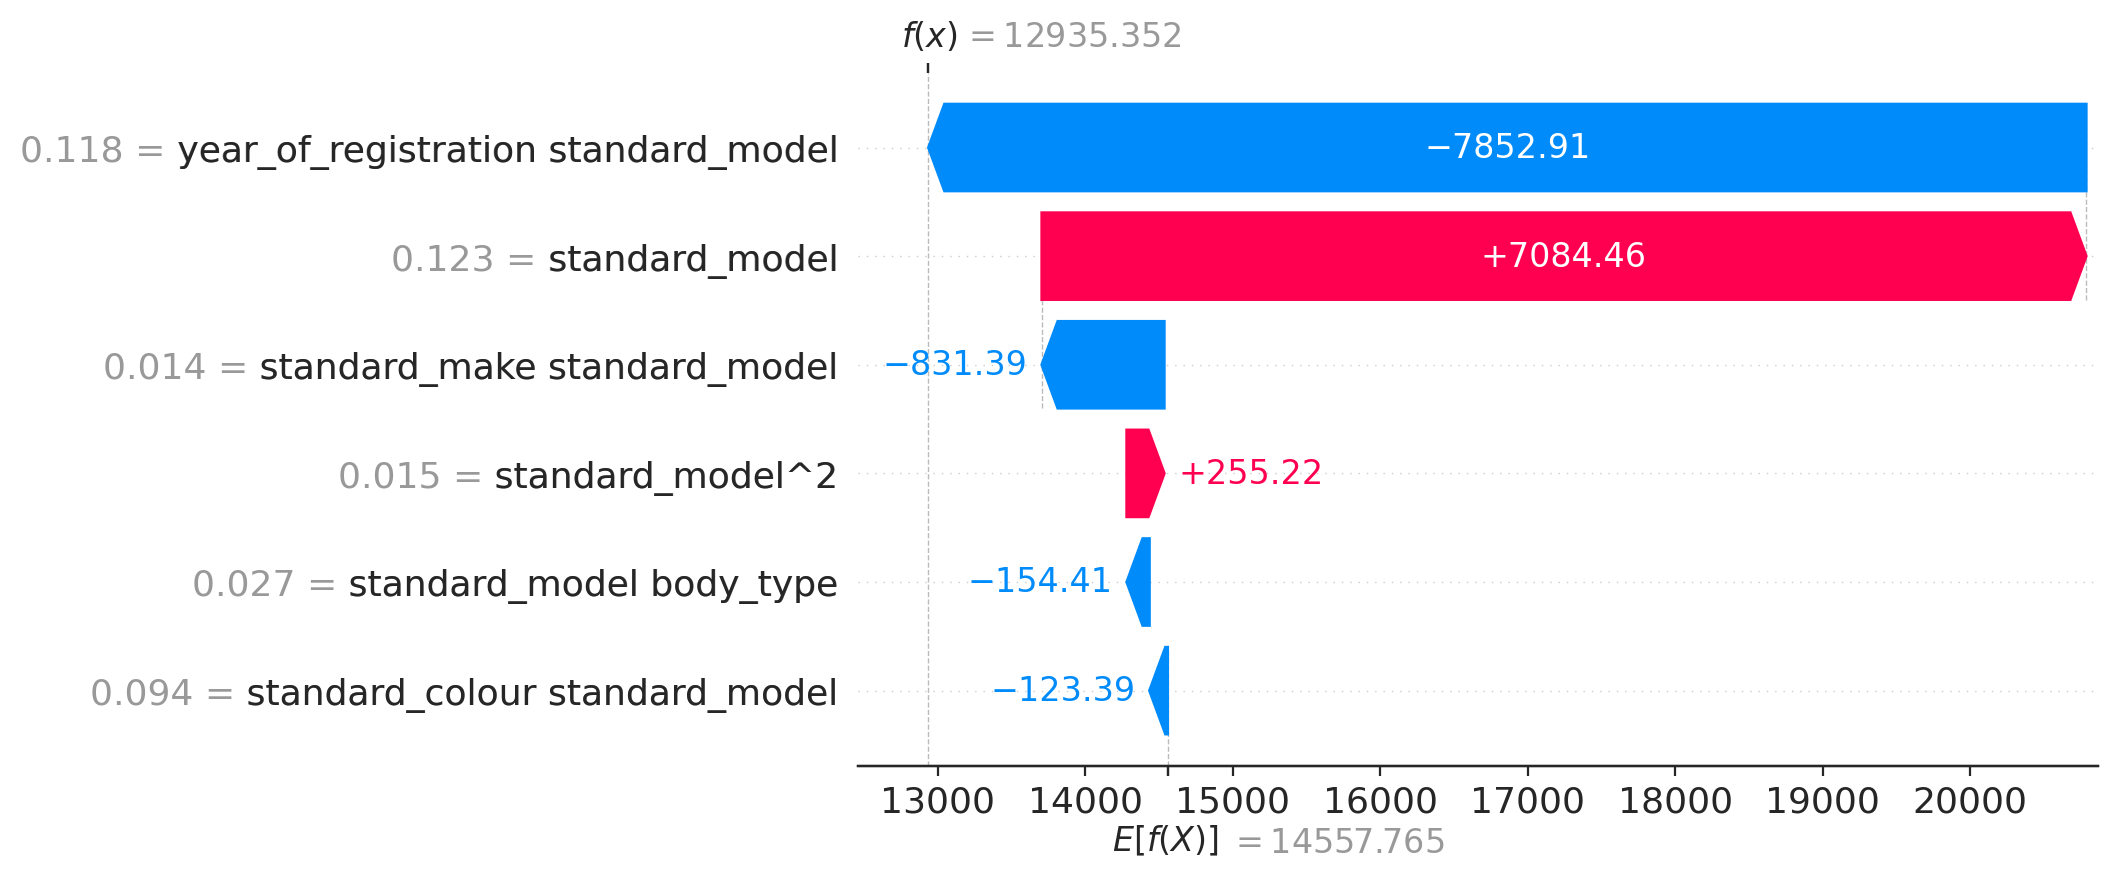

In [444]:
# for a random instance
shap.plots.waterfall(shap_values[0])

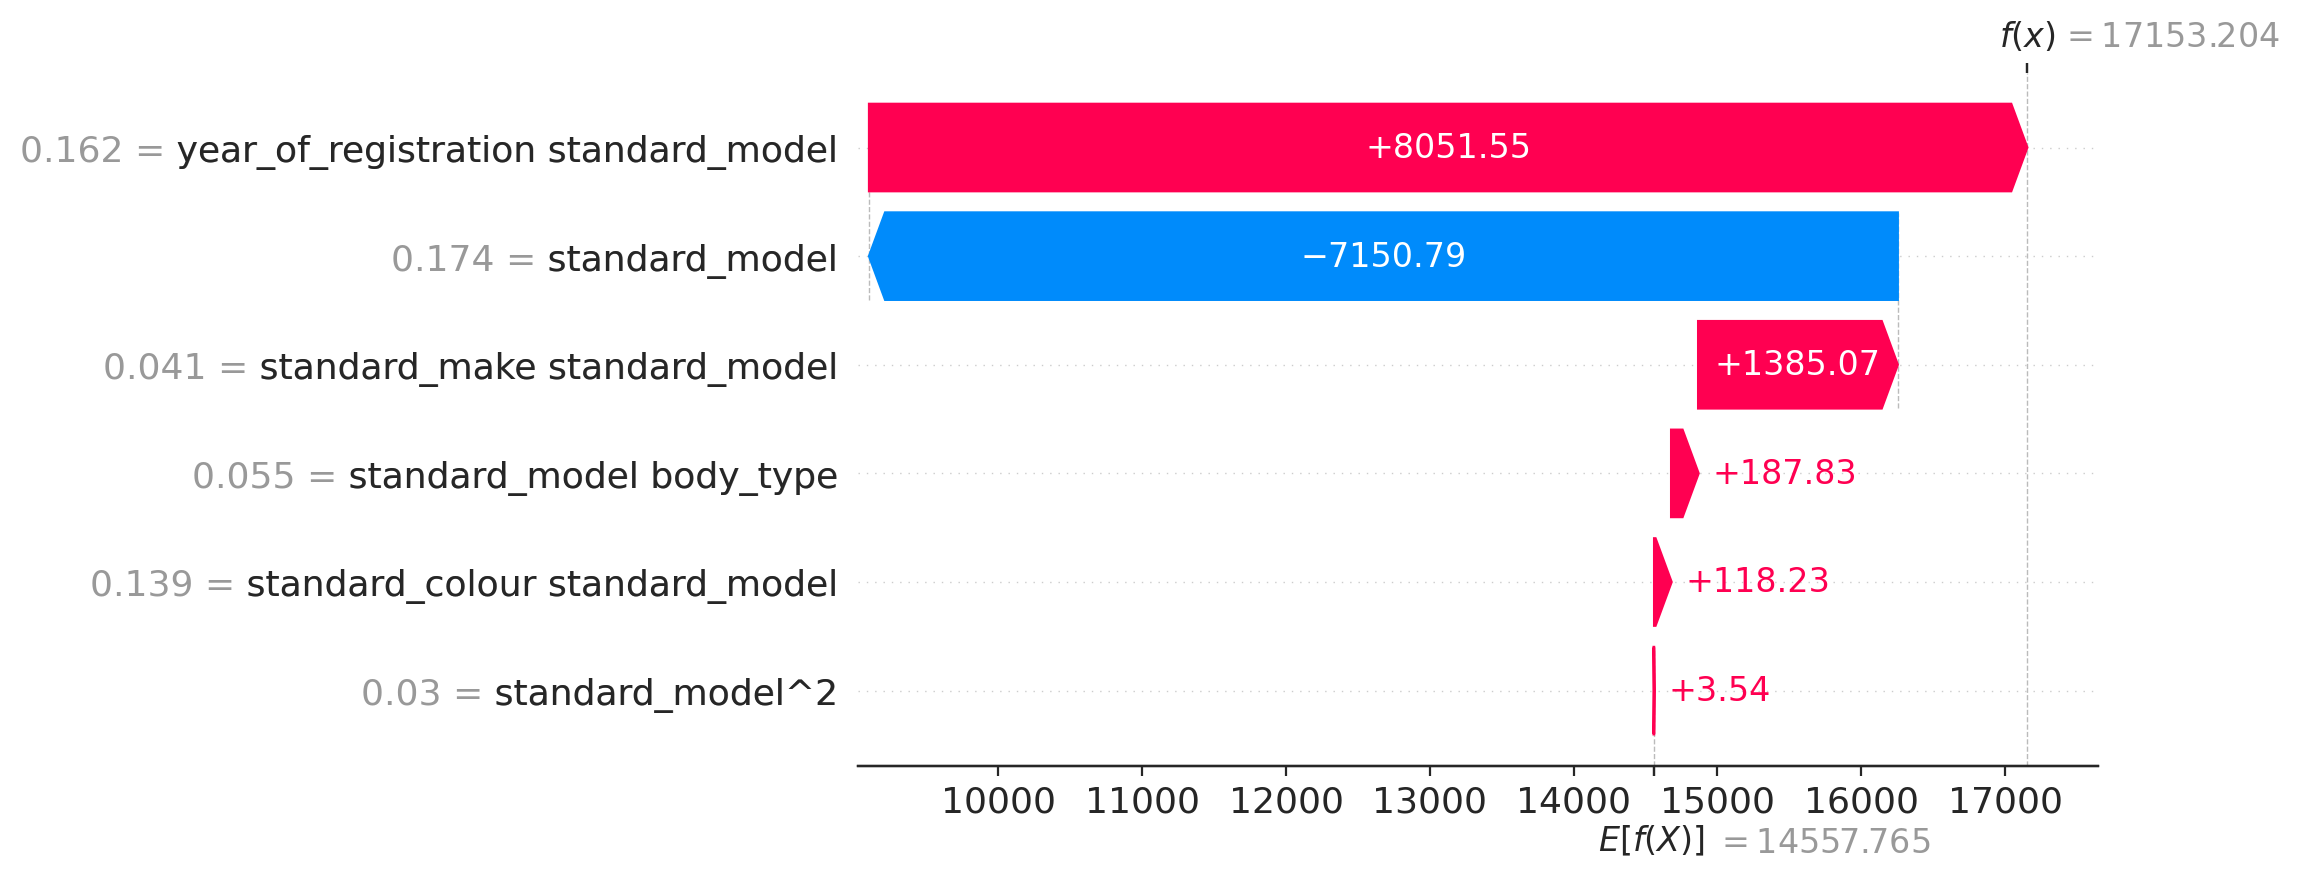

In [445]:
shap.waterfall_plot(shap_values[1])

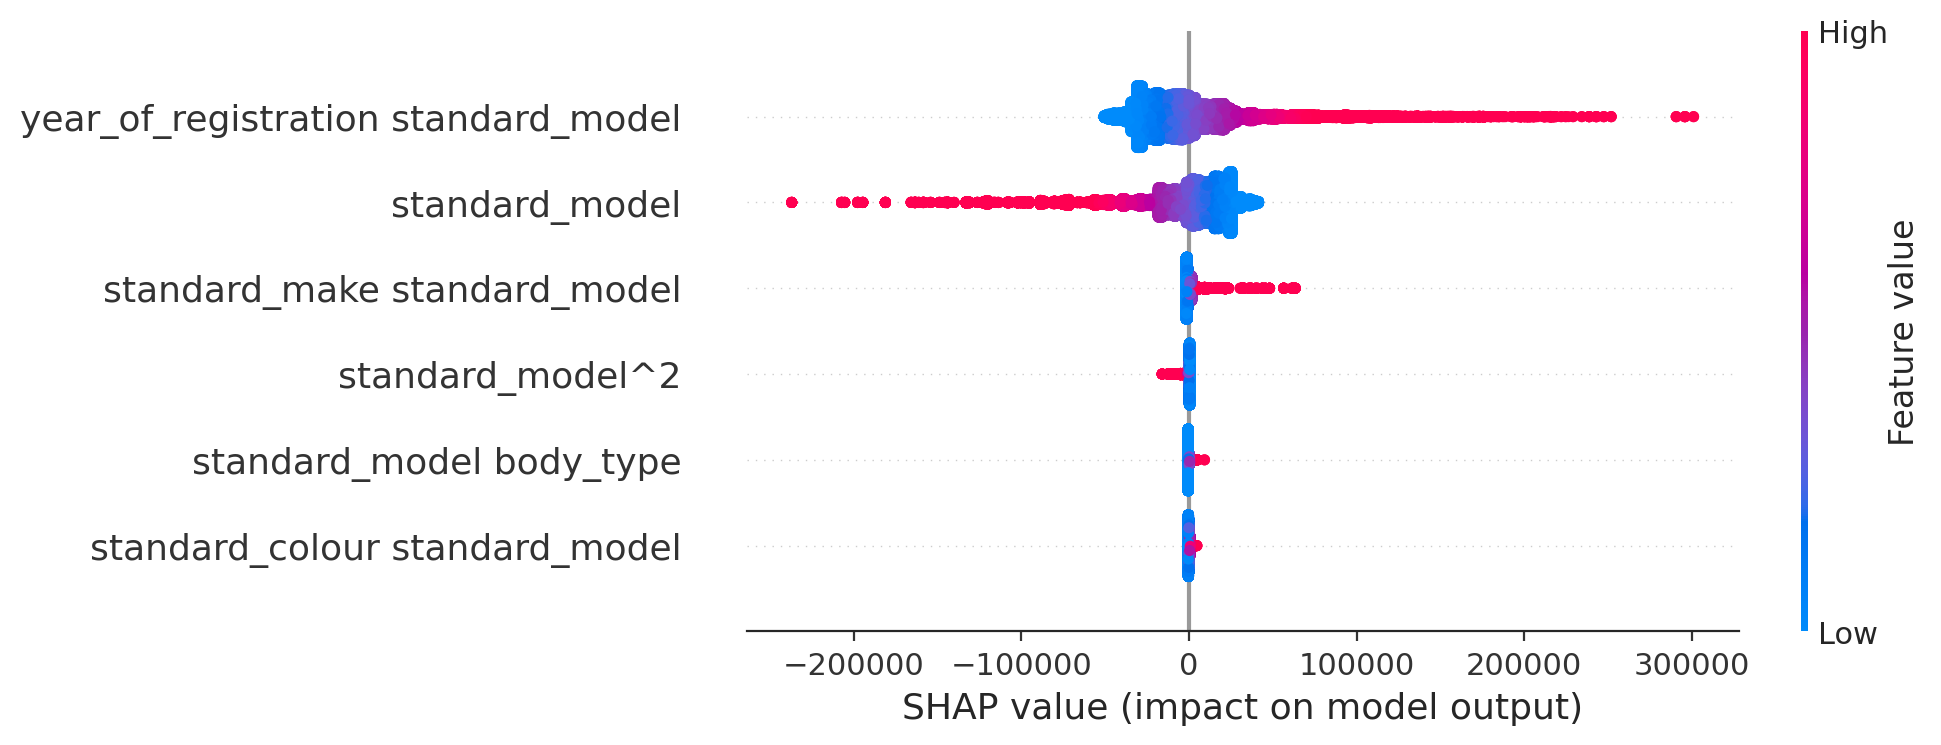

In [446]:
# global model
shap.plots.beeswarm(shap_values)

# Gradient Boosting Regressor

In [447]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error


In [448]:
#gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators =5, learning_rate =0.2,max_depth = 6,random_state=2)
gbr.fit(X_train_selected_df,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, n_estimators=5,
                          random_state=2)

In [449]:
mean_absolute_error(y_test,gbr.predict(X_test_selected_df))

4288.4759732895545

In [450]:
gbr.score(X_test_selected_df,y_test)

0.7108339413625423

In [451]:

# Create a pipeline with Gradient Boosting Regressor
pipeline_gb = Pipeline(steps=[
    ('regressor', GradientBoostingRegressor(random_state=2))
])

# Define parameters for GridSearchCV
param_grid_gb = {
    'regressor__n_estimators': [5,7,3],  # Number of trees
    'regressor__learning_rate': [0.05, 0.1, 0.2],  # Step size shrinkage
    'regressor__max_depth': [3, 4, 5],  # Maximum depth of the individual estimators
}
# Perform GridSearchCV with cross-validation
grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=KFold(n_splits=5), scoring='neg_mean_absolute_error')

# Fit the GridSearchCV to find the best model
grid_search_gb.fit(X_train_selected_df, y_train)

# Get the best model
best_model_gb = grid_search_gb.best_estimator_

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search_gb.best_params_)

# Predict on the whole dataset using the best model
y_pred_train_gb = best_model_gb.predict(X_train_selected_df)
y_pred_test_gb = best_model_gb.predict(X_test_selected_df)

# Evaluate the model performance
train_mae_gb = mean_absolute_error(y_train, y_pred_train_gb)
test_mae_gb = mean_absolute_error(y_test, y_pred_test_gb)

print(f"Train MAE: {train_mae_gb}")
print(f"Test MAE: {test_mae_gb}")

# Cross-validated score
cv_scores_gb = cross_val_score(best_model_gb, X_test_selected_df, y_test, scoring='neg_mean_absolute_error')
cv_mean_mae_gb = -1 * cv_scores_gb.mean()
cv_std_mae_gb = cv_scores_gb.std()

print(f"Cross-Validated MAE: {cv_mean_mae_gb} +/- {cv_std_mae_gb}")


Best Parameters: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 5, 'regressor__n_estimators': 7}
Train MAE: 4031.7101278596333
Test MAE: 4037.9944572929166
Cross-Validated MAE: 4015.184517713059 +/- 33.26296552701654


Best Parameters: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 5, 'regressor__n_estimators': 7}
Train MAE: 4031.710127859577
Test MAE: 4037.994457292859
Cross-Validated MAE: 4015.2283726307114 +/- 33.27356023932707

In [452]:
best_model_gb.score(X_test_selected_df, y_test)

0.7388467360771569

In [453]:
#Instance-Level Errors Analysis
#residuals:

y_test.iloc[5]

24000

In [454]:
best_model_gb.predict(pd.DataFrame(X_test_selected_df).iloc[[5]])

array([18577.68406232])

In [455]:
#Actual vs Predicted

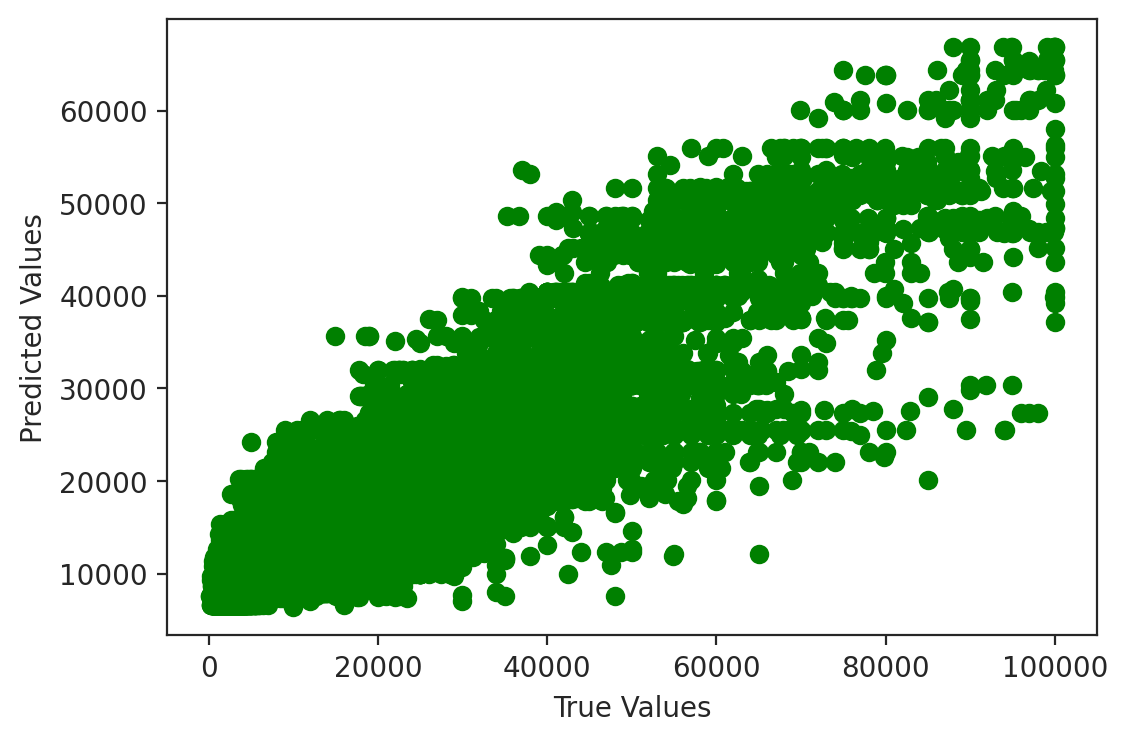

In [456]:
# Scatter plot for Gradient Boosting Regressor
plt.scatter( y_test,gbr.predict(X_test_selected_df), color='green')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

<Figure size 300x200 with 0 Axes>

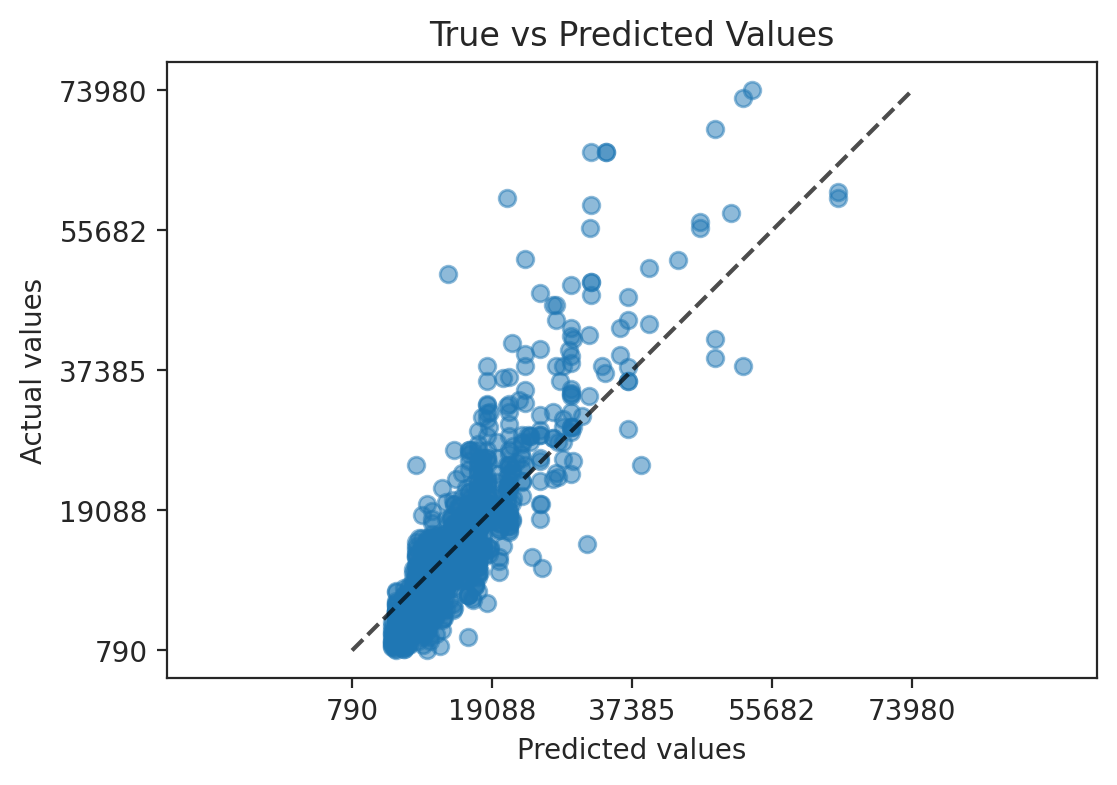

In [457]:
plt.figure(figsize=(3,2))
PredictionErrorDisplay.from_estimator(
    best_model_gb, X_test_selected_df, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5));

plt.title('True vs Predicted Values')
#plt.savefig('true_vs_predicted_gbr.png')
plt.show();



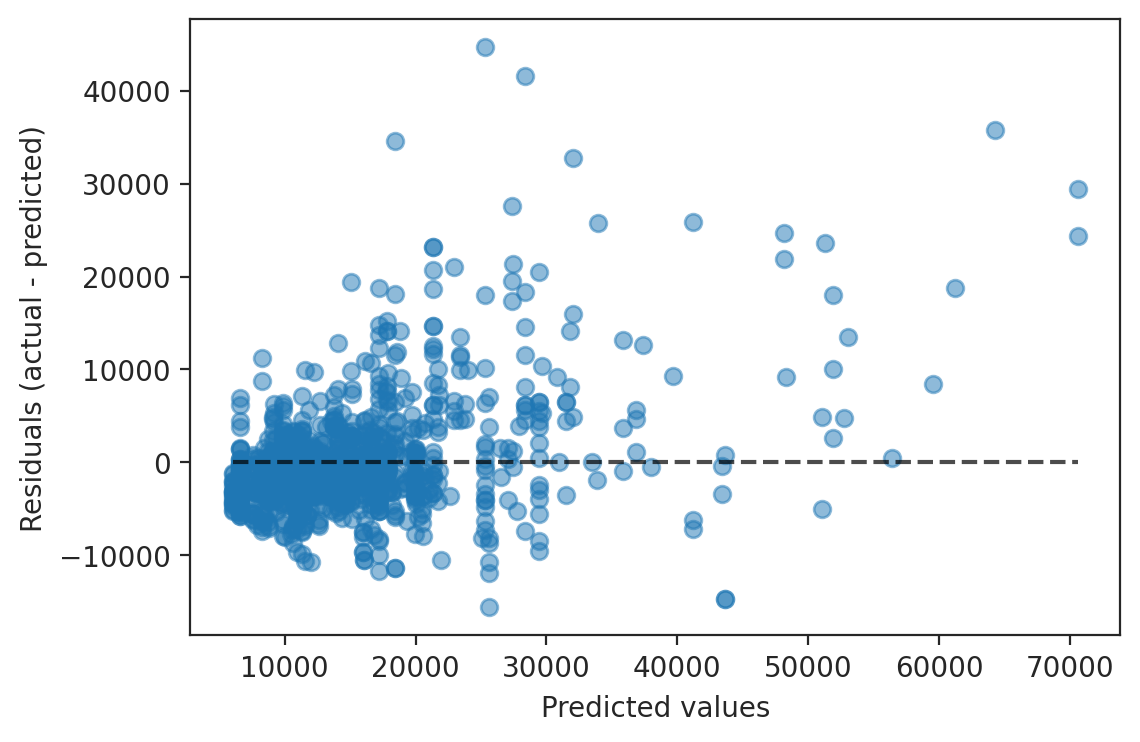

In [458]:
PredictionErrorDisplay.from_estimator(
    best_model_gb, X_test_selected_df, y_test, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

In [459]:
residuals = best_model_gb.predict(X_test_selected_df) - y_test

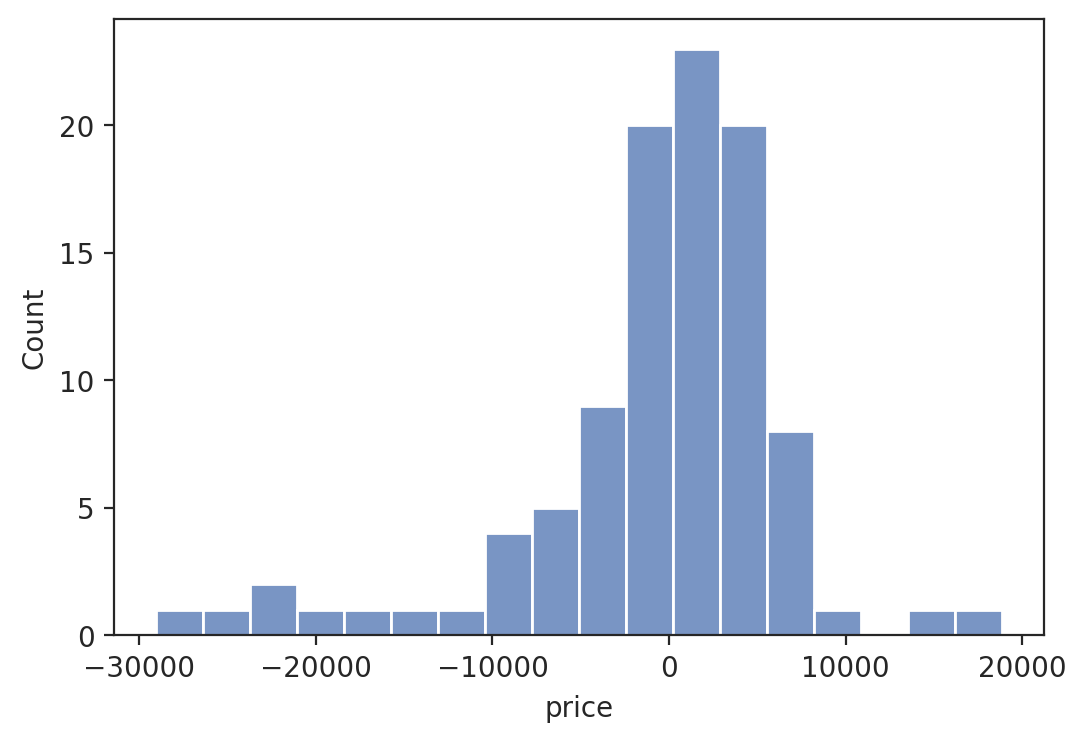

In [460]:
sns.histplot(residuals.sample(100));

**SHAP of Gradient Boosting Regressor**

In [461]:
# Extract the linearRegressor from the pipeline
best_gb_regressor = best_model_gb.named_steps['regressor']

In [462]:

explainer = shap.TreeExplainer(best_gb_regressor, X_train_selected_df)



In [463]:
shap_values = explainer(X_test_selected_df)

 95%|=================== | 68457/71932 [00:11<00:00]       

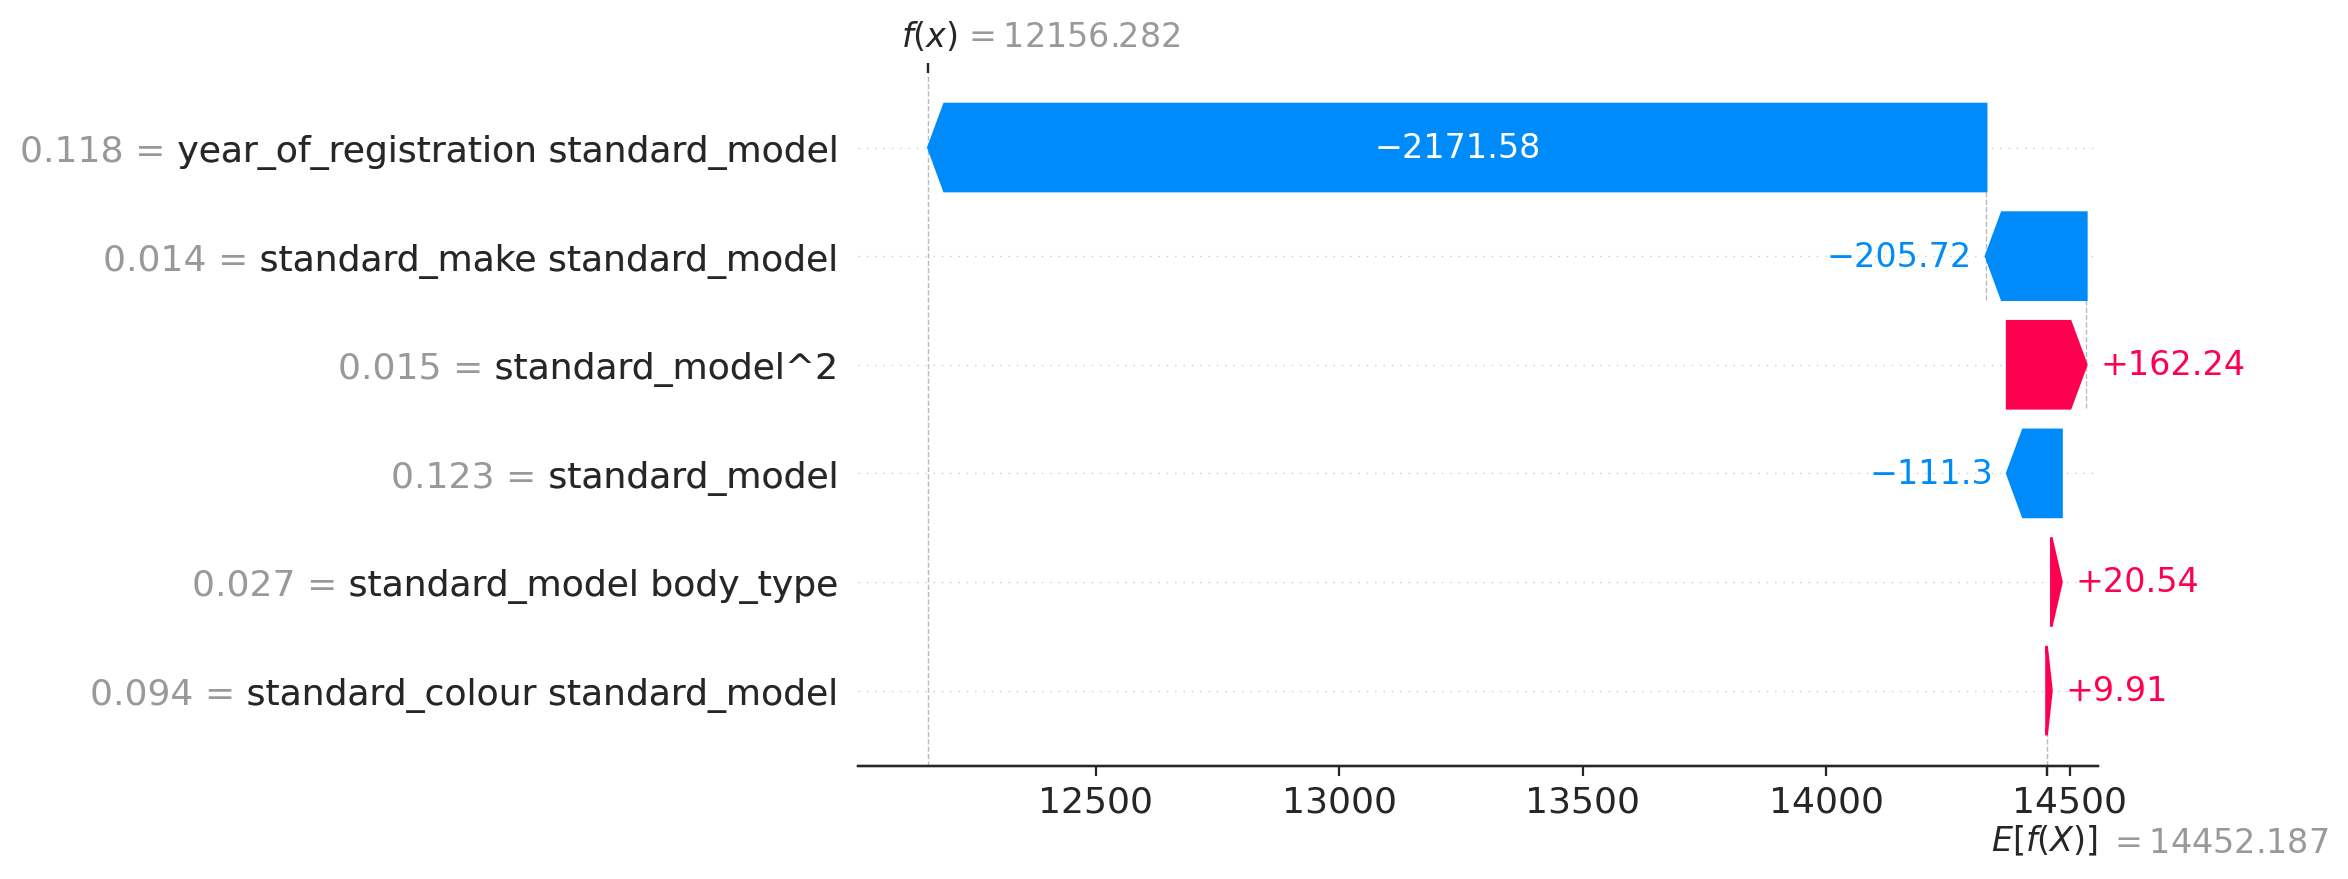

In [464]:
# for a random instance
shap.plots.waterfall(shap_values[0])

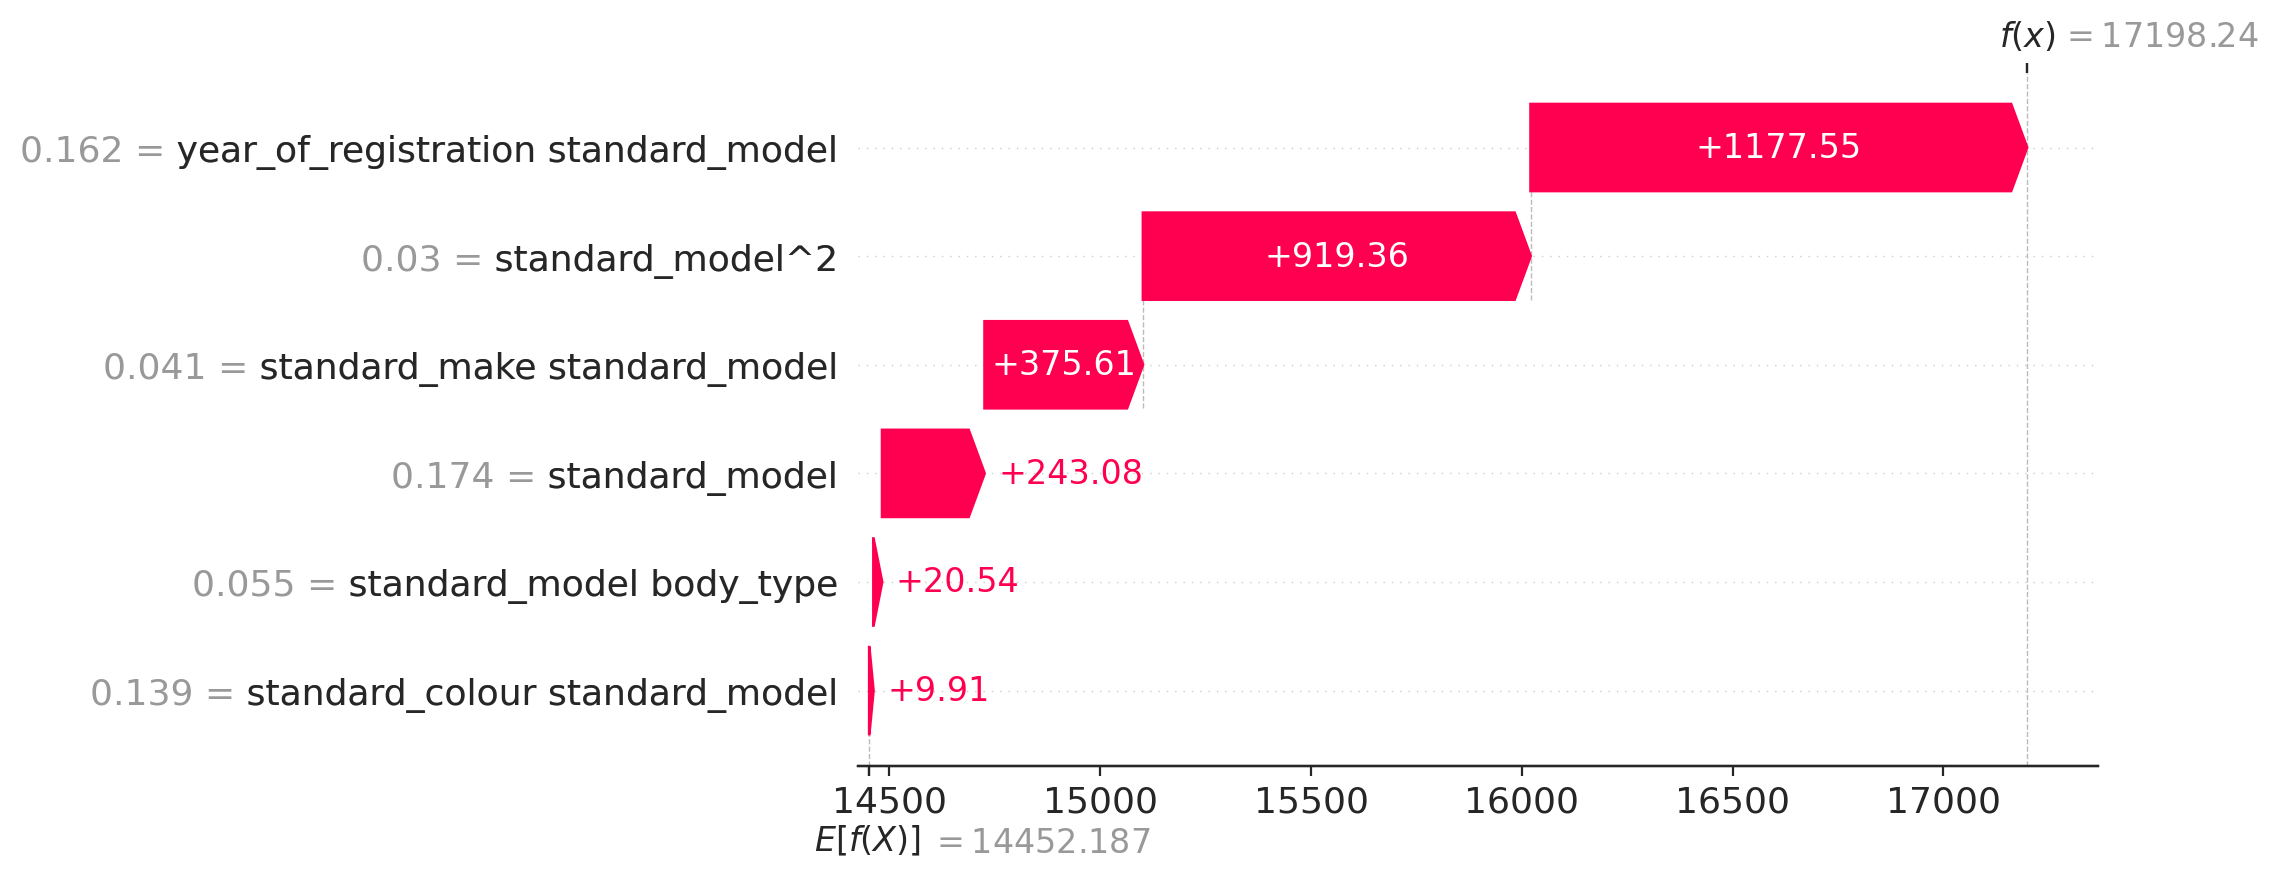

In [465]:
# another wine
shap.waterfall_plot(shap_values[1])

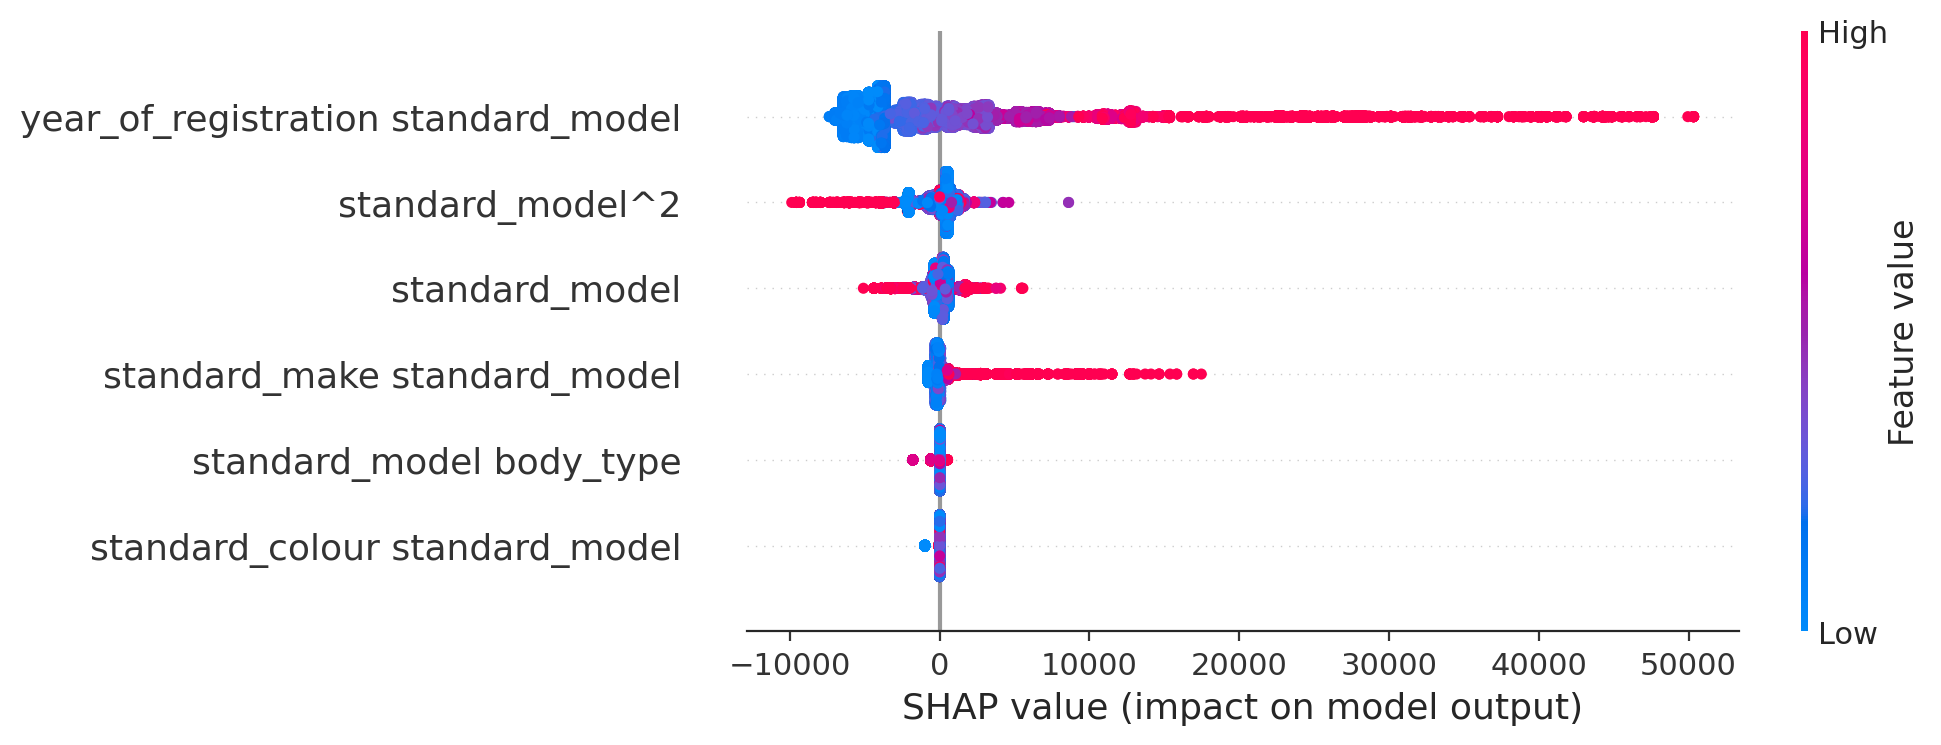

In [466]:
# global model
shap.plots.beeswarm(shap_values)

# Ensemble...

In [467]:

my_models = [best_model_rf, best_model_lr,best_model_gb]

In [468]:
from sklearn.model_selection import train_test_split, cross_validate
model_results_list = []
for my_model in my_models:
    eval_results = cross_validate(
        my_model, X, y, cv=5,
        scoring='neg_mean_absolute_error',
        return_train_score=True
    )
    model_results_list.append(
        (-eval_results['test_score'].mean(), eval_results['test_score'].std(),
         -eval_results['train_score'].mean(), eval_results['train_score'].std())
    )

In [469]:
model_results = pd.DataFrame(
    model_results_list,
    columns=['test_mae_mean', 'test_mae_std', 'train_mae_mean', 'train_mae_std'],
    index=['best_model_rf', 'best_model_lr','best_model_gb']
)

In [470]:
model_results

test_mae_mean  test_mae_std  train_mae_mean  train_mae_std
best_model_rf    2550.791391     17.314287     2537.516345      12.393716
best_model_lr    3510.251622     18.870026     3510.019612       6.586160
best_model_gb    3132.659478     14.814680     3126.569678       5.416021

In [471]:
for est in my_models:
    est.fit(X_train_selected_df, y_train)

In [472]:
# Set a random seed for reproducibility
np.random.seed(2)

In [473]:

ensemble = VotingRegressor([("gb",best_model_gb),("rf",best_model_rf),('lr',best_model_lr)])
ensemble.fit(X_train_selected_df, y_train)


VotingRegressor(estimators=[('gb',
                             Pipeline(steps=[('regressor',
                                              GradientBoostingRegressor(learning_rate=0.2,
                                                                        max_depth=5,
                                                                        n_estimators=7,
                                                                        random_state=2))])),
                            ('rf',
                             Pipeline(steps=[('regressor',
                                              RandomForestRegressor(max_depth=7,
                                                                    n_estimators=7,
                                                                    random_state=2))])),
                            ('lr',
                             Pipeline(steps=[('regressor',
                                              LinearRegression())]))])

In [474]:
eval_results = cross_validate(
    ensemble, X, y, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)
ensemble_result = (
    -eval_results['test_score'].mean(), eval_results['test_score'].std(),
    -eval_results['train_score'].mean(), eval_results['train_score'].std()
)

In [475]:
model_results.loc['ensemble'] = ensemble_result

In [476]:
model_results

test_mae_mean  test_mae_std  train_mae_mean  train_mae_std
best_model_rf    2550.791391     17.314287     2537.516345      12.393716
best_model_lr    3510.251622     18.870026     3510.019612       6.586160
best_model_gb    3132.659478     14.814680     3126.569678       5.416021
ensemble         2653.069006     14.972620     2646.959093       6.296154

In [477]:
xt = pd.DataFrame(X_train_selected_df).head(20)
yt = y.head(20)
pred_gbr = best_model_gb.predict(xt)
pred_rfr = best_model_rf.predict(xt)
pred_lr = best_model_lr.predict(xt)
pred_ens = ensemble.predict(xt)

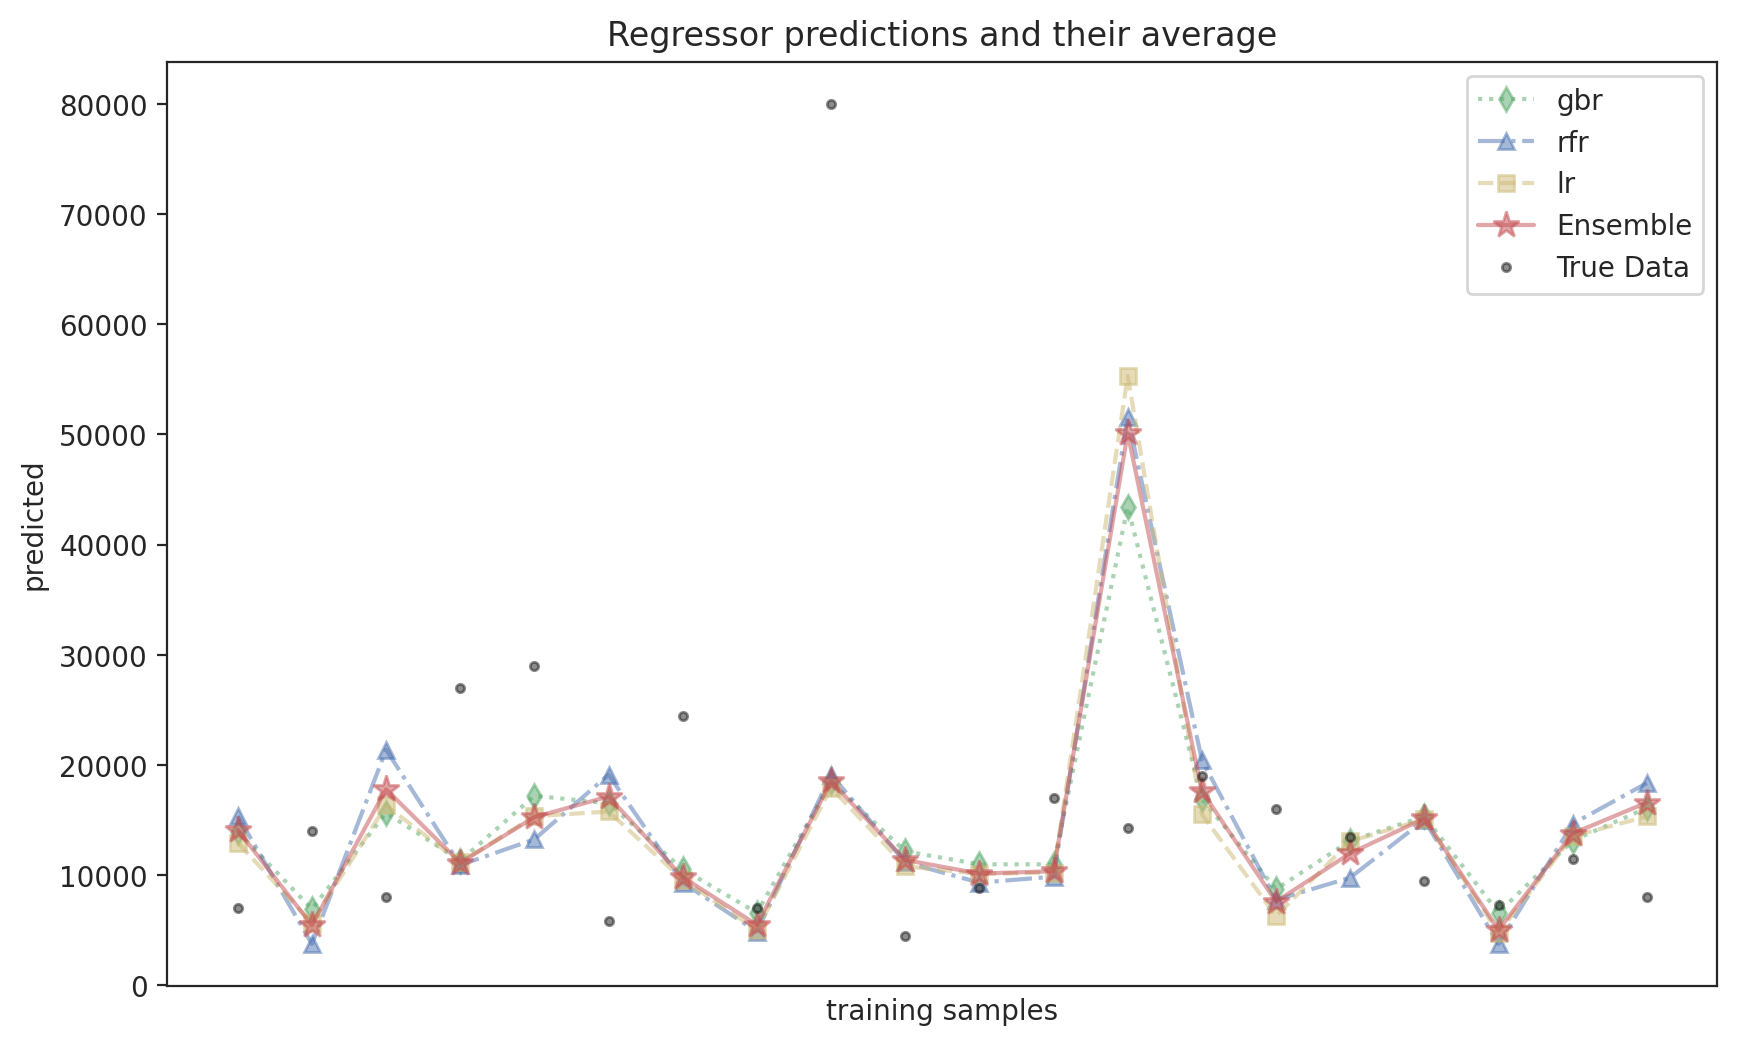

In [478]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(pred_gbr, "gd:", alpha=0.5, label="gbr")
ax.plot(pred_rfr, "b^-.", alpha=0.5, label="rfr")
ax.plot(pred_lr, "ys--", alpha=0.5, label="lr")
ax.plot(pred_ens, "r*-", alpha=0.5, ms=10, label="Ensemble")
ax.plot(yt, "ko", alpha=0.5, ms=3, label="True Data")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
ax.set_ylabel("predicted")
ax.set_xlabel("training samples")
ax.legend(loc="best")
ax.set_title("Regressor predictions and their average");
plt.savefig("Regressor predictions and their average");

# Partial dependency plots

In [479]:
from sklearn.inspection import PartialDependenceDisplay

In [480]:
# Print column names in X_train_selected_df
print(X_train_selected_df.columns.tolist())


['standard_model', 'year_of_registration standard_model', 'standard_colour standard_model', 'standard_make standard_model', 'standard_model^2', 'standard_model body_type']


**Linear Regression PDP**

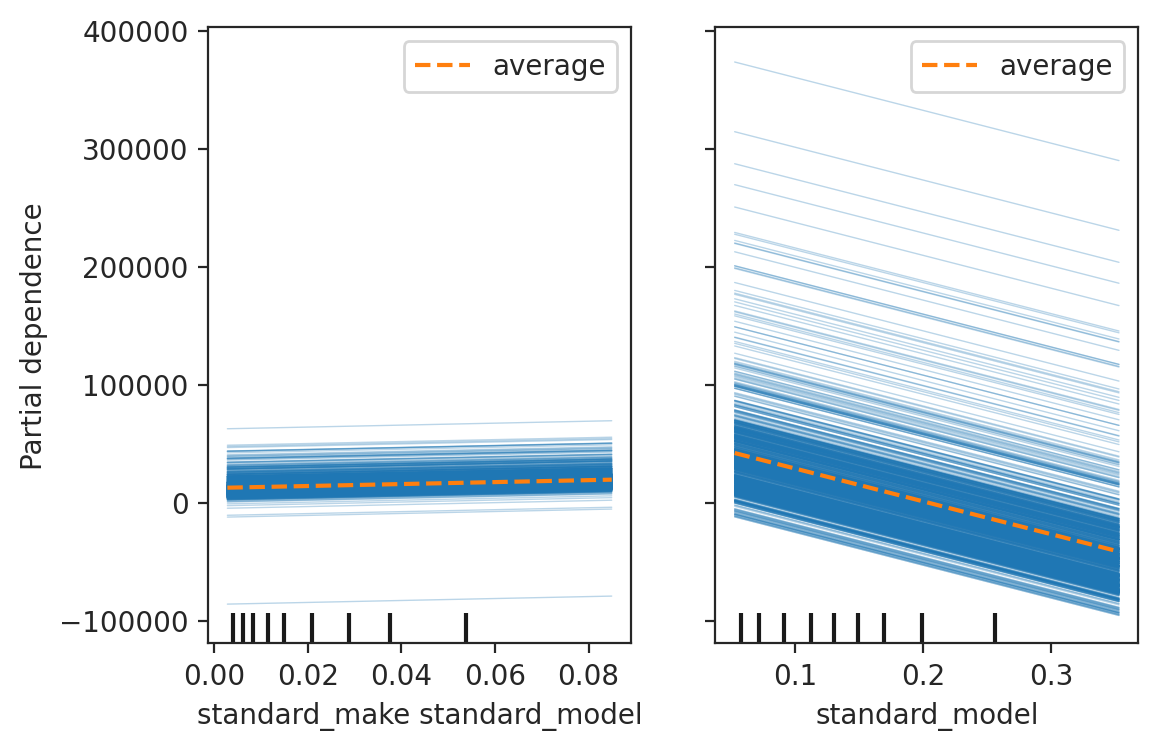

In [481]:

# Partial Dependency Plots for Linear Regression
features_indices = [X_train_selected_df.columns.tolist().index(feature) for feature in ['standard_make standard_model', 'standard_model']]
PartialDependenceDisplay.from_estimator(best_model_lr, X_test_selected_df, features=features_indices,kind='both');
plt.savefig("pdp lr")

plt.show()

**Random Forest PDP**

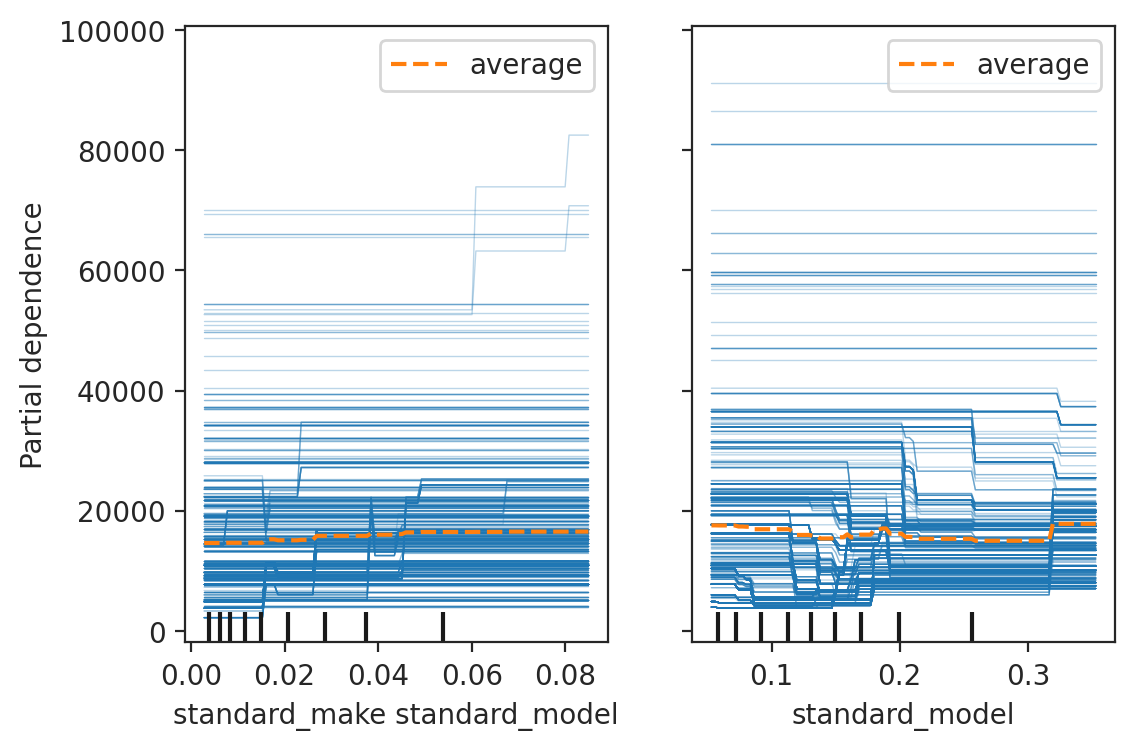

In [482]:


# Partial Dependency Plots for Random Forest
PartialDependenceDisplay.from_estimator(best_model_rf, X_test_selected_df, features=features_indices,kind='both');
plt.savefig("pdp_rf")
plt.show()





# For features involving combinations or interactions, you may need to manually calculate the feature values before plotting
# For example, 'year_of_registration standard_make' would involve multiplying the 'year_of_registration' feature with the 'standard_make' feature
# Similarly, 'standard_colour standard_make' would involve multiplying the 'standard_colour' feature with the 'standard_make' feature
# You can calculate these feature values and then plot the partial dependence plots as above


** Gradient Boosting PDP**

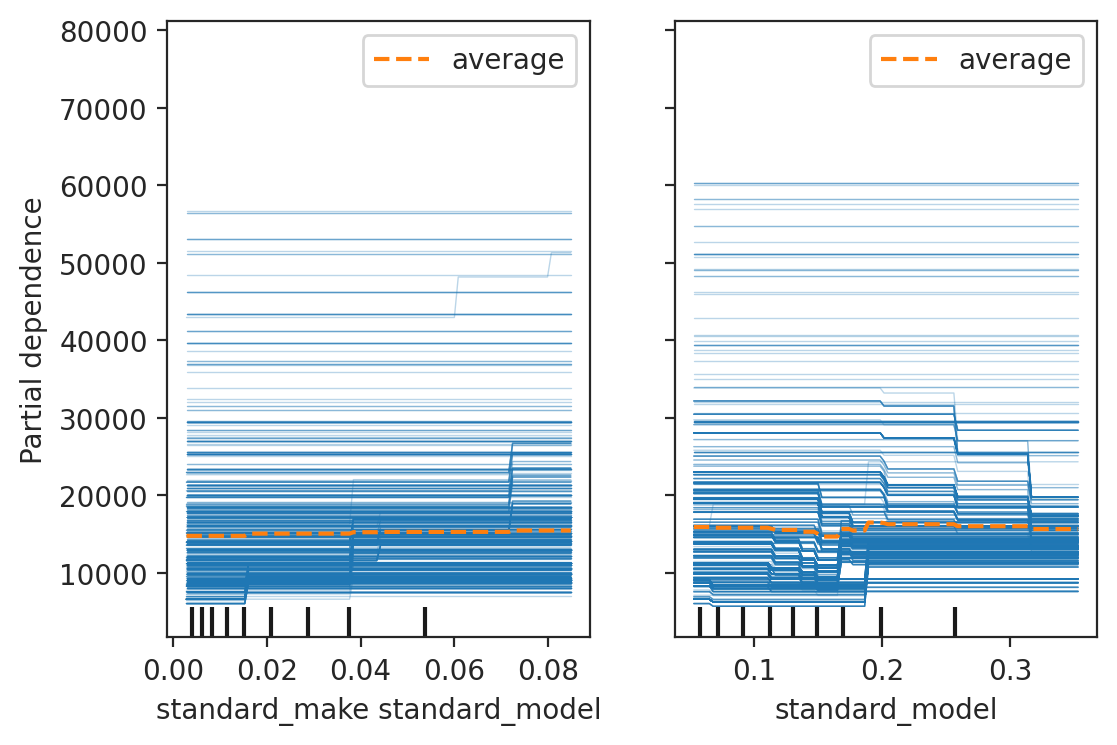

In [483]:
# Partial Dependency Plots for Gradient Boosting Regressor
PartialDependenceDisplay.from_estimator(best_model_gb, X_test_selected_df, features=features_indices,kind='both');

plt.savefig("pdp gb")
plt.show()

In [486]:
#pdp of random forest on more than two features

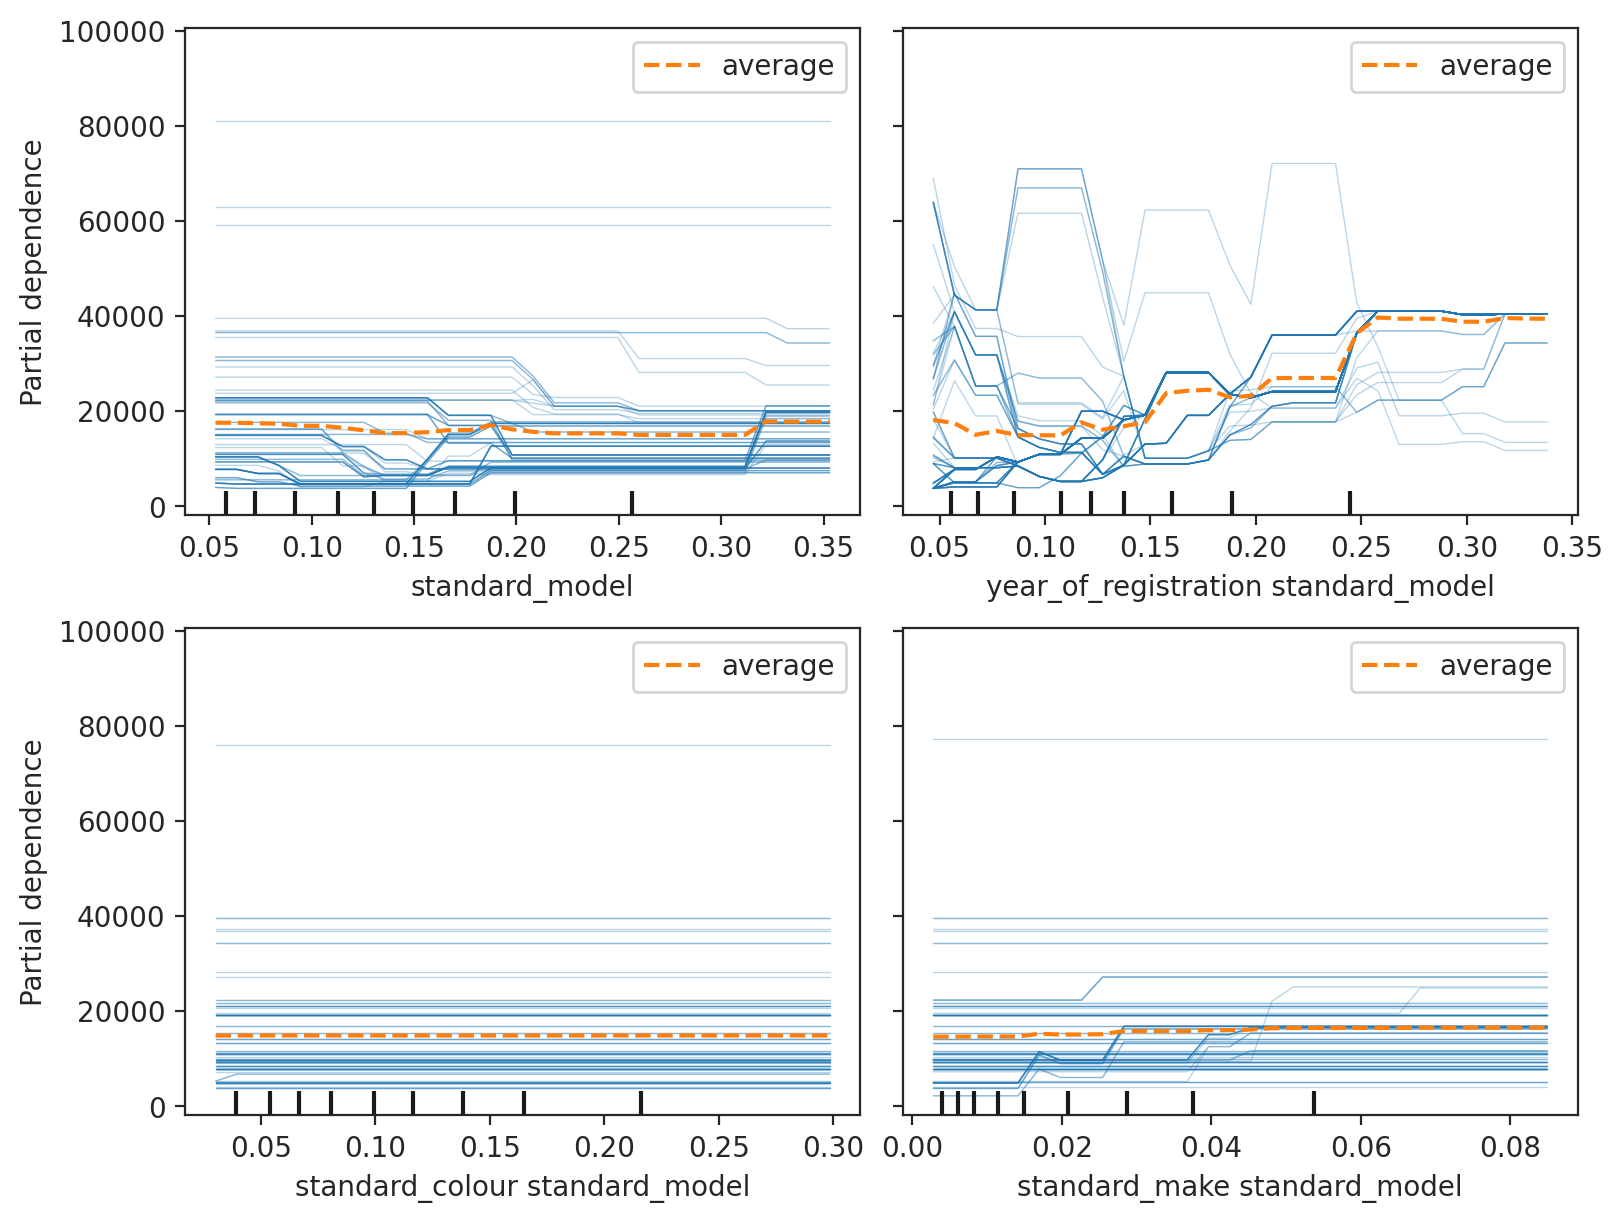

In [484]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    best_model_rf, X_test_selected_df, features=['standard_model', 'year_of_registration standard_model', 'standard_colour standard_model', 'standard_make standard_model'],
    kind='both',
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);